## Industry Review

- Industry Review – Current practices, Background Research

- Literature Survey - Publications, Application, past and undergoing research

## Dataset and Domain

##### Data Dictionary

In [22]:
#important libraries
#importing the necessary packages
import pandas as pd
import string
#import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

warnings.filterwarnings(action="ignore")
%matplotlib inline

# Read the data set 

In [3]:
bank_df=pd.read_csv('/Users/deepranjanguha/Desktop/Data Science /Capstone Project/Dataset/bank-additional-full.csv',sep=';')
bank_df.head(10)

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
5  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   
7  telephone   may         mon  ...         1    999         0  nonexistent   
8  telephone   may         mon  ...         1    999         0  nonexistent   
9  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  
5          1.1          93.994          -36.4      4.857       5191.0  no  
6          1.1          93.994          -36.4      4.857       5191.0  no  
7          1.1          93.994          -36.4      4.857       5191.0  no  
8          1.1          93.994          -36.4      4.857       5191.0  no  
9          1.1          93.994          -36.4      4.857       5191.0  no  

[10 rows x 21 columns]

#### bank client data:
1.	age (numeric)
2.	job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
4.	education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6.	housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7.	loan: has personal loan? (categorical: 'no',' yes',' unknown')

#### related with the last contact of the current campaign:
8.	contact: contact communication type (categorical: 'cellular', 'telephone')
9.	month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	duration: last contact duration, in seconds (numeric). 

#### other attributes:

12.	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	previous: number of contacts performed before this campaign and for this client (numeric)
15.	poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16.	emp.var.rate: employment variation rate - quarterly indicator (numeric)
17.	cons.price.idx: consumer price index - monthly indicator (numeric)
18.	cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19.	euribor3m: euribor 3 month rate - daily indicator (numeric)
20.	nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21.	y - has the client subscribed a term deposit? (binary: 'yes','no')

## Let's Get into the DataSet :

In [4]:
#checking the shape of the dataset 
bank_df.shape

(41188, 21)

Note : We have 41188 records in  our dataset with 21 features

In [5]:
#Extract all the columns name from the dataset
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Variable categorization

In [6]:
#let's get in to the data information with datatypes
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#Let us check out the individual data types
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
#Let us replace our target variable with binary values 0 as 'No' and 1 as 'Yes'
bank_df['y']=bank_df['y'].replace(['yes','no'],[1,0])
bank_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [9]:
#as by default our target variable is a numerical data we will change our datatype to categorical 
bank_df['y']=bank_df['y'].astype('object')

In [10]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
#Let's extract all the categorical and the numerical columns for the further Analysis
df_categorical=bank_df.select_dtypes(object)

In [12]:
df_numerical=bank_df.select_dtypes(include=np.number)

In [13]:
categorical_columns=df_categorical.columns
numerical_columns=df_numerical.columns

In [14]:
print("The number of categorical columns is: ",len(categorical_columns))
print("The columns are:",list(categorical_columns))

The number of categorical columns is:  11
The columns are: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [15]:
print("The number of numerical columns is: ",len(numerical_columns))
print("The columns are:",list(numerical_columns))

The number of numerical columns is:  10
The columns are: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Note : We Have 11 Categorical Column and 10 Numerical column 

# Data Pre Processing Exploratory Data Analysis :

In [16]:
#Let's check the null values 
number_of_missing_values = bank_df.isna().sum().sort_values(ascending=False)          
percentage_of_missing_values = (bank_df.isna().sum()*100/bank_df.isna().count()).sort_values(ascending=False)   
missing_data = pd.concat([number_of_missing_values,percentage_of_missing_values], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
age                 0                           0.0
campaign            0                           0.0
nr.employed         0                           0.0
euribor3m           0                           0.0
cons.conf.idx       0                           0.0
cons.price.idx      0                           0.0
emp.var.rate        0                           0.0
poutcome            0                           0.0
previous            0                           0.0
pdays               0                           0.0
duration            0                           0.0
job                 0                           0.0
day_of_week         0                           0.0
month               0                           0.0
contact             0                           0.0
loan                0                           0.0
housing             0                           0.0
default             0                           0.0
education           0                           0.0
marital             0                           0.0
y                   0                           0.0

## OBSERVATION :

As we can clearly observe from the above cell there are no missing value present in any attribute.

### Summerize the numerical column

In [17]:
bank_df.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

* ``duration`` has a mean value which is greater than the median value, therefore it suggests that there is postive skewness is the feature due to influence of potential outliers.

### Summarization of the categorical columns:

In [18]:
print('% Values in each categorical columns in the dataset')
for k in categorical_columns:
    print('\n% Values in columns : ',k)
    print((bank_df[k].value_counts()/len(bank_df[k])*100))

% Values in each categorical columns in the dataset

% Values in columns :  job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

% Values in columns :  marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64

% Values in columns :  education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64

% Values in columns :  default
no         79.120132
unknown    20.872584
yes         0.00

- Alternate sources of data that can supplement the core dataset (at least 2-3 columns)



- Project Justification - Project Statement, Complexity involved, Project Outcome –Commercial, Academic or Social value

# Let's Start With Univariate Analysis :

## Let's analyse our categorical columns :

In [19]:
df_categorical=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

univariate analysis of indivual job
-----------------------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


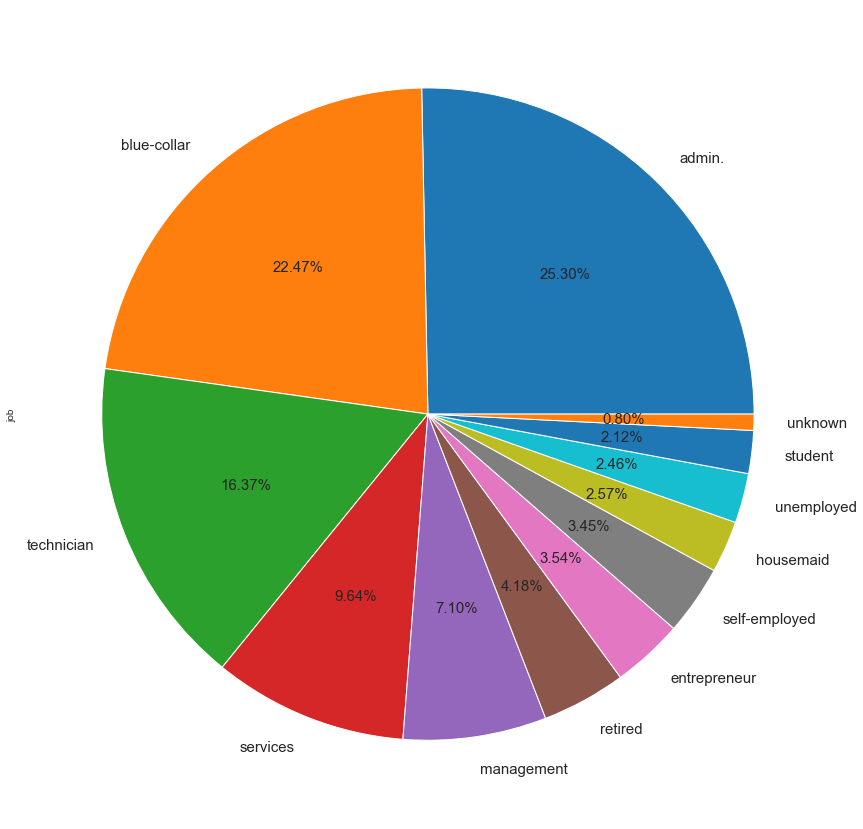

In [24]:
print('univariate analysis of indivual job')
print('-----------------------------------')
sns.set_style('darkgrid')
print(bank_df['job'].value_counts())
plt.rcParams['figure.figsize']=(12,6)
bank_df['job'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15),fontsize=15)
plt.show()

### Observation :

From the above barchart we can clearly infer that there are most job holders are admin almost 10400 people are admin.
Then blue-collar and technician job holders are almost 9000 and 6700 respectively.count of housemaid ,unemployed and students are almost same. And unknown are very less.

univariate analysis of marital status
-------------------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


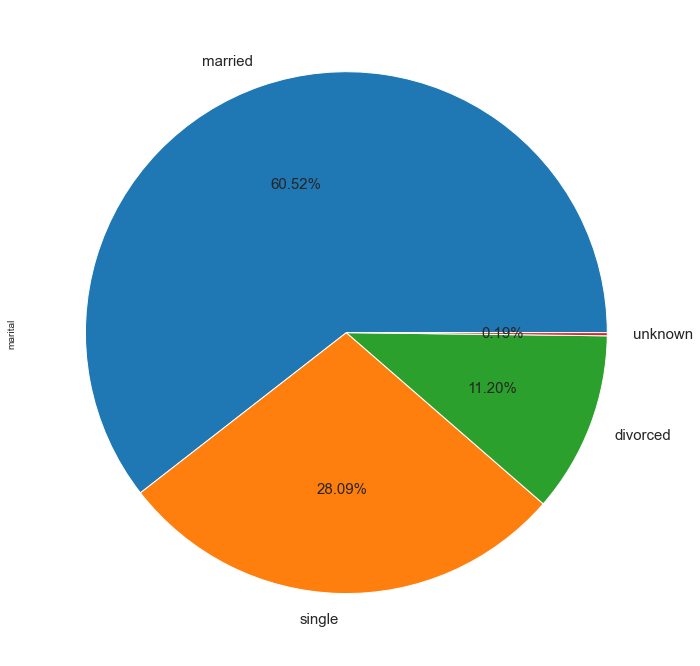

In [28]:
plt.rcParams['figure.figsize']=[15,12]
print('univariate analysis of marital status')
print('-------------------------------')
print(bank_df['marital'].value_counts())
bank_df['marital'].value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize=15)
plt.show()

### Observation:

All most 25000 people are married in this campaign,also single and devorced peopleare ther.
Unknown marital status is very less about 80

univariate analysis of educational status
-----------------------------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


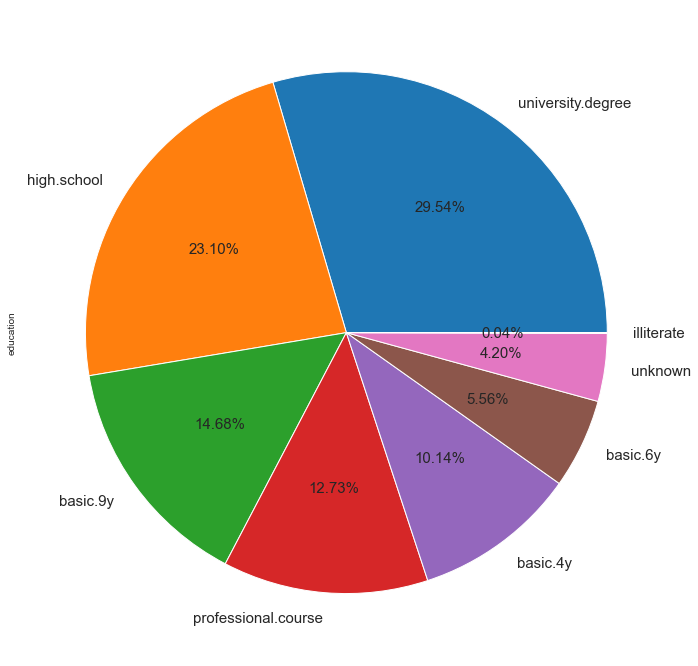

In [31]:
print('univariate analysis of educational status')
print('-----------------------------------------')
print(bank_df['education'].value_counts())
bank_df['education'].value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize=15)
plt.show()

### Observation :

In this educational field the highly qualified people is most.More than 12000 people has highest university degree.
There is a unknown field and illiterate person which is very less.

univariate analysis of default status
-----------------------------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


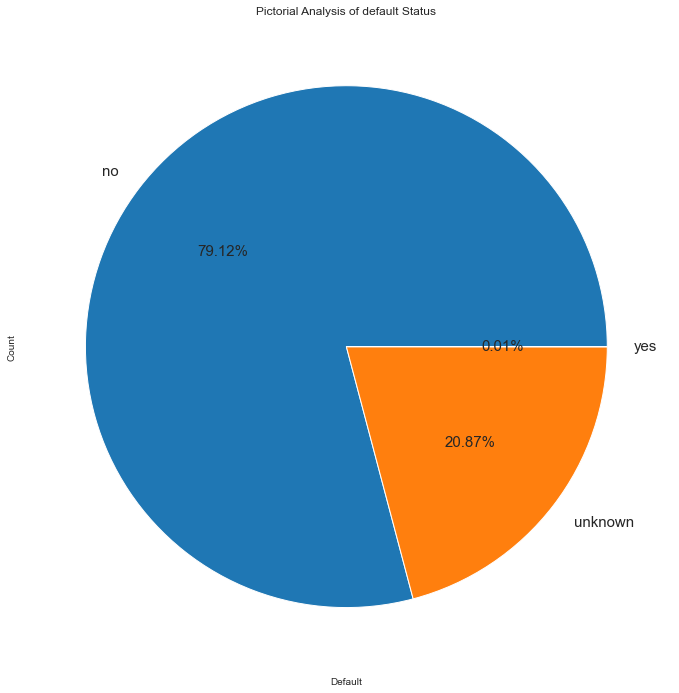

In [32]:
print('univariate analysis of default status')
print('-----------------------------------------')
print(bank_df['default'].value_counts())
bank_df['default'].value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize=15)
plt.title('Pictorial Analysis of default Status')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

### Observation :

There are more than 32000 people has no credit in default.There are very less person who has credit in default.Some unknown status are also exists about which we do not have any information about them.

univariate analysis of housing status
-------------------------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


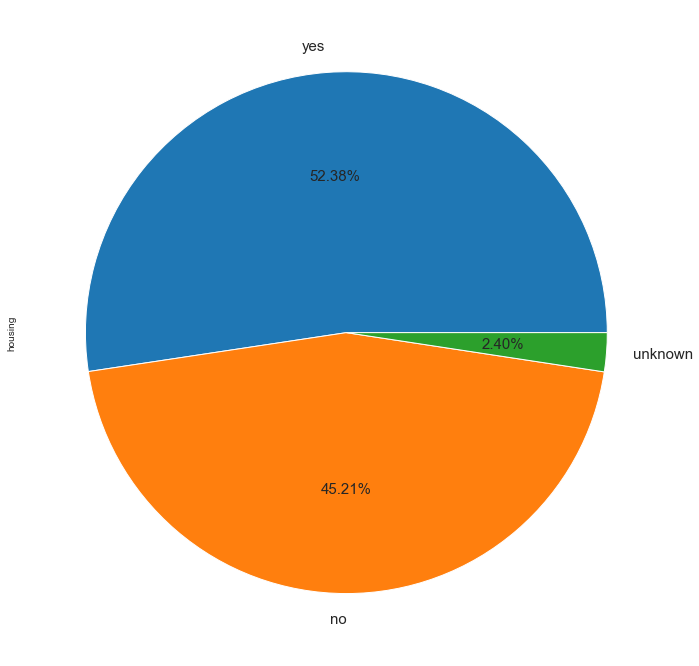

In [33]:
print('univariate analysis of housing status')
print('-------------------------------------')
print(bank_df['housing'].value_counts())
bank_df['housing'].value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize=15)
plt.show()

### Observation :

There are almost 21000 people who has housing loan. And more than 18000 people has no housing loan .

univariate analysis of loan status
----------------------------------
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


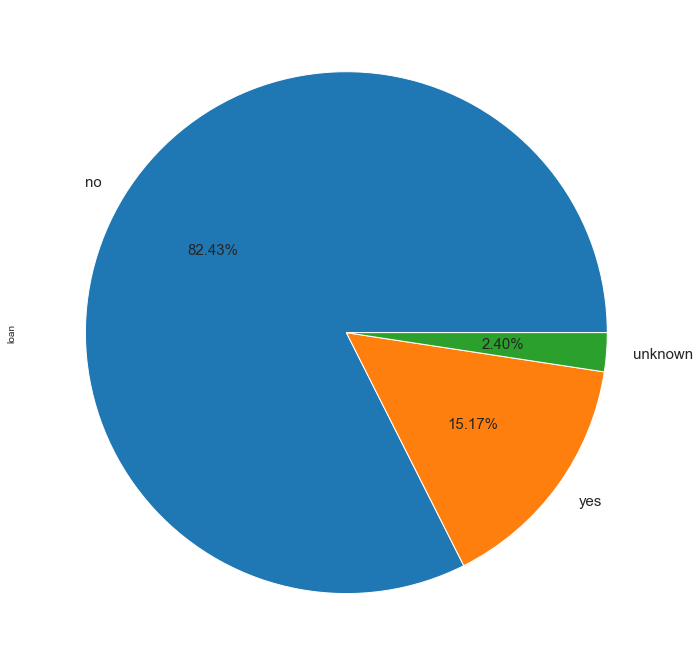

In [34]:
print('univariate analysis of loan status')
print('----------------------------------')
print(bank_df['loan'].value_counts())
bank_df['loan'].value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize=15)
plt.show()

### Observation :

There are almost 34000 people who has no loan from bank and more than 6000 people has loan from bank

univariate analysis of contact medium
-------------------------------------
cellular     26144
telephone    15044
Name: contact, dtype: int64


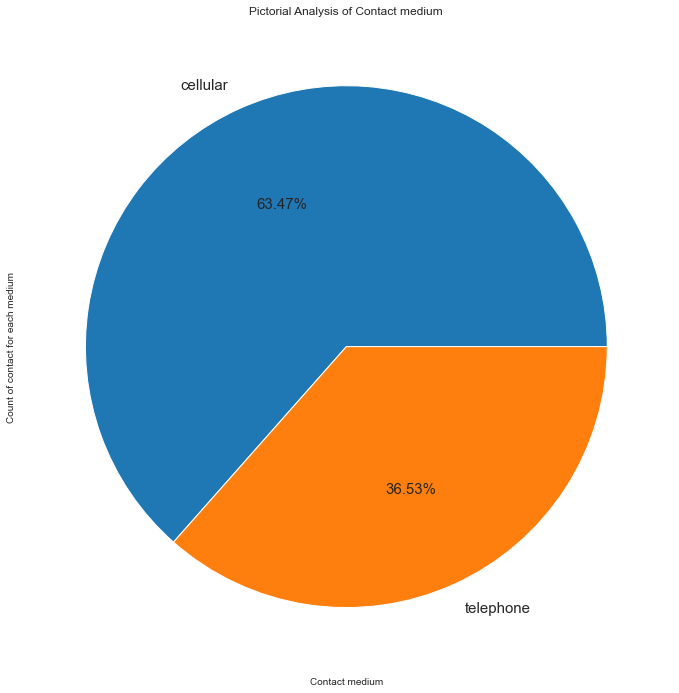

In [35]:
print('univariate analysis of contact medium')
print('-------------------------------------')
print(bank_df['contact'].value_counts())
bank_df['contact'].value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize=15)
plt.title('Pictorial Analysis of Contact medium')
plt.xlabel('Contact medium')
plt.ylabel('Count of contact for each medium')
plt.show()

### Observation:

* There are more than 26000 people who are contacted by mobile and 15000 people contacted by telephone.

univariate analysis of Month Wise status
-----------------------------------------
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


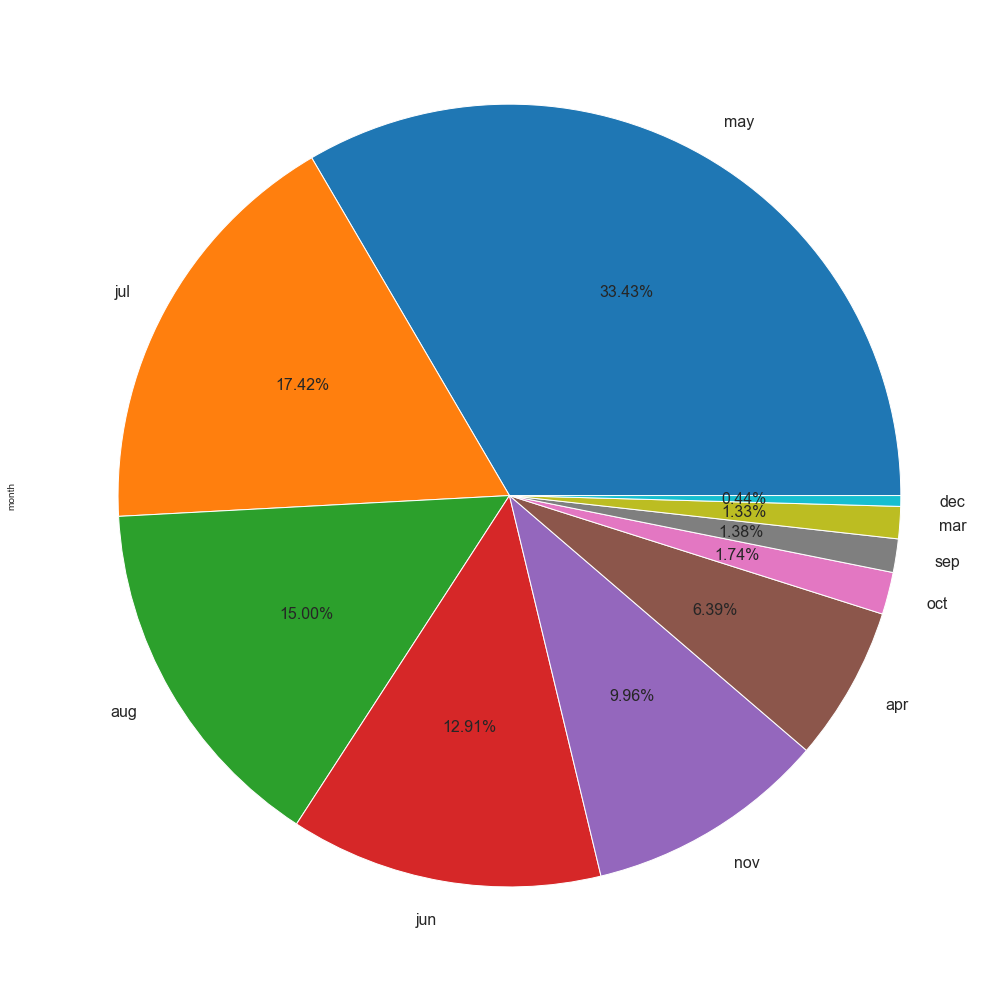

In [42]:
plt.rcParams['figure.figsize']=(18,18)
print('univariate analysis of Month Wise status')
print('-----------------------------------------')
print(bank_df['month'].value_counts())
bank_df['month'].value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize=16)
plt.show()

### Observation :

Last most contacted month is may almost 13700 contacts made on may after that july and august .And ocober,september,and december are less contacted.

univariate analysis of day of week  status
------------------------------------------
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


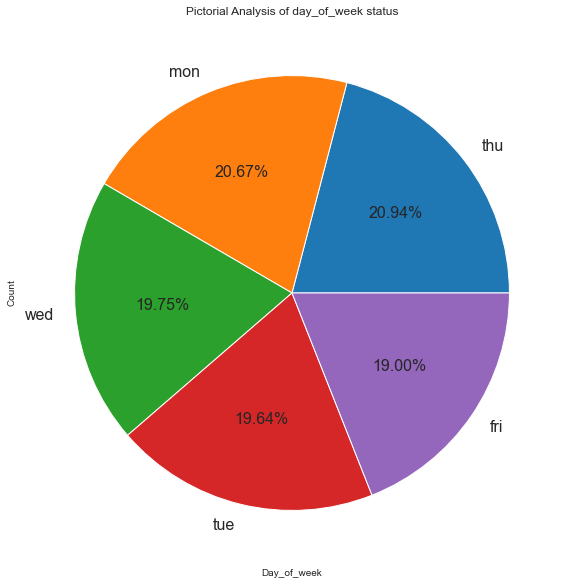

In [44]:
plt.rcParams['figure.figsize']=(15,10)
print('univariate analysis of day of week  status')
print('------------------------------------------')
print(bank_df['day_of_week'].value_counts())
bank_df['day_of_week'].value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize=16)
plt.title('Pictorial Analysis of day_of_week status')
plt.xlabel('Day_of_week')
plt.ylabel('Count')
plt.show()

### Observation :

* On thursday of the week the most contact made.But on monday,wednesday and tuesday are almost same number of contacts made.

univariate analysis of poutcome 
--------------------------------
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


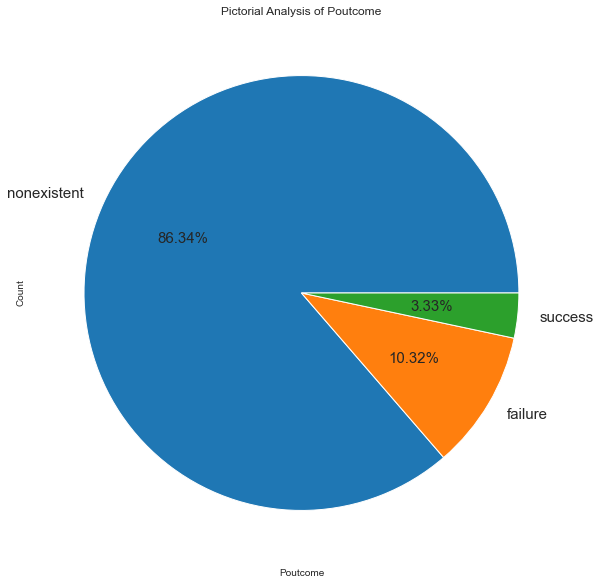

In [45]:
print('univariate analysis of poutcome ')
print('--------------------------------')
print(bank_df['poutcome'].value_counts())
bank_df['poutcome'].value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize=15)
plt.title('Pictorial Analysis of Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.show()

### Observation :

 More than 85% people are belongs to the category nonexistent.In this category success rate is very less.

## Univariate Analysis of our Continuous(Numarical) variable

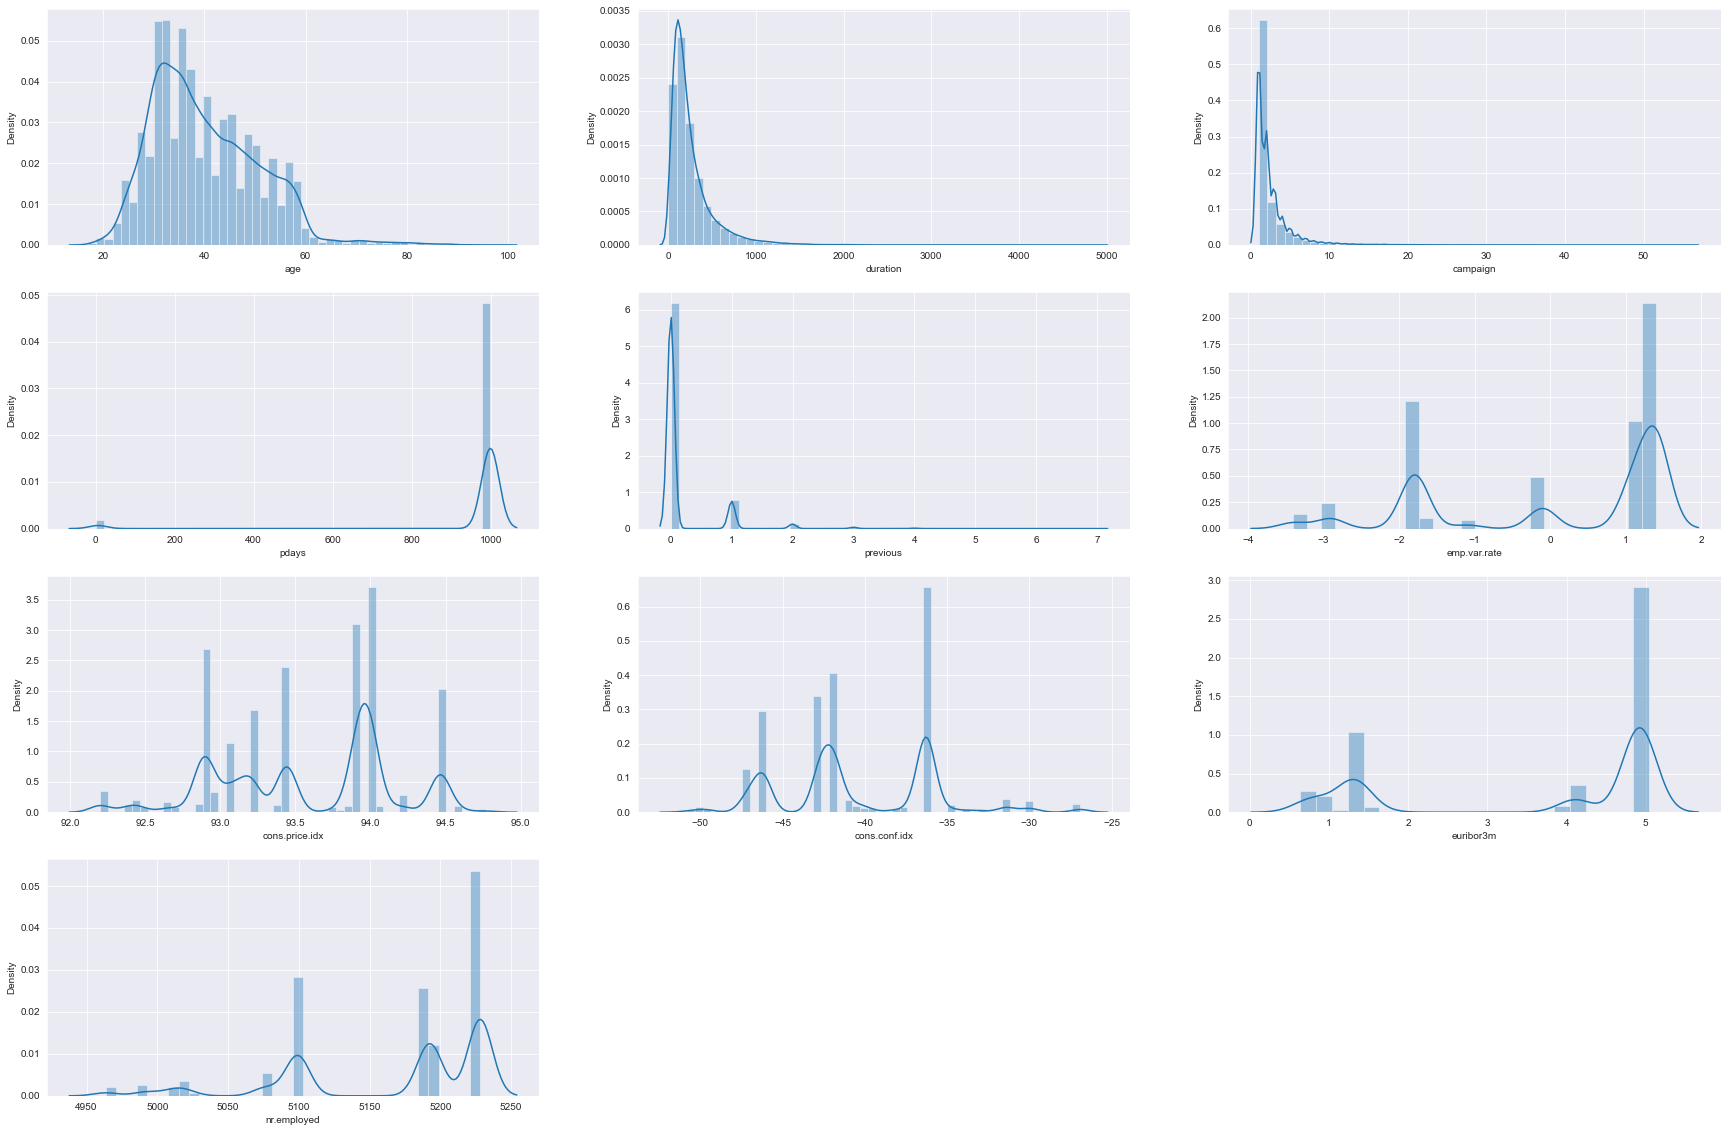

In [46]:
plt.figure(figsize=(30,20))
s=1
for p in numerical_columns:
    plt.subplot(4,3,s)
    sns.distplot(bank_df[p])
    s+=1

### Observation :

. In the age column we can clearly see that most of our clients age is between 30-50 years.andthe   average age is nearly 38 years.
. In the duration column we can see that most of the call duration made by bank is rarely  500   seconds.
. In the campaign columns nearly 1 to 4 times  contacts are made for any clients for this campaign.
. In the pdays column we can clearly see that the most of the clients are not contacted previously fro the campaign.
. Most of the client are not contacted before the campaign through the bank but we can see very few clients are contacted for atleast once.
. We can see there is a high employee variation in the emp.var.rate column rate from which we can say
  that they have made the campaign when there were high shifts in job due to the economic conditions.
. The Consumer price index is good from which we can say the leads where having good price to pay 
  for goods and services may be that could be the reason to stimulate these leads into making a deposit and plant the idea of savings.
. Consumer confidence index is pretty low as we can say they have not much confidence about the ecconomy.
. The 3 month Euribor interest rate is the interest rate from which we can say interest rate are high for lending a loan.
. The number of employee has high peek we can say the income index are also high so that this campaign traget the employed person for saying yes.

### Checking The Class Imbalace :

In [47]:
bank_df['y'].value_counts(normalize=True)*100

0    88.734583
1    11.265417
Name: y, dtype: float64

Text(0, 0.5, 'Count')

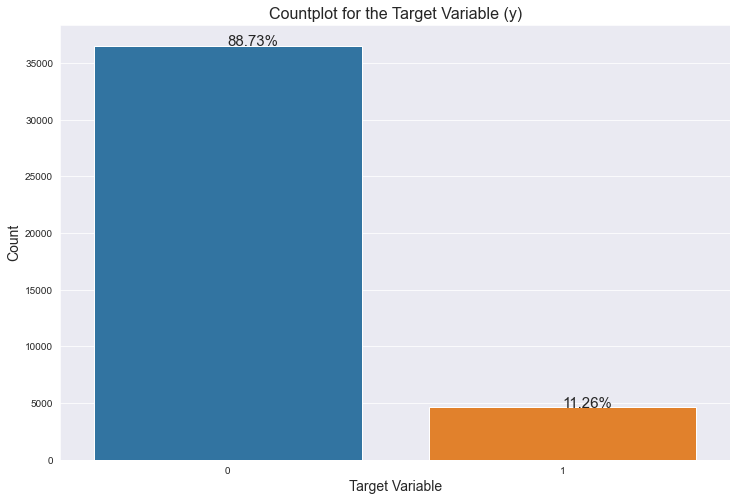

In [56]:
#Let's analyse the our responsive variable 'y'
plt.figure(figsize=(12,8))
sns.countplot(bank_df['y'])
plt.text(x=1,y=bank_df['y'].value_counts()[1]+1,
        s='11.26%',fontsize=15);
plt.text(x=0,y=bank_df['y'].value_counts()[0]+1,
        s='88.73%',fontsize=15);

plt.title('Countplot for the Target Variable (y)',fontsize=16)
plt.xlabel('Target Variable',fontsize=14)
plt.ylabel('Count',fontsize=14)

### Observation :

In this target column 1 is yes and 0 is no that's mean 88.73% clients has not subscribed the term of deposit.But 11.26% client has subscribed the term of deposit.

## Now We Can get into the Bivariate Analysis:

Now ,let's start Bi-variate Analysis. Here we are going to analyse 2 variables trying to find any relation between them.

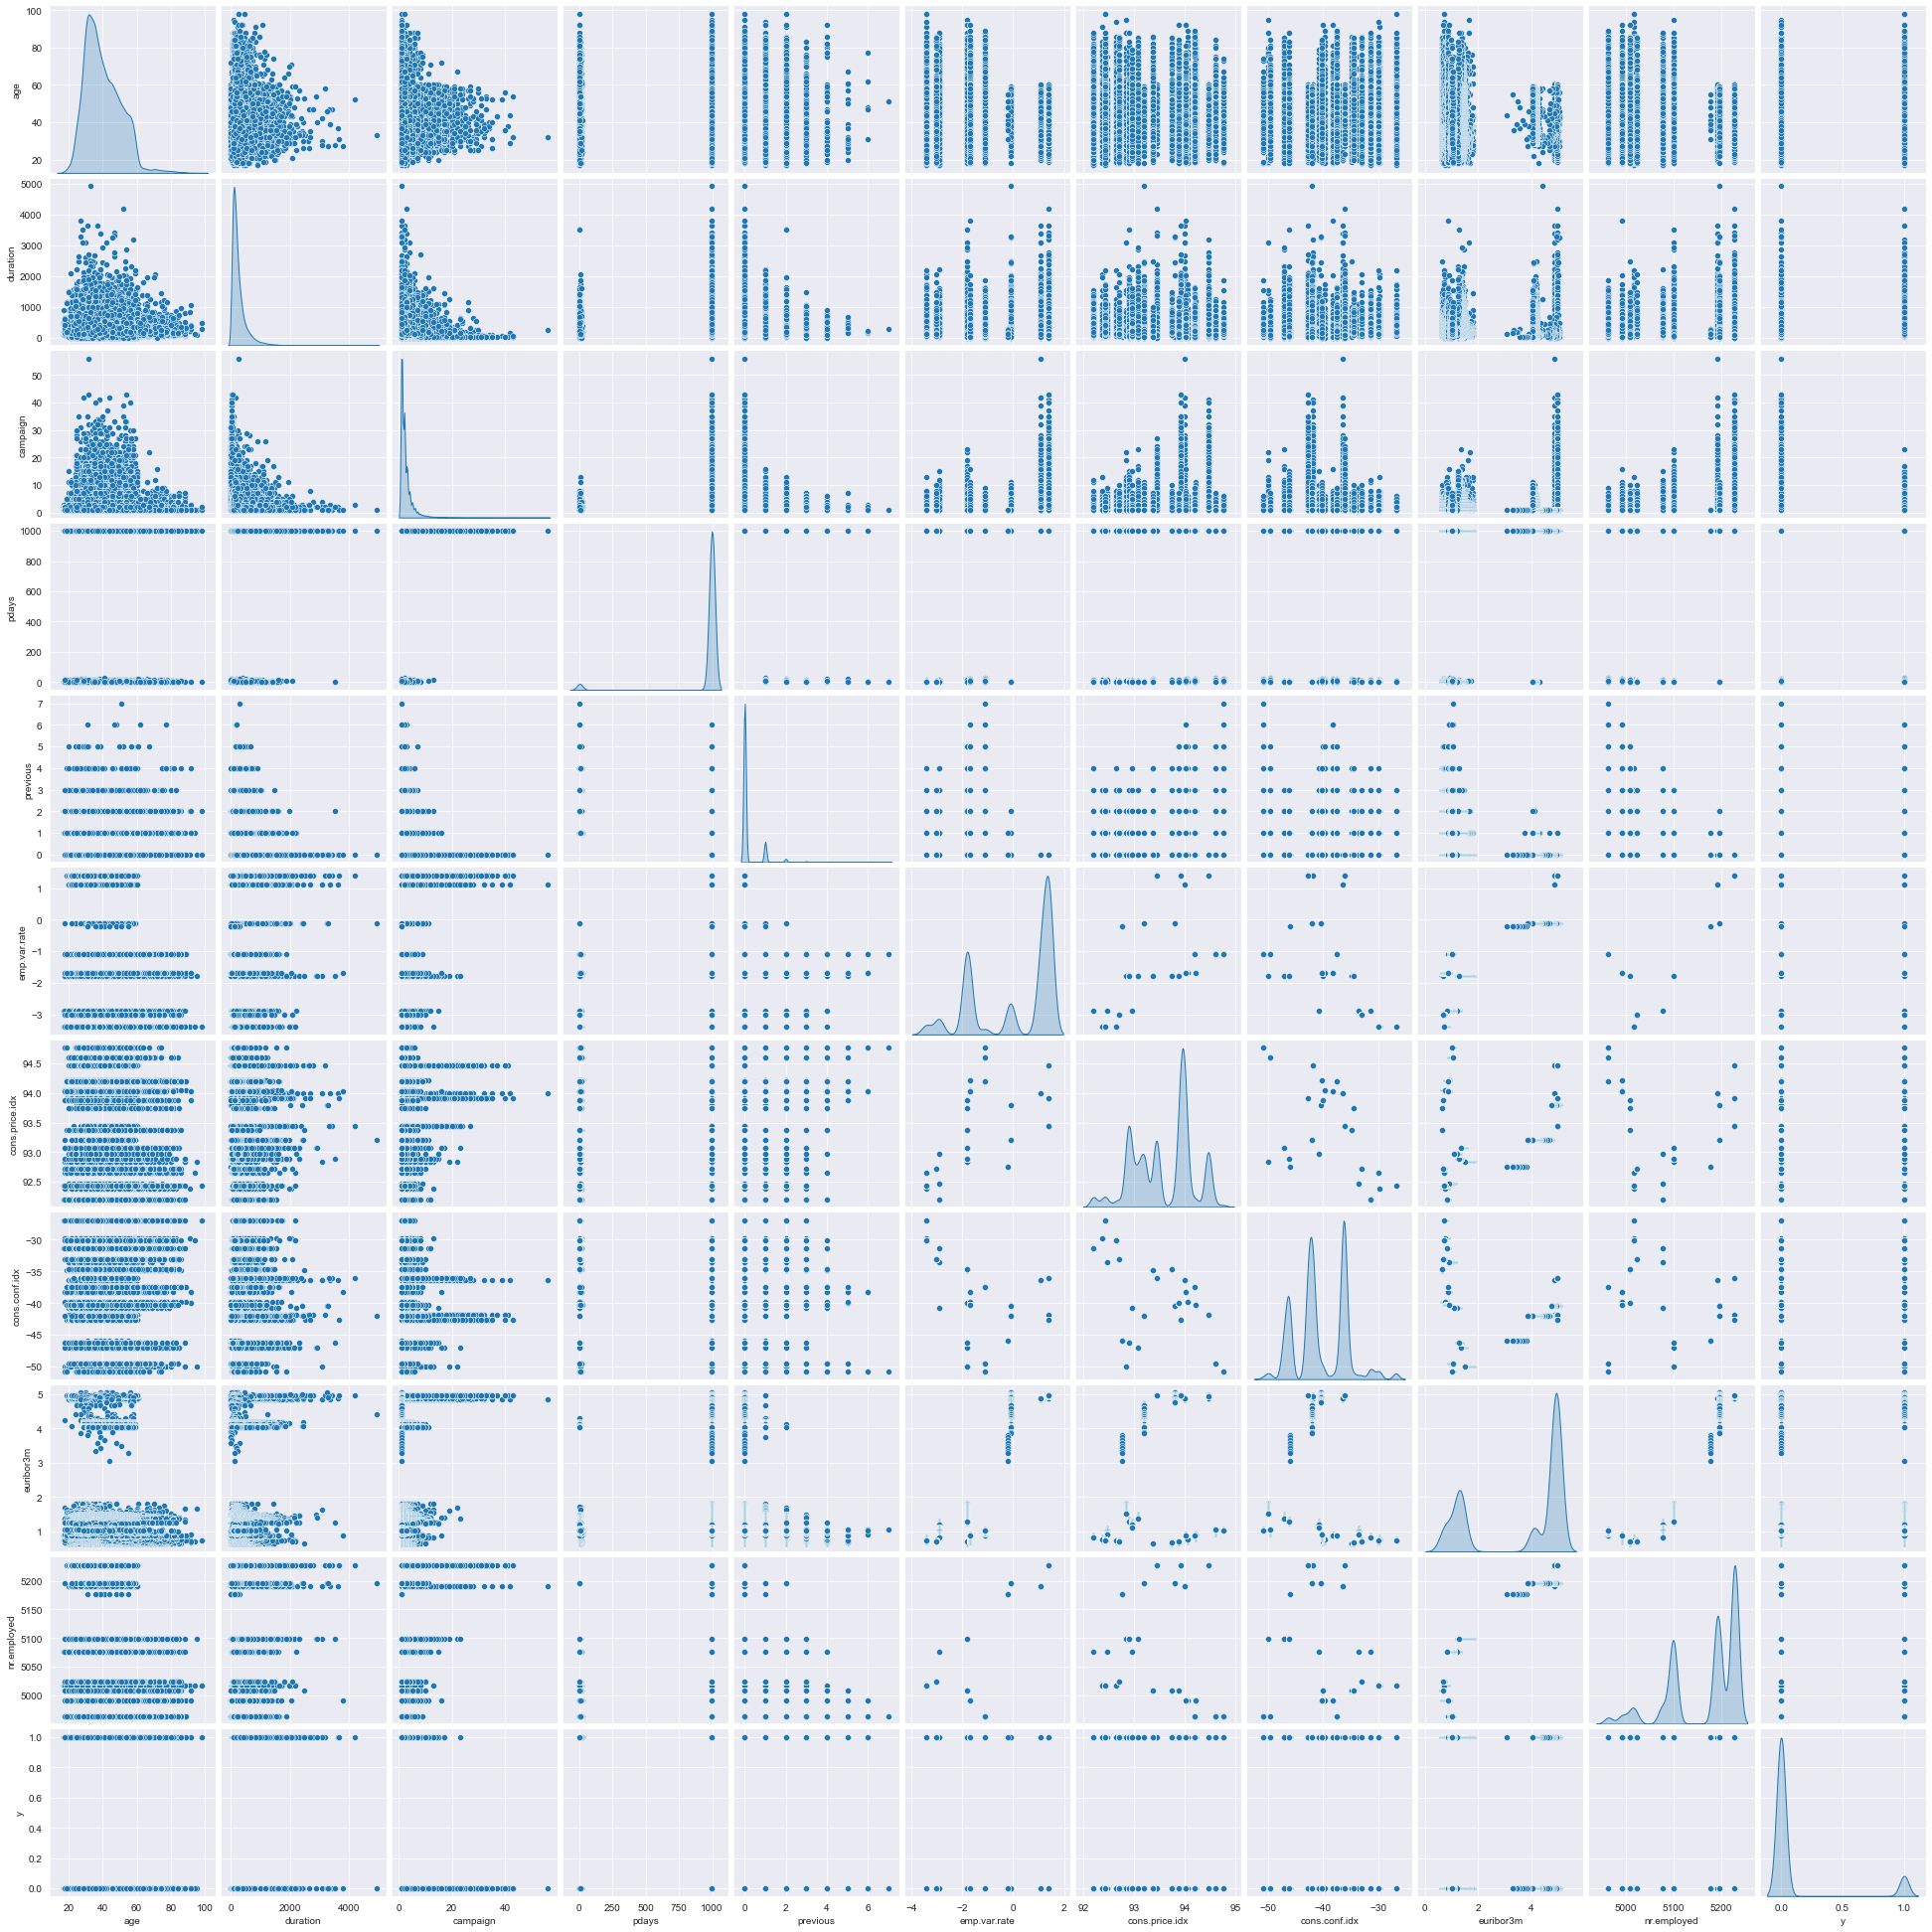

In [59]:
#starting with the pair plot
sns.pairplot(data=bank_df,diag_kind='kde')

<AxesSubplot:>

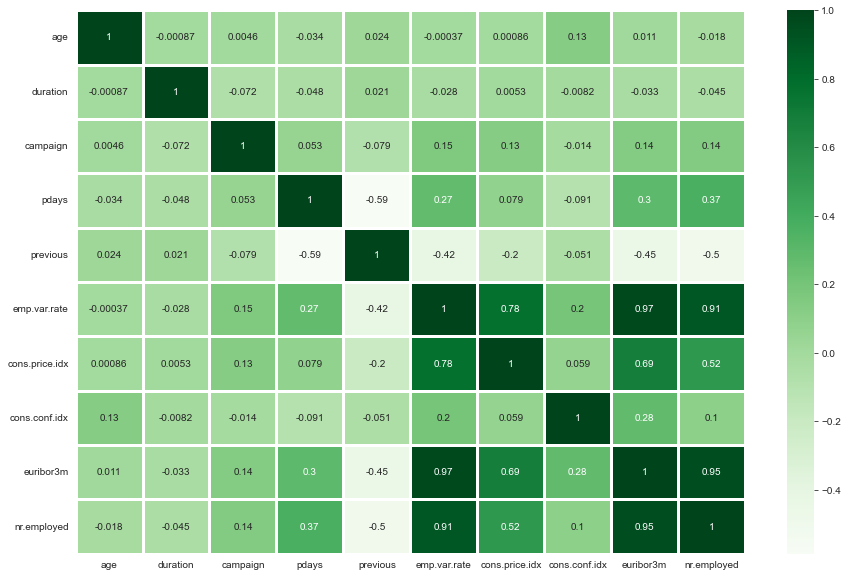

In [70]:
sns.heatmap(bank_df.corr(),annot=True,linecolor='white',linewidth=2.5,cmap='Greens')

### Observation :

.Independent variables are correlated with each other.So we can say there are Multicolinearity presence.

.The Employee variation rates are highly correlated with the number of employees.

.The number of employees are highly correlated with the bank Interest rate.

.Consumer price index is highly correlated with employee variation rate also highly correlated   with the bank interest rate .

## Categorical-Continuous Analysis

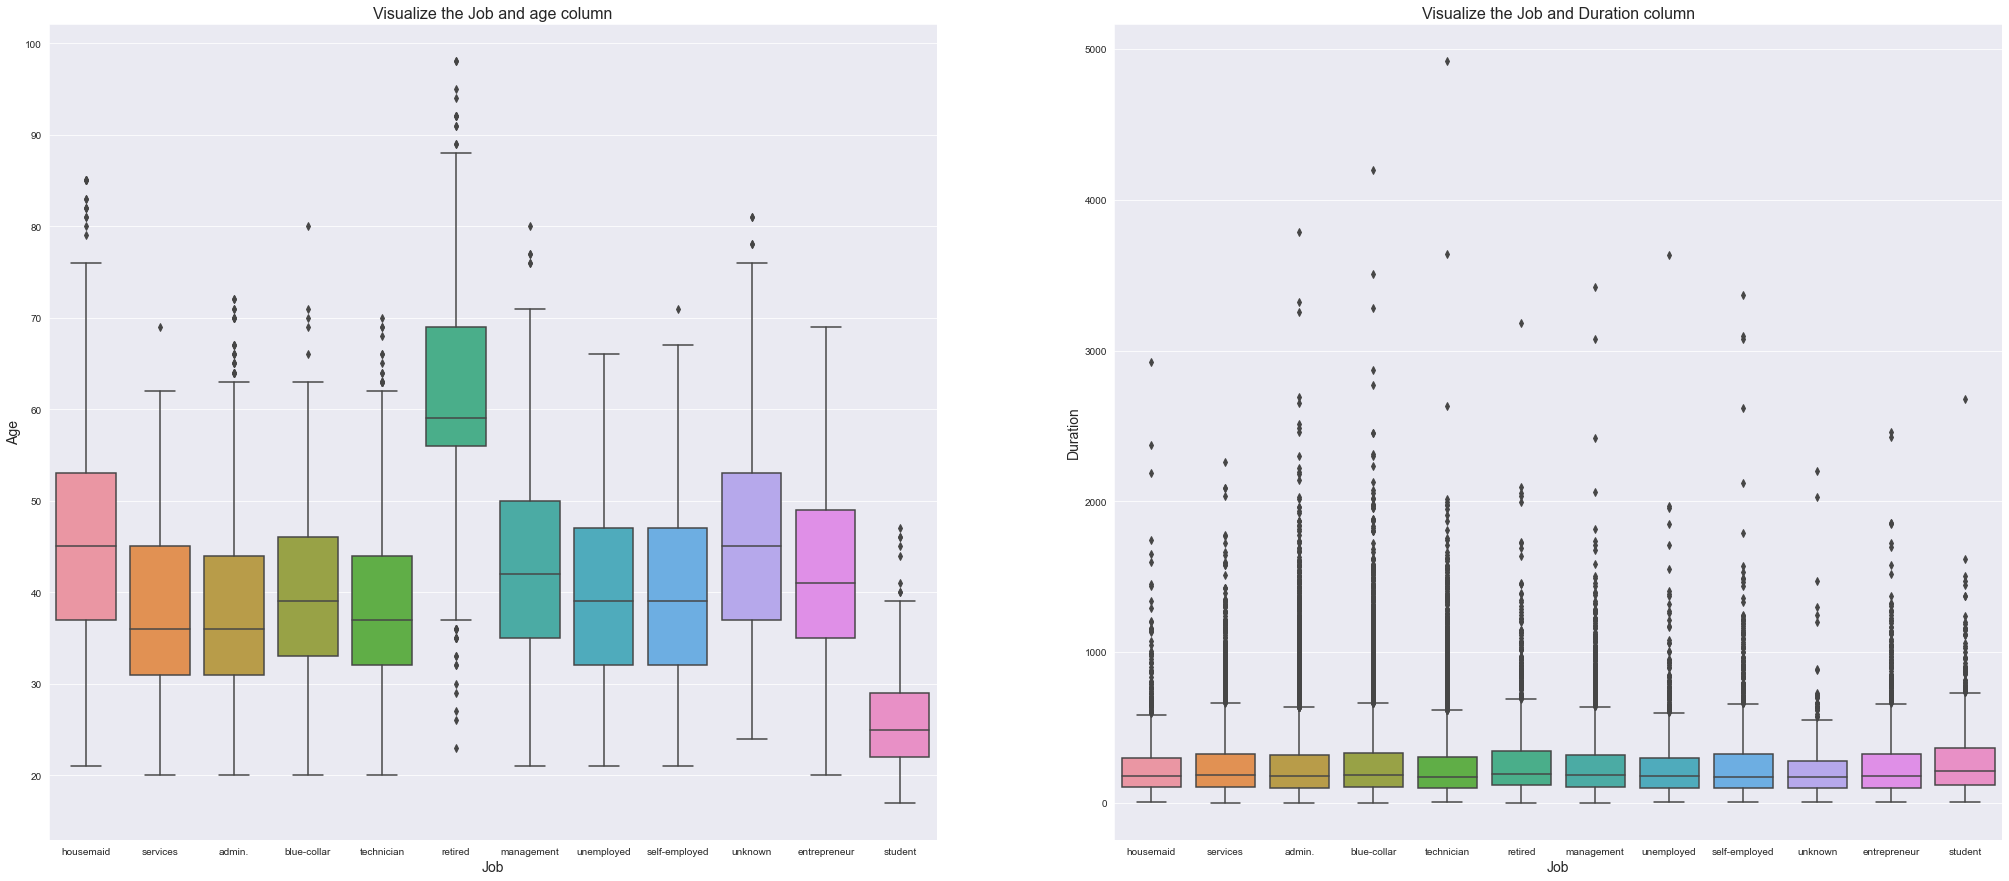

In [71]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='job',y='age',data=bank_df)
plt.title('Visualize the Job and age column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('Age',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='job',y='duration',data=bank_df)
plt.title('Visualize the Job and Duration column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('Duration',fontsize=14)

plt.show()

### Observation :

. Retired clients age is mosly 60 t0 70 years in our campaign.the unemployed and self employed,blue-collar,service,admin,technician,management,unknown and enterpreneur clients are almost from (30-50)age group.clients 20 to 25 age groups are students.from the age group 38 to 58 are housemaid.


. For every job holders call duration is almost same for the campaign its nearly 100 to 300 seconds.retiered person ,students enterpreneur self employeed ,blue-collar clients call duration are slightly high than other.But everyones average call duration are pretty same as per our analysis.


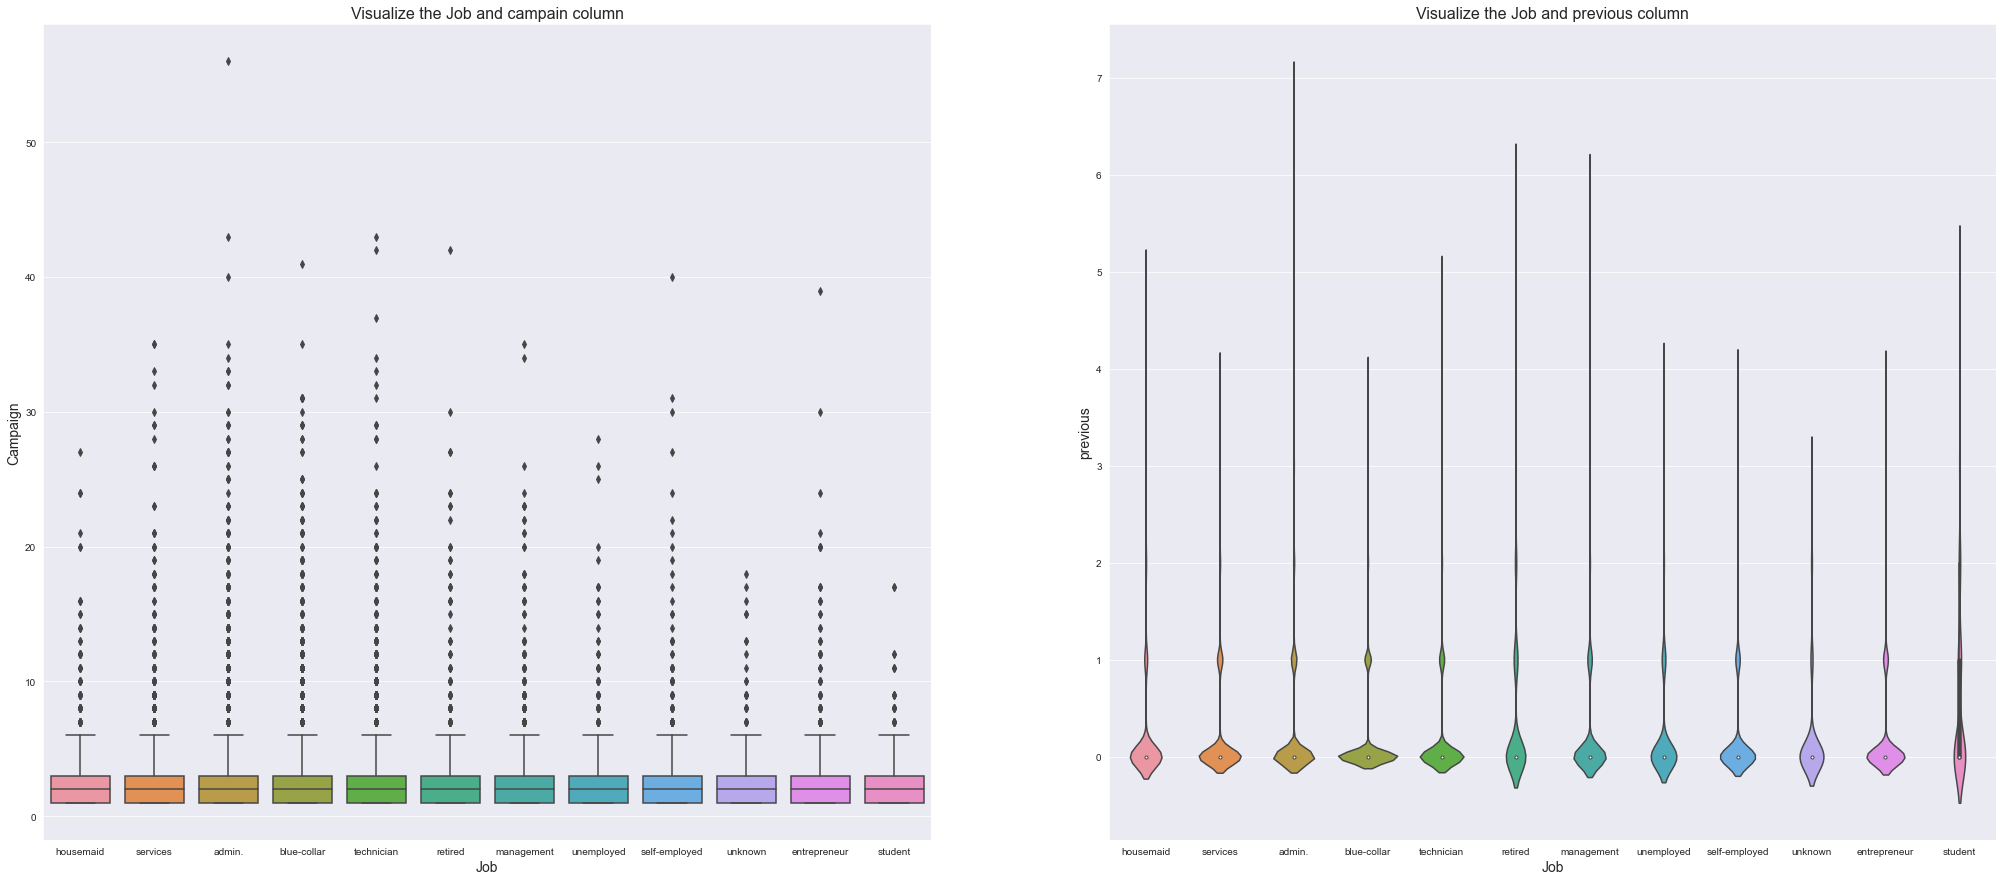

In [72]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='job',y='campaign',data=bank_df)
plt.title('Visualize the Job and campain column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('Campaign',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='job',y='previous',data=bank_df)
plt.title('Visualize the Job and previous column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.show()

### Observation :

* For Every clients number of contact are almost same its about 1 to 2 times nearly they are contacted.On an average every clients are contacted once.


* Before this campaign most of the clients are contacted previously for any other campaign.

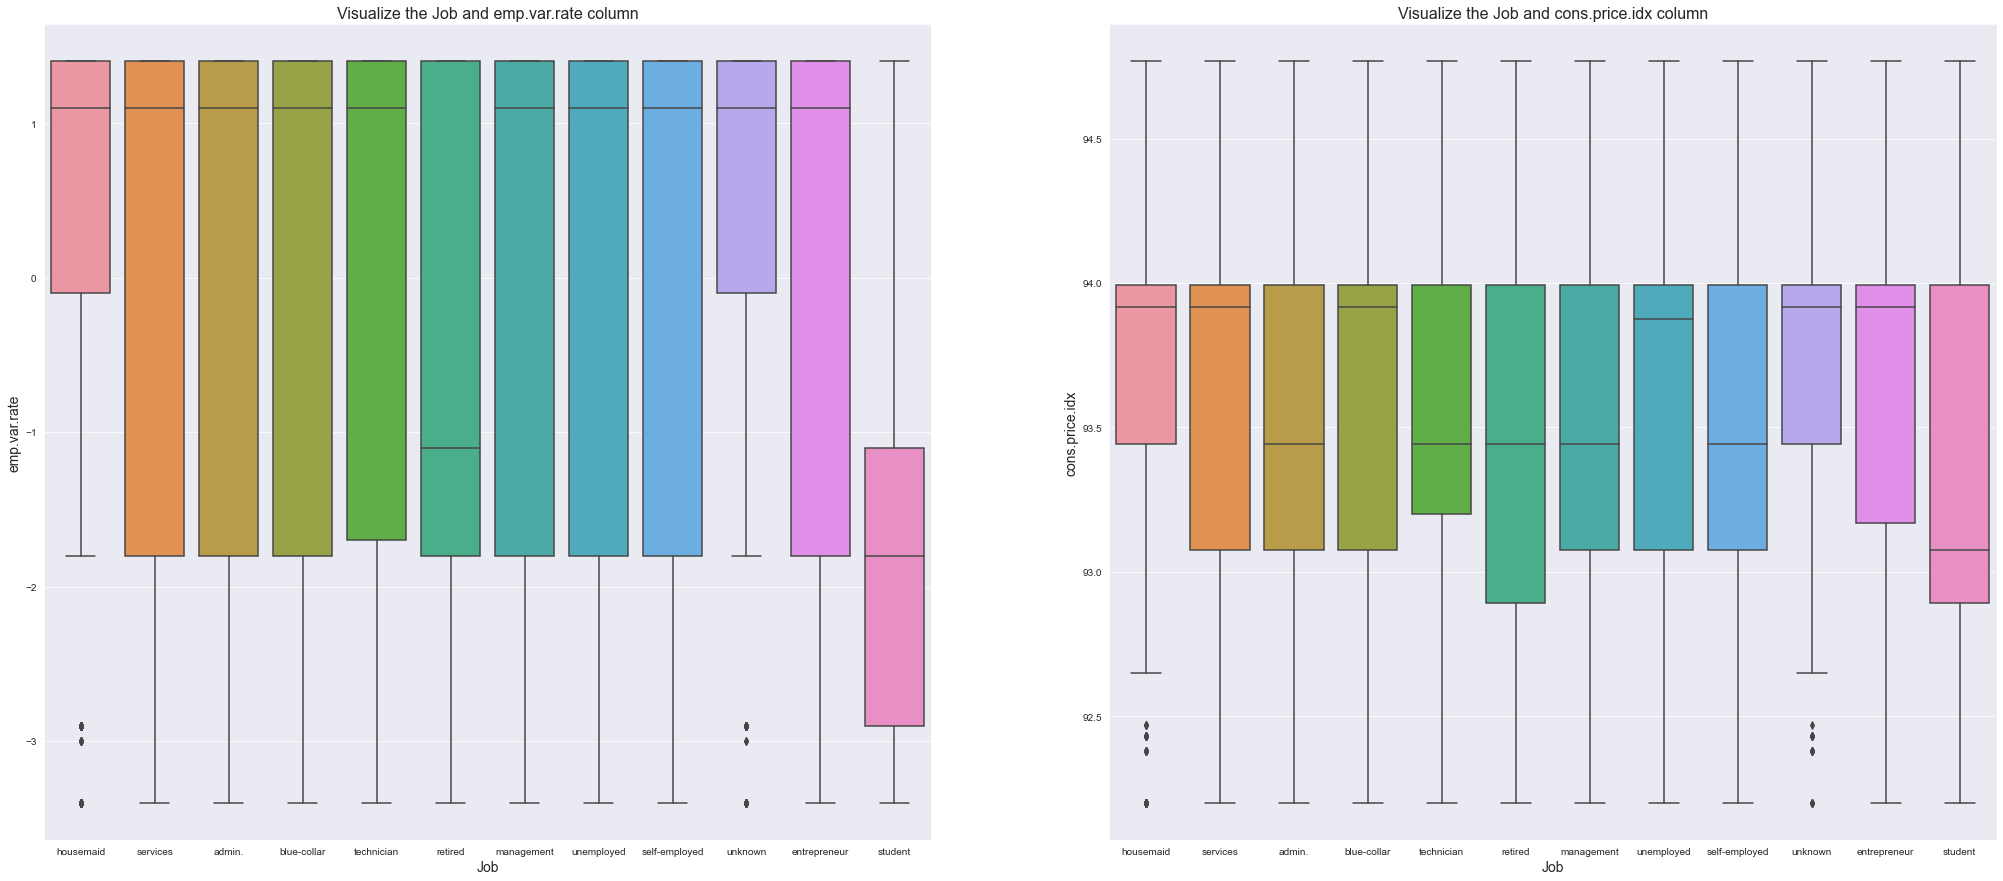

In [73]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='job',y='emp.var.rate',data=bank_df)
plt.title('Visualize the Job and emp.var.rate column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('emp.var.rate',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='job',y='cons.price.idx',data=bank_df)
plt.title('Visualize the Job and cons.price.idx column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('cons.price.idx',fontsize=14)

plt.show()

### Observation :

* Employee variation rate is pretty high for every individual type of job.only students has no employee variation rate.

* the median consumer price index are almost same for housemaid,service,blue-collar,unemployeed,unknown and enterpreneur admin,technician,retired,management,self-employed are also same consumer price index.without student and retiered person every othe jobholders have consumer index between 93 to 95.

Text(0, 0.5, 'cons.conf.idx')

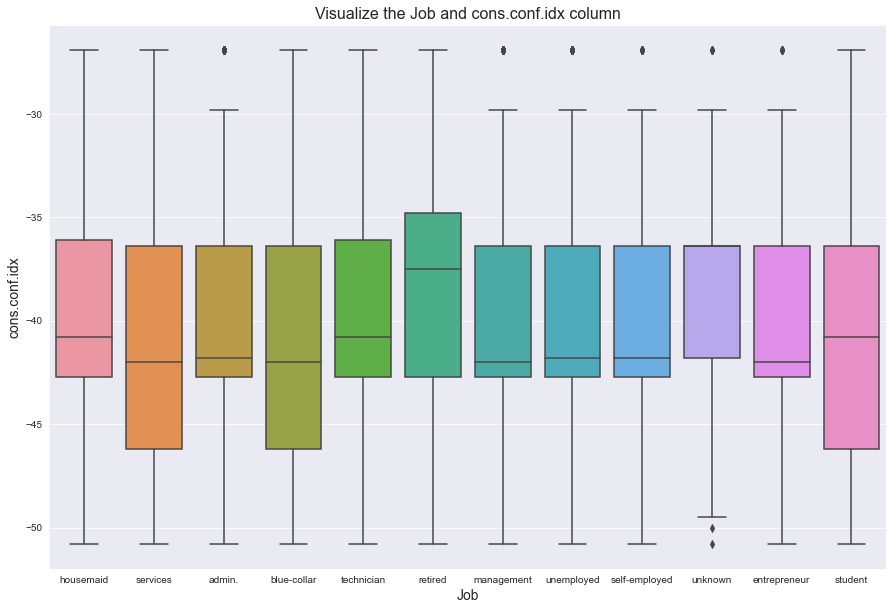

In [74]:
sns.boxplot(x='job',y='cons.conf.idx',data=bank_df)
plt.title('Visualize the Job and cons.conf.idx column',fontsize=16)
plt.xlabel('Job',fontsize=14)
plt.ylabel('cons.conf.idx',fontsize=14)

### Observation :

* Monthly consumer confidence index are pretty high for retired person othe than that every individuals relied almost same consume monthly confidence index

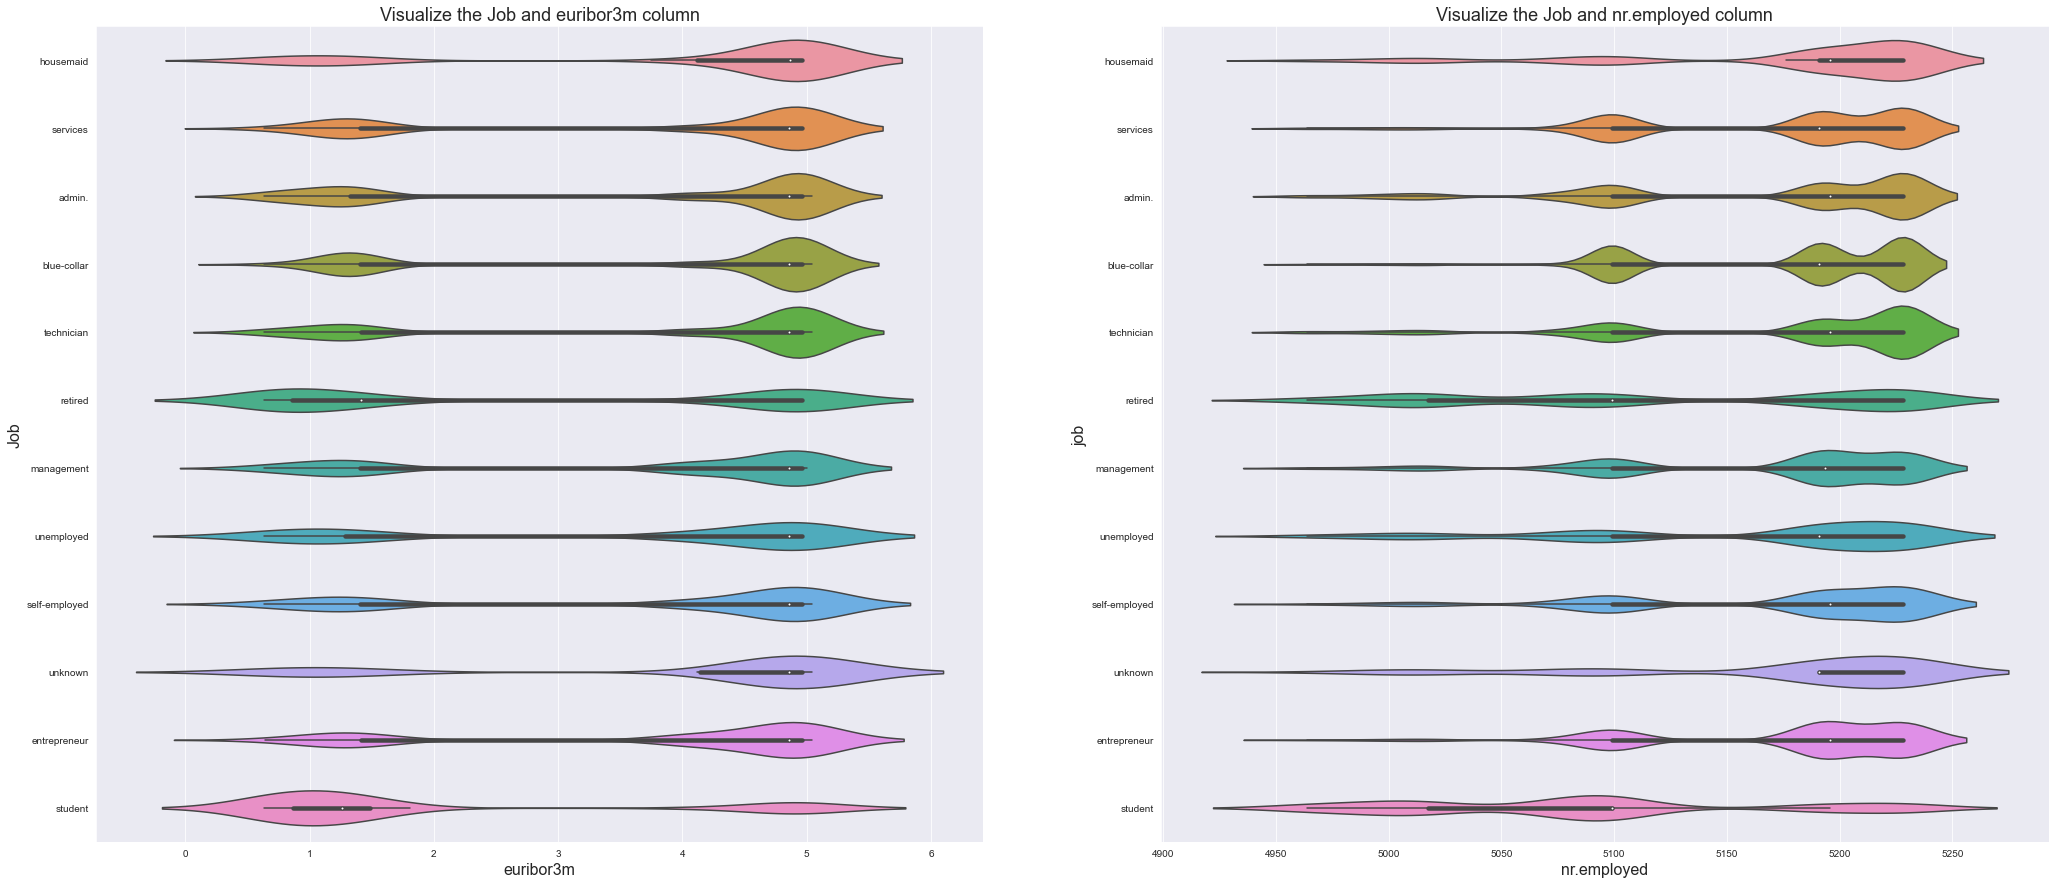

In [75]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.violinplot(y='job',x='euribor3m',data=bank_df)
plt.title('Visualize the Job and euribor3m column',fontsize=18)
plt.ylabel('Job',fontsize=16)
plt.xlabel('euribor3m',fontsize=16)

plt.subplot(1,2,2)
sns.violinplot(y='job',x='nr.employed',data=bank_df)
plt.title('Visualize the Job and nr.employed column',fontsize=18)
plt.ylabel('job',fontsize=16)
plt.xlabel('nr.employed',fontsize=16)
plt.show()

### Observation :

* For students the interest ret is very low but other than student every job holder has high banking interest rate

* Quarterly the most number of employees in housemaid,technician, admin ,blue-collar ,and service section.

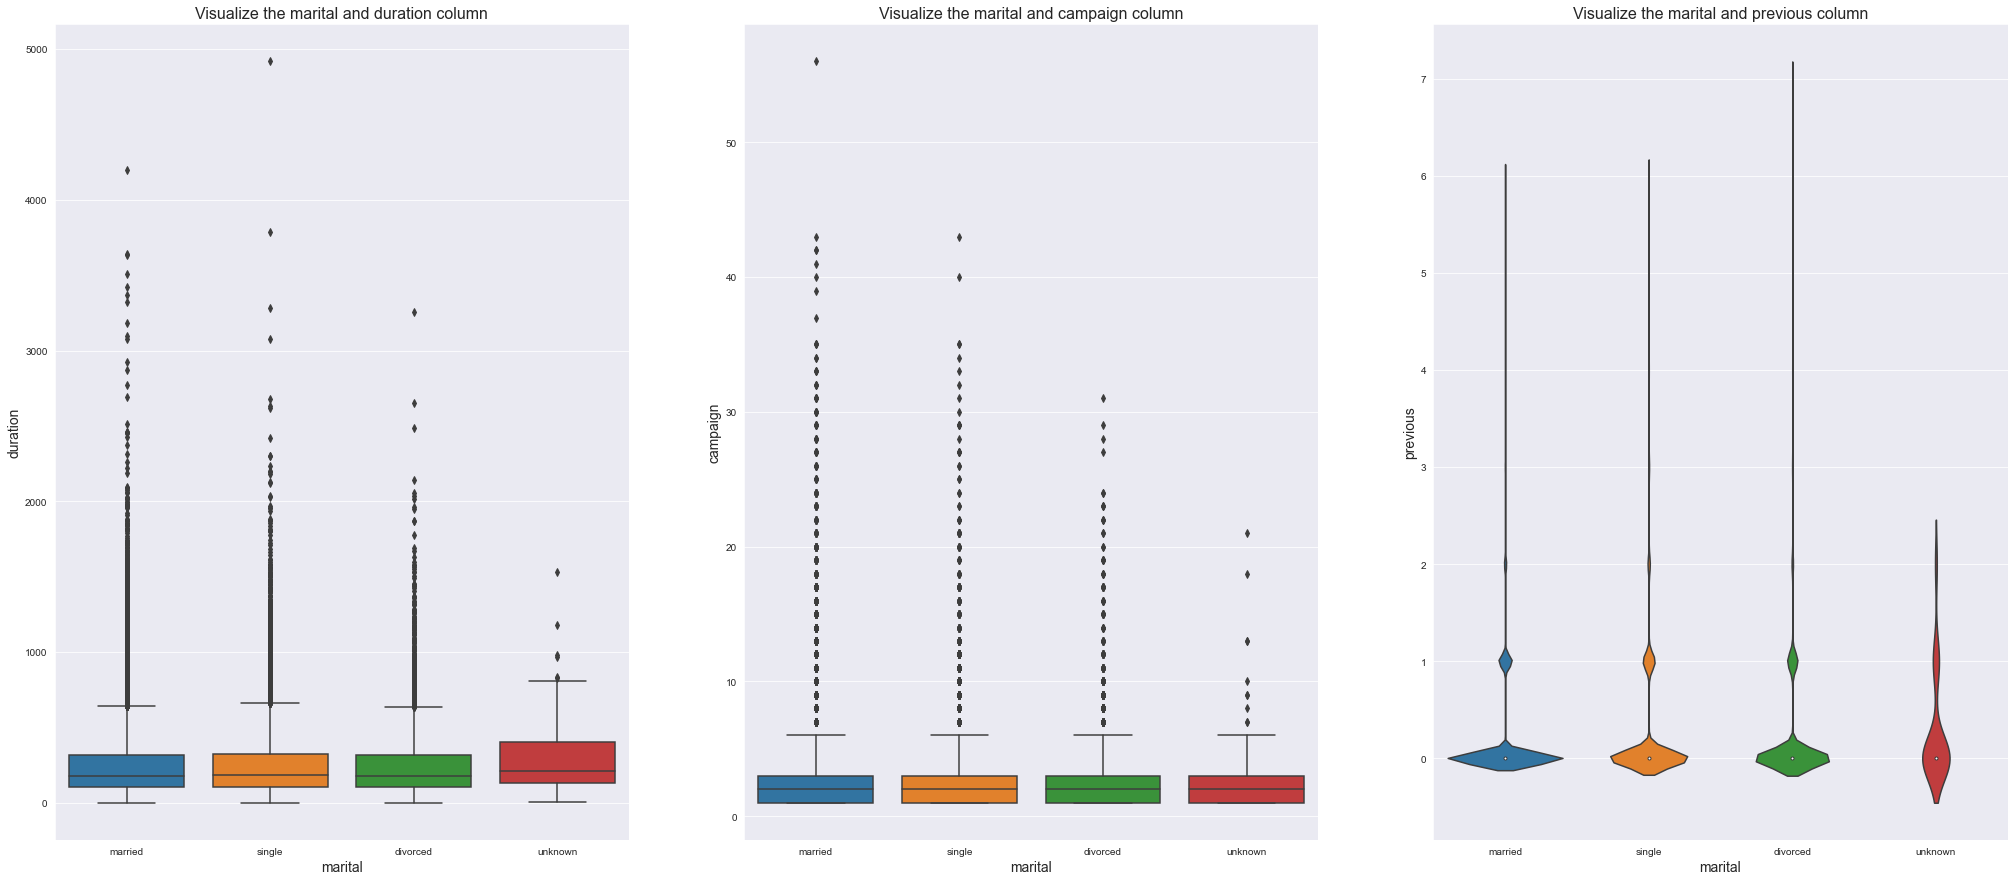

In [76]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.boxplot(x='marital',y='duration',data=bank_df)
plt.title('Visualize the marital and duration column',fontsize=16)
plt.xlabel('marital',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='marital',y='campaign',data=bank_df)
plt.title('Visualize the marital and campaign column',fontsize=16)
plt.xlabel('marital',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='marital',y='previous',data=bank_df)
plt.title('Visualize the marital and previous column',fontsize=16)
plt.xlabel('marital',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.show()

### Observation :

* With every marital status the call duration are almost same.The median call duration time is nealry 100 seconds.

* The bank contacted married ,single or divorced person and also the unknown person 1 to 20  times nearly.

* Before this campaign most of the person belongs to this marital status category not contacted for any other campaign some people cabn be contacted may be once.

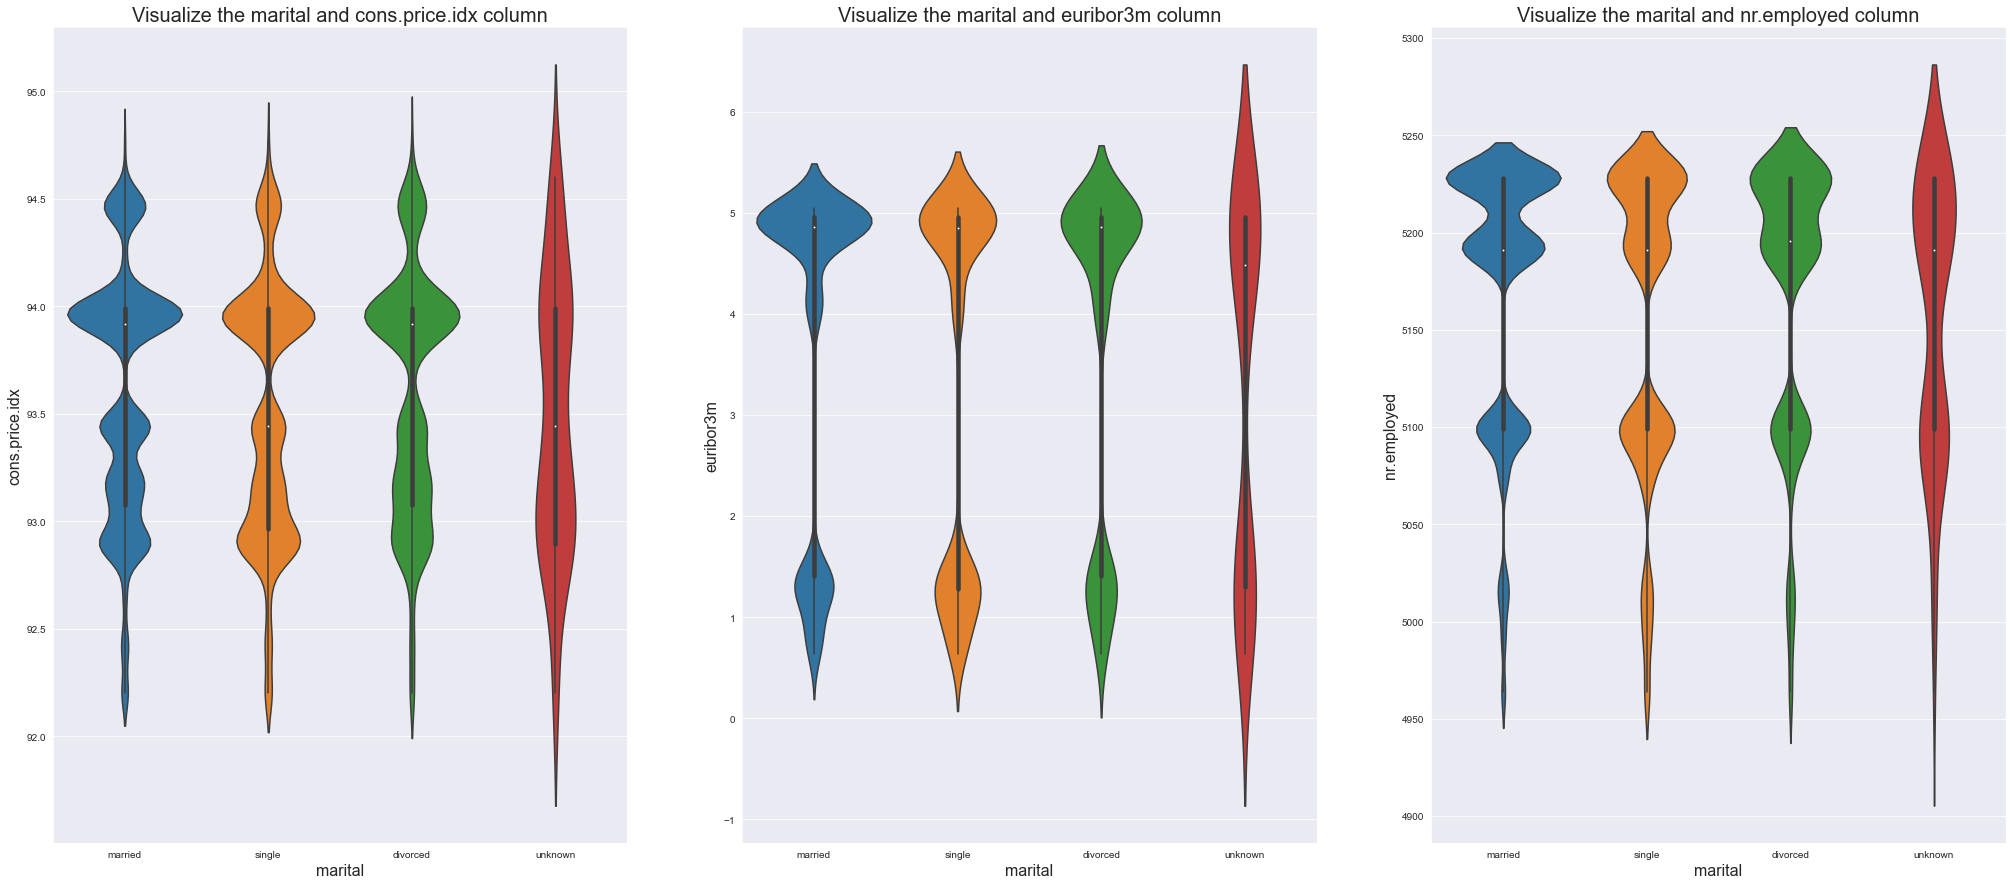

In [77]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='marital',y='cons.price.idx',data=bank_df)
plt.title('Visualize the marital and cons.price.idx column',fontsize=20)
plt.xlabel('marital',fontsize=16)
plt.ylabel('cons.price.idx',fontsize=16)

plt.subplot(1,3,2)
sns.violinplot(x='marital',y='euribor3m',data=bank_df)
plt.title('Visualize the marital and euribor3m column',fontsize=20)
plt.xlabel('marital',fontsize=16)
plt.ylabel('euribor3m',fontsize=16)

plt.subplot(1,3,3)
sns.violinplot(x='marital',y='nr.employed',data=bank_df)
plt.title('Visualize the marital and nr.employed column',fontsize=20)
plt.xlabel('marital',fontsize=16)
plt.ylabel('nr.employed',fontsize=16)

plt.show()

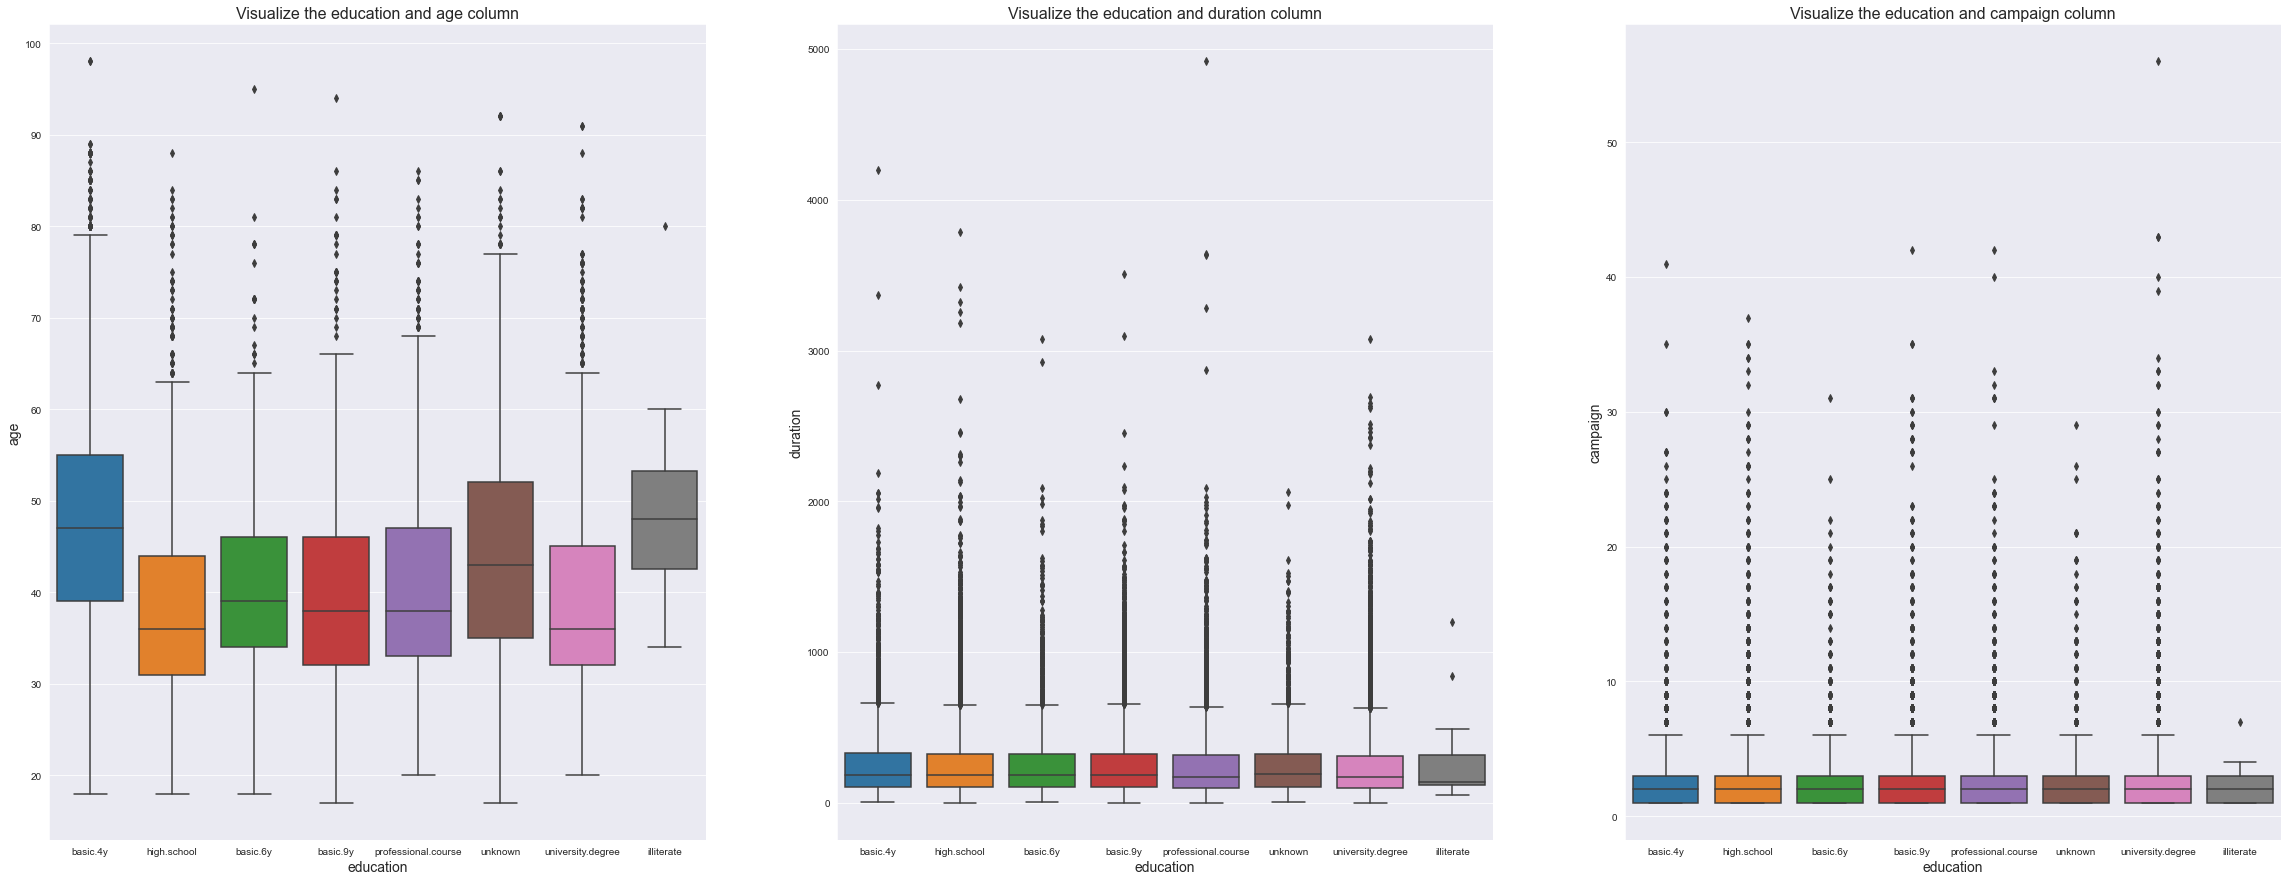

In [78]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.boxplot(x='education',y='age',data=bank_df)
plt.title('Visualize the education and age column',fontsize=16)
plt.xlabel('education',fontsize=14)
plt.ylabel('age',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='education',y='duration',data=bank_df)
plt.title('Visualize the education and duration column',fontsize=16)
plt.xlabel('education',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(x='education',y='campaign',data=bank_df)
plt.title('Visualize the education and campaign column',fontsize=16)
plt.xlabel('education',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.show()

* Most of the clients between 40 to 55 years age besic 4y pass.The clients of age between 32 to 45 who has educational digree of high school,basic 6y,basic 9y and professional course.Clients who has university degrees relies on the age group of 30 to 42the median age of basic 4y is almost 48 and median age of university degree clients 35.There are some illiterate person who are 30 to 40 yrs age.

* Call duration from bank with every educational background are almost same.

* Bank has not contacted many times with any clients more than 1 or 2 during this campaign.

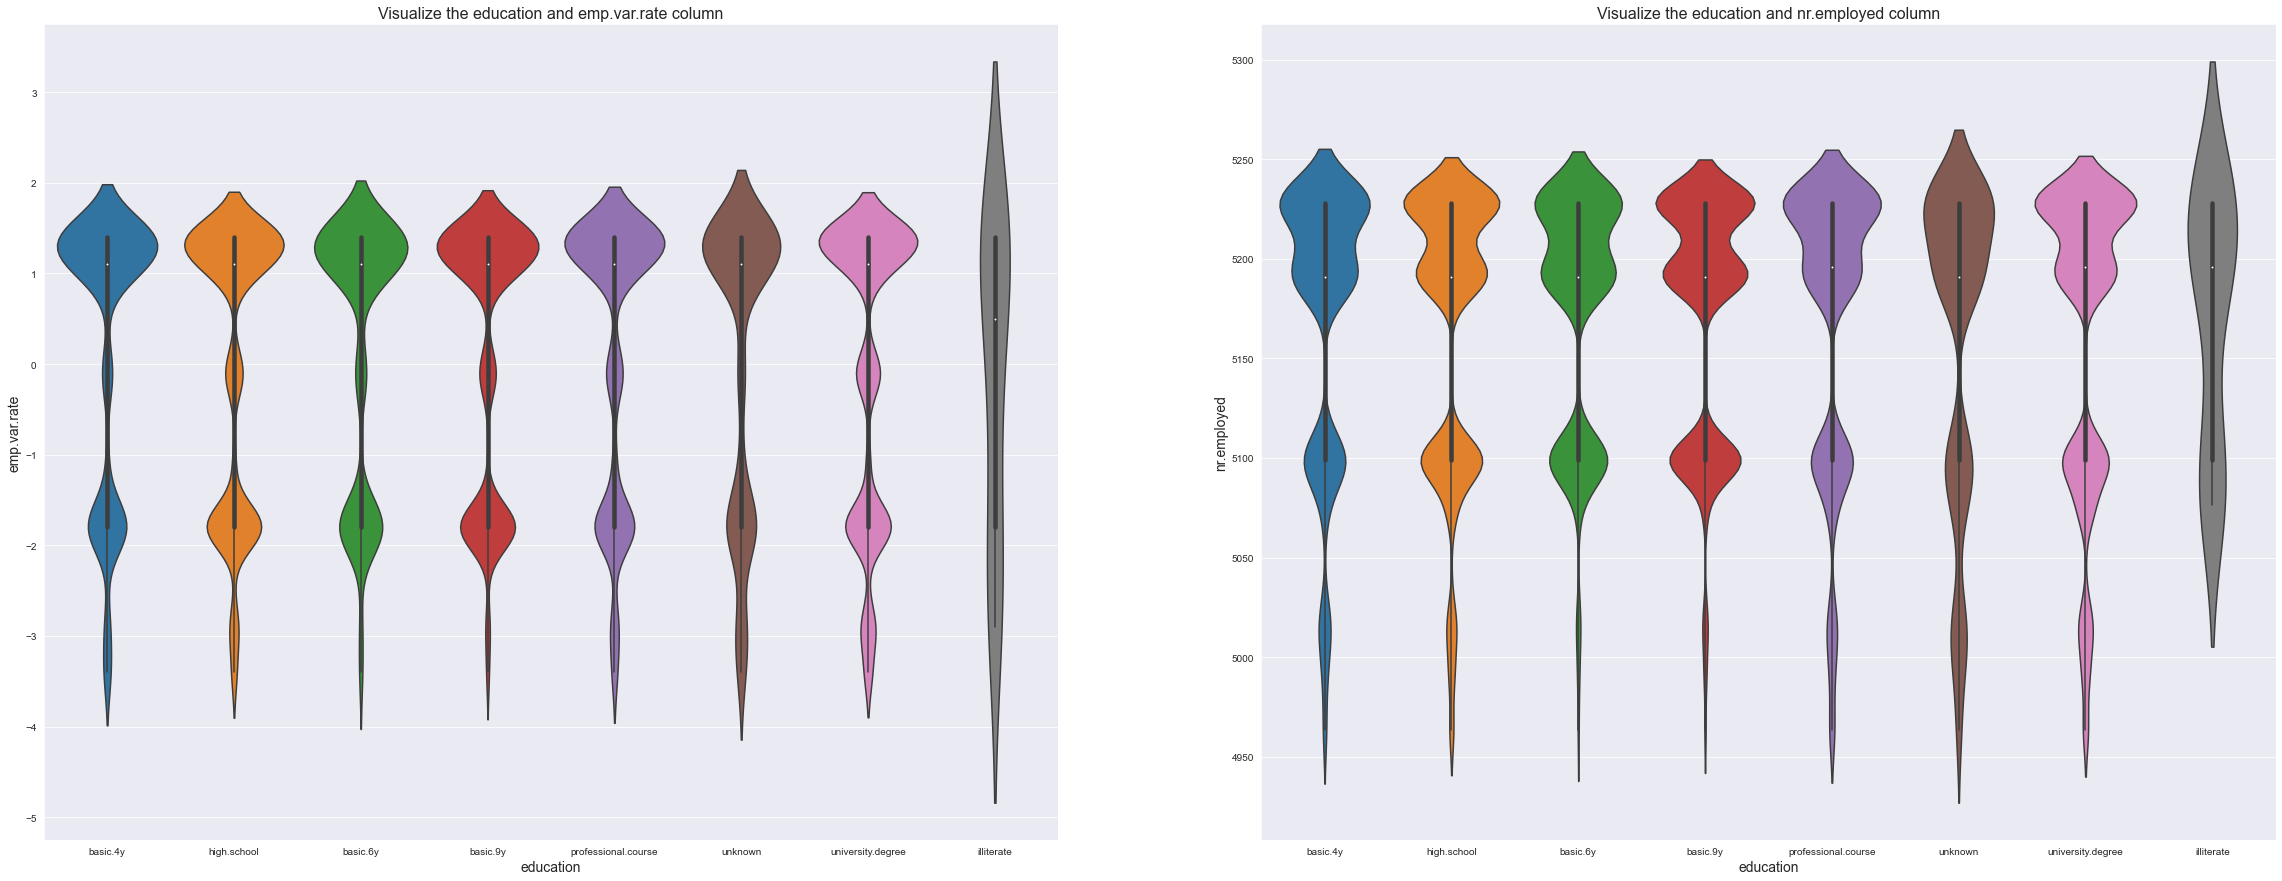

In [79]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.violinplot(x='education',y='emp.var.rate',data=bank_df)
plt.title('Visualize the education and emp.var.rate column',fontsize=16)
plt.xlabel('education',fontsize=14)
plt.ylabel('emp.var.rate',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='education',y='nr.employed',data=bank_df)
plt.title('Visualize the education and nr.employed column',fontsize=16)
plt.xlabel('education',fontsize=14)
plt.ylabel('nr.employed',fontsize=14)

plt.show()

* Without any illiterate client the employee variation rate is pretty high for every educational background.

* From education background high number of employees join in every quarter.

In [ ]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.boxplot(x='default',y='duration',data=bank_df)
plt.title('Visualize the default and duration column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='default',y='campaign',data=bank_df)
plt.title('Visualize the default and campaign column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.show()

* Who are not credit defaulter has been contacted from bank. But the credit defaulter persons are not contacted from bank during this campaign.There are some clients are contacted for the same but their status are unknown,don't know either they are defaulter or not. Call duration was prety high for person who are not credit defaulter.



* Bank contact most of the clients for 1 to 2 times who are not credit dedefaulter few person are contacted more times during the campaign . Also whose status is ``unknown`` they are also contacted for 1 or 2 times.

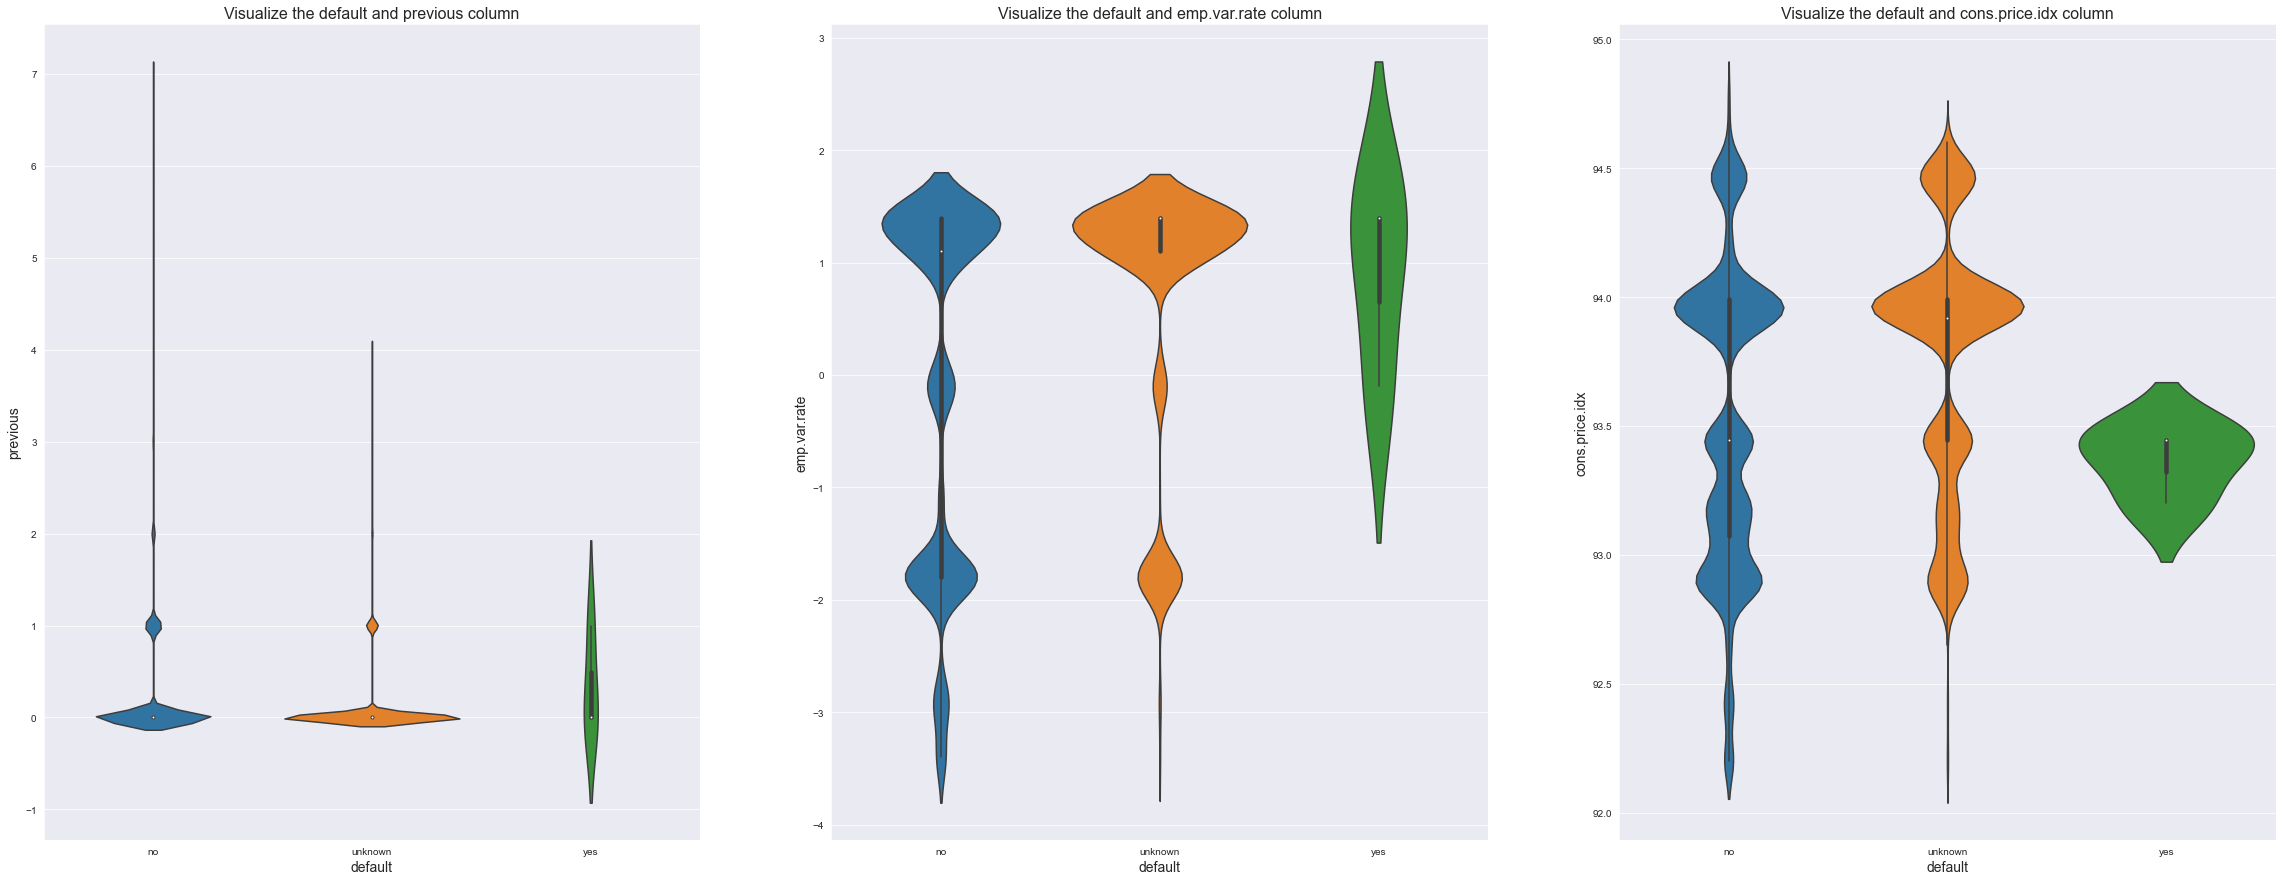

In [80]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.violinplot(x='default',y='previous',data=bank_df)
plt.title('Visualize the default and previous column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='default',y='emp.var.rate',data=bank_df)
plt.title('Visualize the default and emp.var.rate column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('emp.var.rate',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='default',y='cons.price.idx',data=bank_df)
plt.title('Visualize the default and cons.price.idx column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('cons.price.idx',fontsize=14)

plt.show()

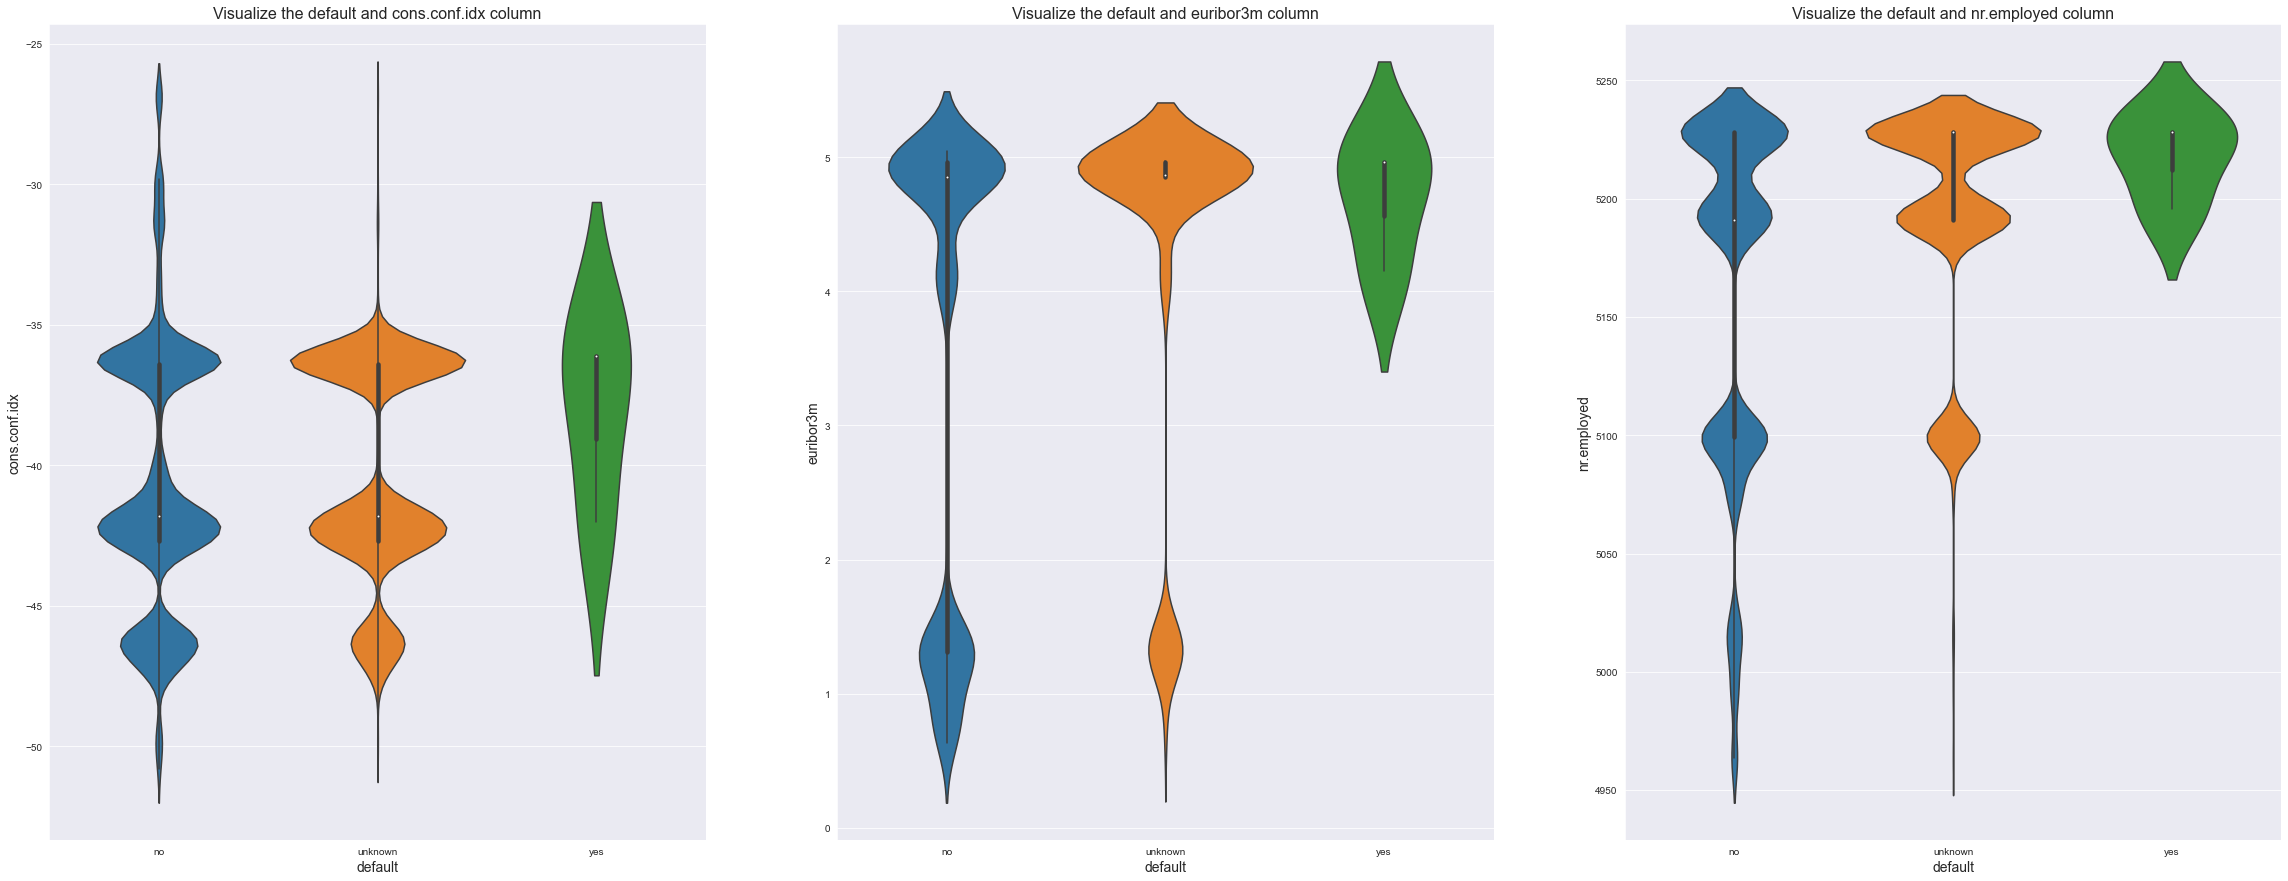

In [81]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.violinplot(x='default',y='cons.conf.idx',data=bank_df)
plt.title('Visualize the default and cons.conf.idx column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('cons.conf.idx',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='default',y='euribor3m',data=bank_df)
plt.title('Visualize the default and euribor3m column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='default',y='nr.employed',data=bank_df)
plt.title('Visualize the default and nr.employed column',fontsize=16)
plt.xlabel('default',fontsize=14)
plt.ylabel('nr.employed',fontsize=14)

plt.show()

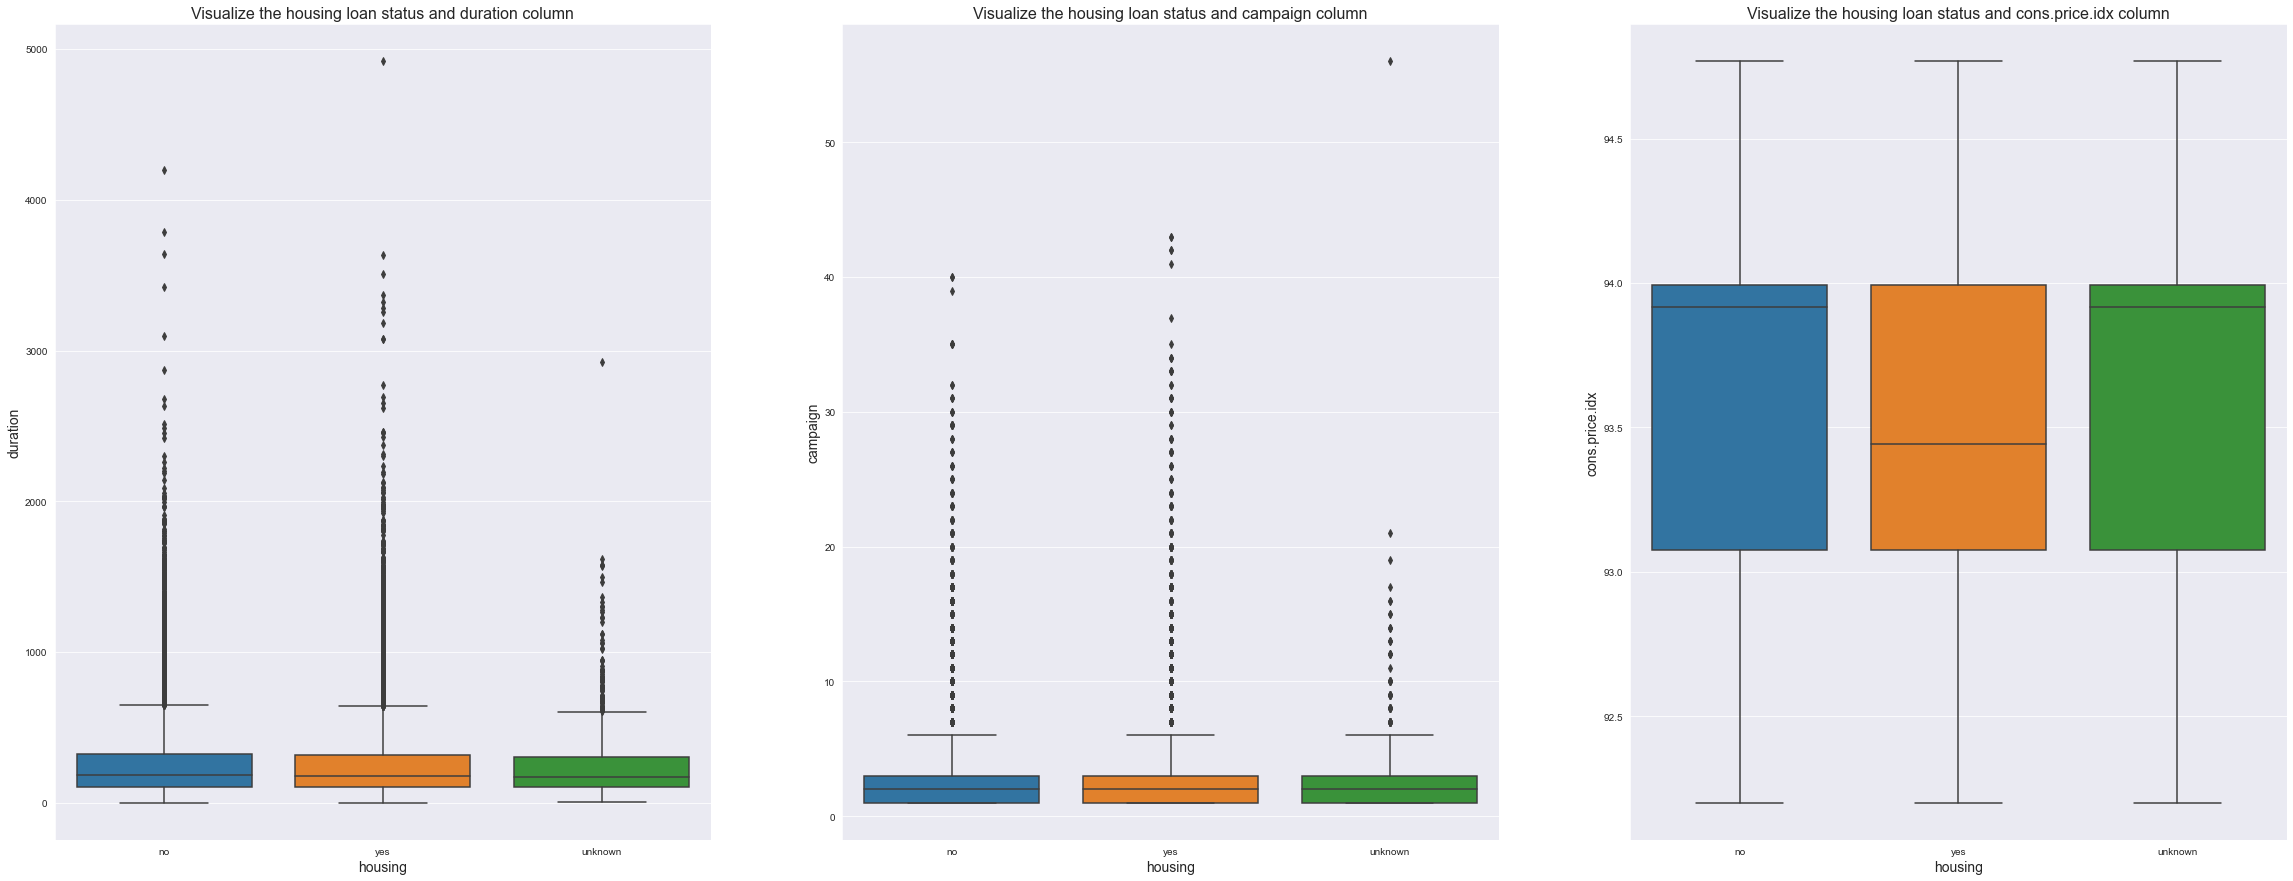

In [82]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.boxplot(x='housing',y='duration',data=bank_df)
plt.title('Visualize the housing loan status and duration column',fontsize=16)
plt.xlabel('housing',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='housing',y='campaign',data=bank_df)
plt.title('Visualize the housing loan status and campaign column',fontsize=16)
plt.xlabel('housing',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(x='housing',y='cons.price.idx',data=bank_df)
plt.title('Visualize the housing loan status and cons.price.idx column',fontsize=16)
plt.xlabel('housing',fontsize=14)
plt.ylabel('cons.price.idx',fontsize=14)

plt.show()

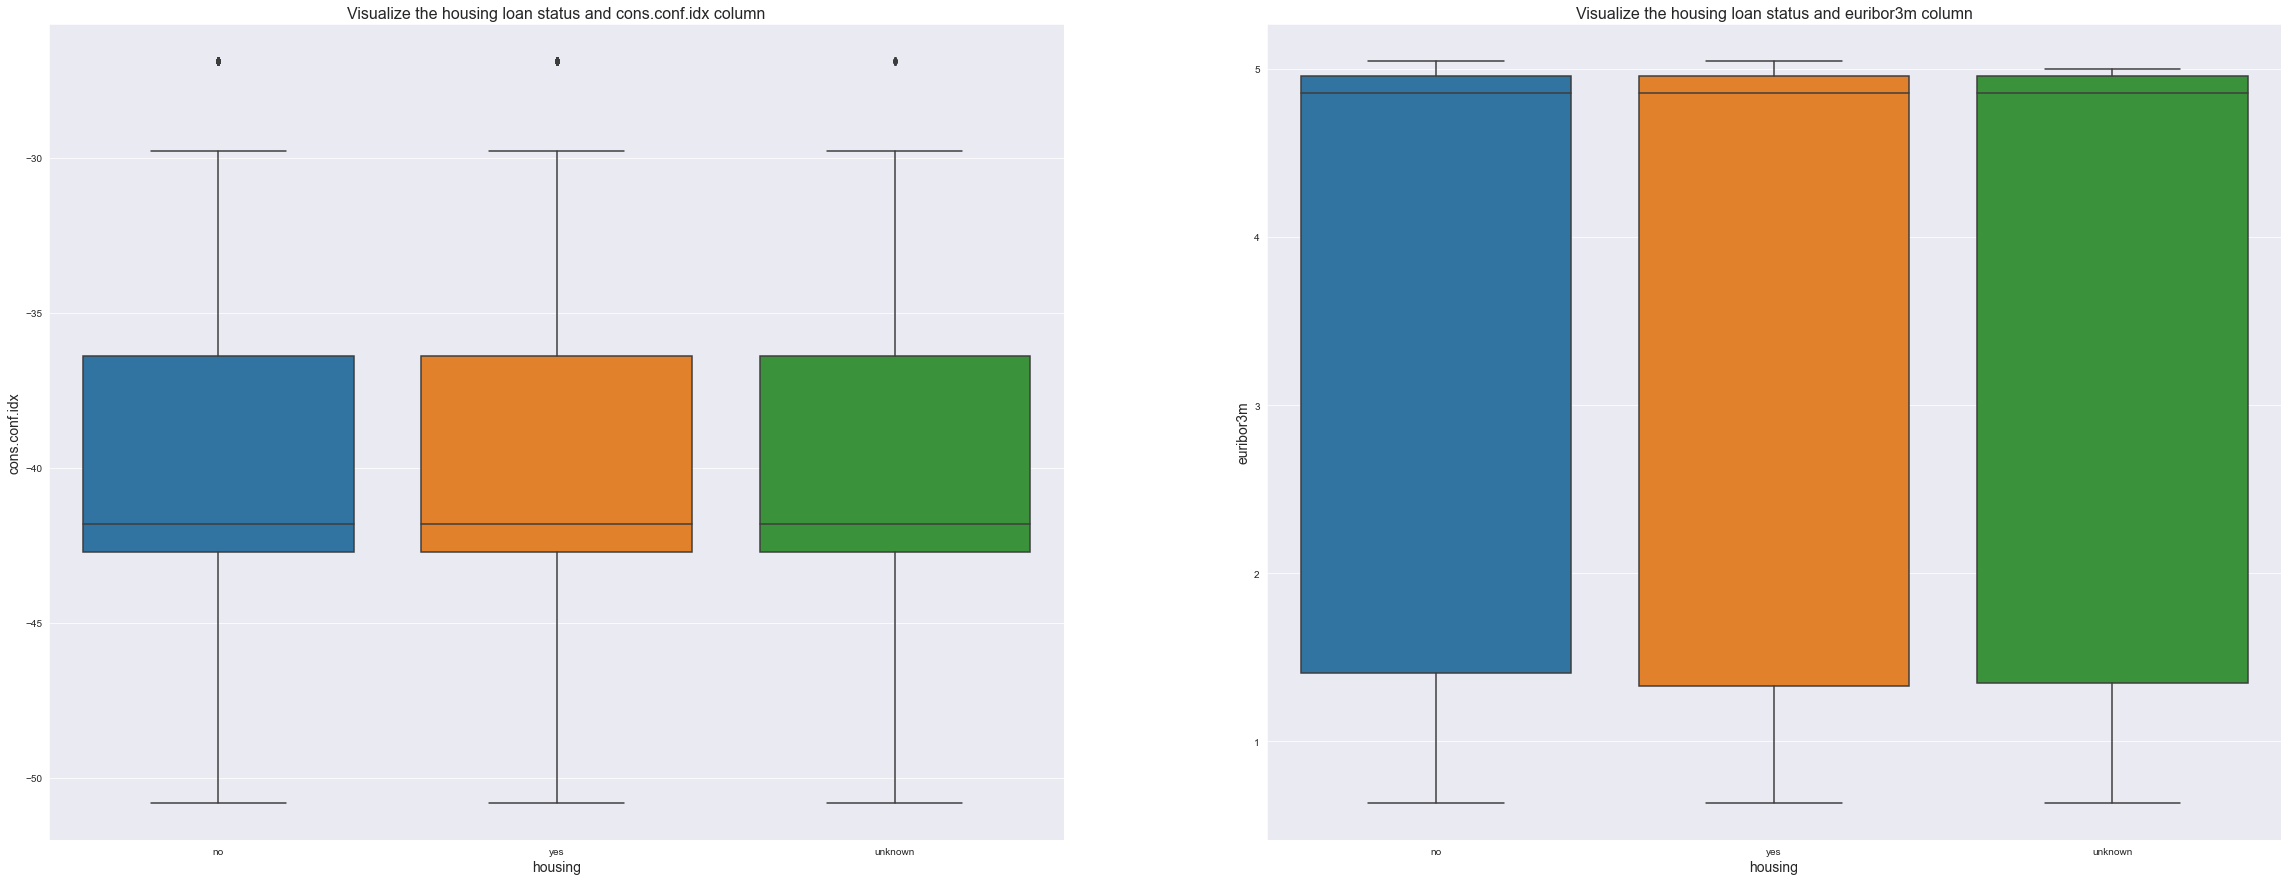

In [83]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.boxplot(x='housing',y='cons.conf.idx',data=bank_df)
plt.title('Visualize the housing loan status and cons.conf.idx column',fontsize=16)
plt.xlabel('housing',fontsize=14)
plt.ylabel('cons.conf.idx',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='housing',y='euribor3m',data=bank_df)
plt.title('Visualize the housing loan status and euribor3m column',fontsize=16)
plt.xlabel('housing',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)

plt.show()

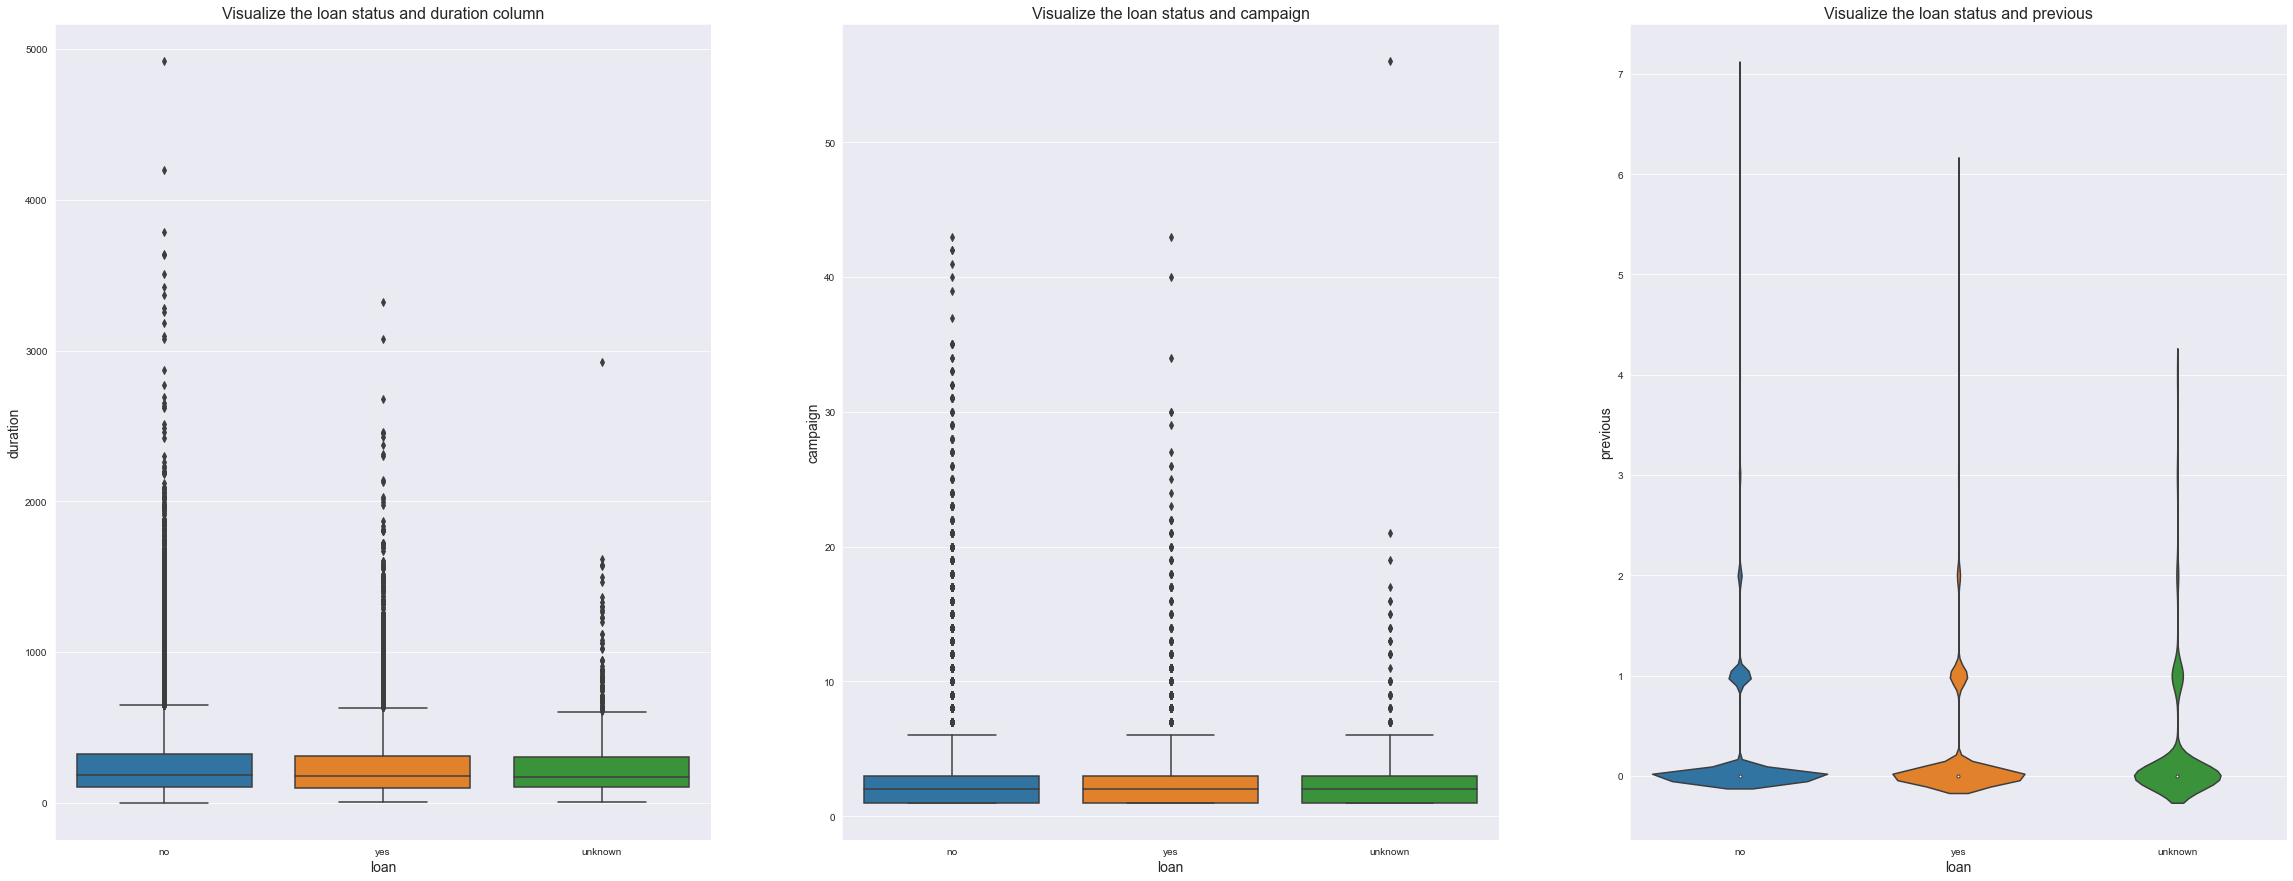

In [84]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.boxplot(x='loan',y='duration',data=bank_df)
plt.title('Visualize the loan status and duration column',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='loan',y='campaign',data=bank_df)
plt.title('Visualize the loan status and campaign',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('campaign',fontsize=14)


plt.subplot(1,3,3)
sns.violinplot(x='loan',y='previous',data=bank_df)
plt.title('Visualize the loan status and previous',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.show()

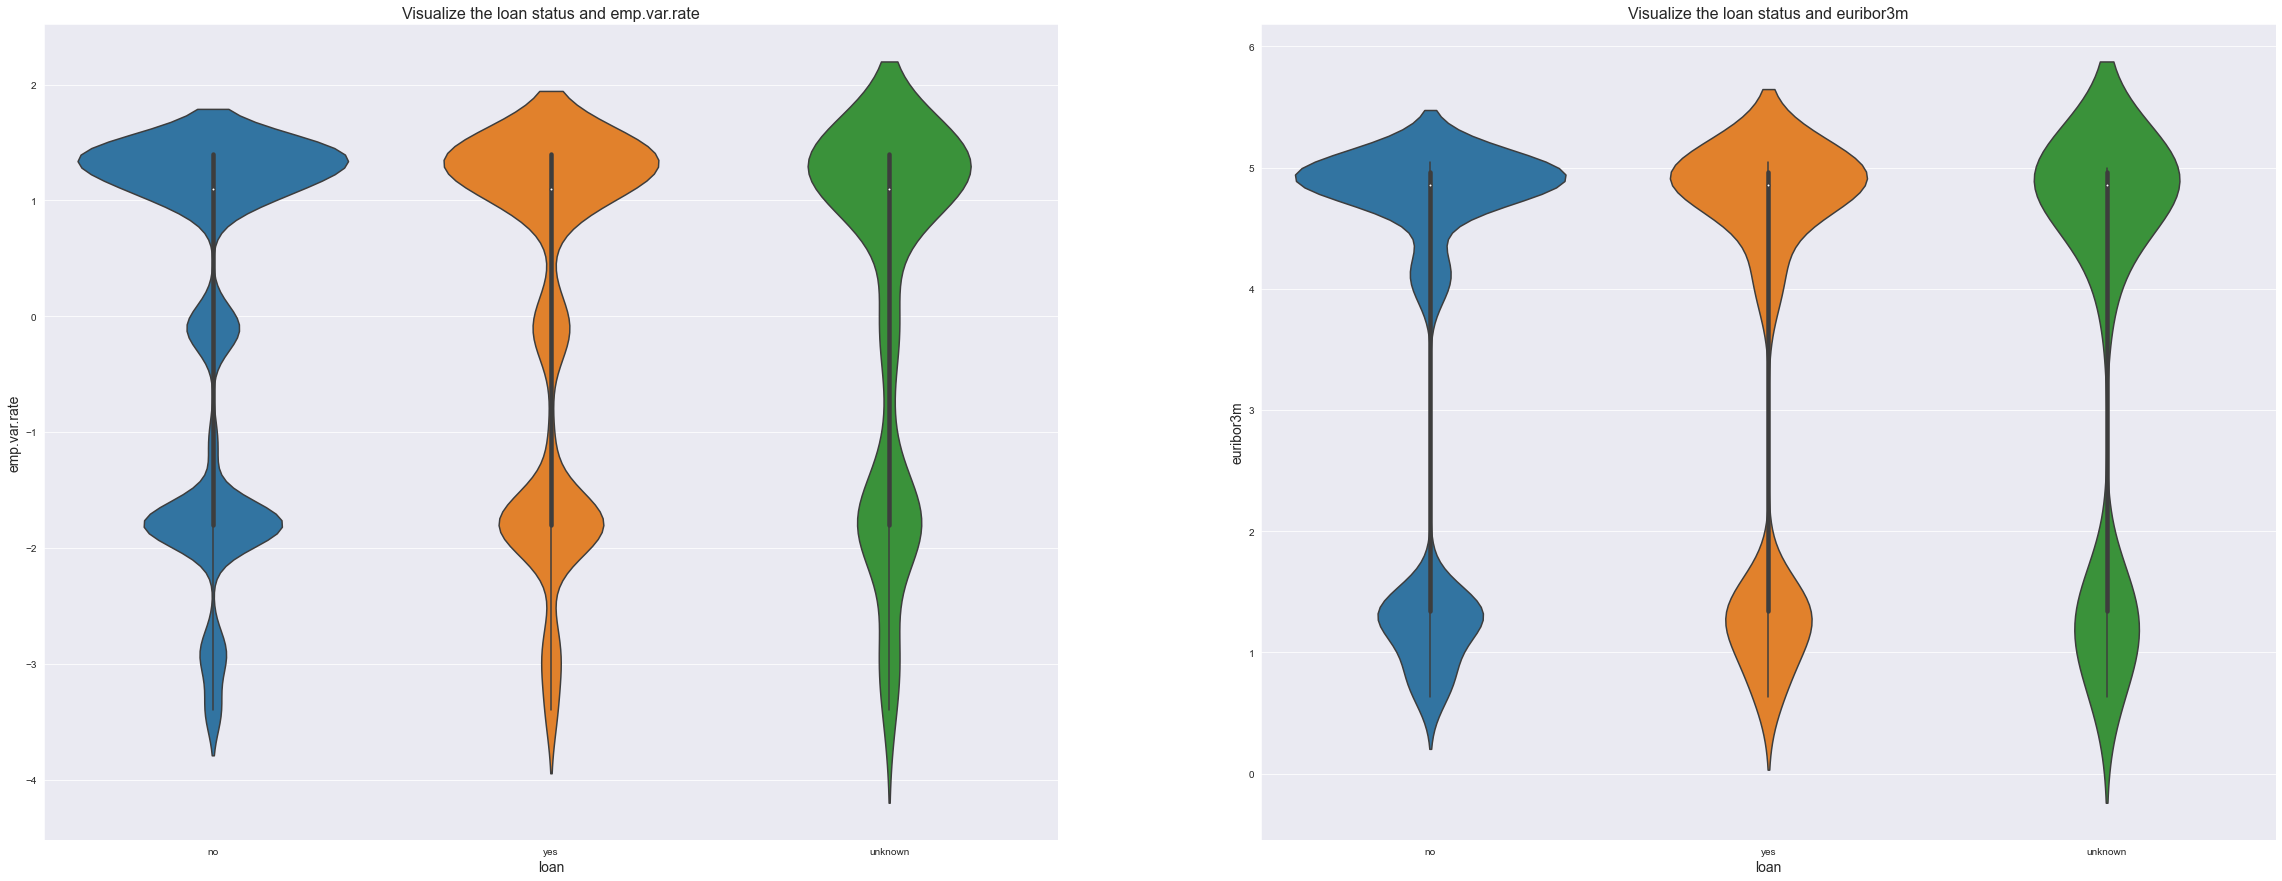

In [85]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.violinplot(x='loan',y='emp.var.rate',data=bank_df)
plt.title('Visualize the loan status and emp.var.rate',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('emp.var.rate',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='loan',y='euribor3m',data=bank_df)
plt.title('Visualize the loan status and euribor3m',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)

plt.show()

Text(0, 0.5, 'euribor3m')

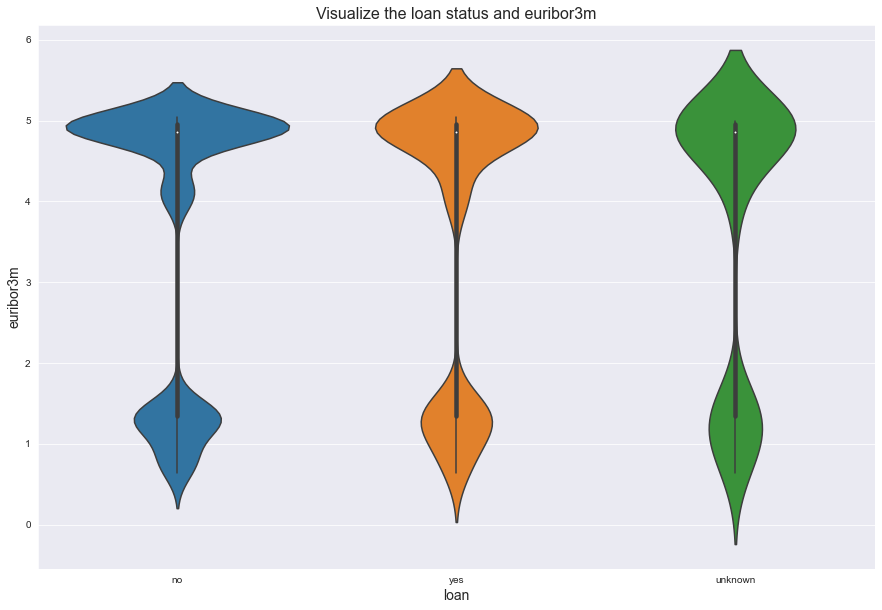

In [86]:
sns.violinplot(x='loan',y='euribor3m',data=bank_df)
plt.title('Visualize the loan status and euribor3m',fontsize=16)
plt.xlabel('loan',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)

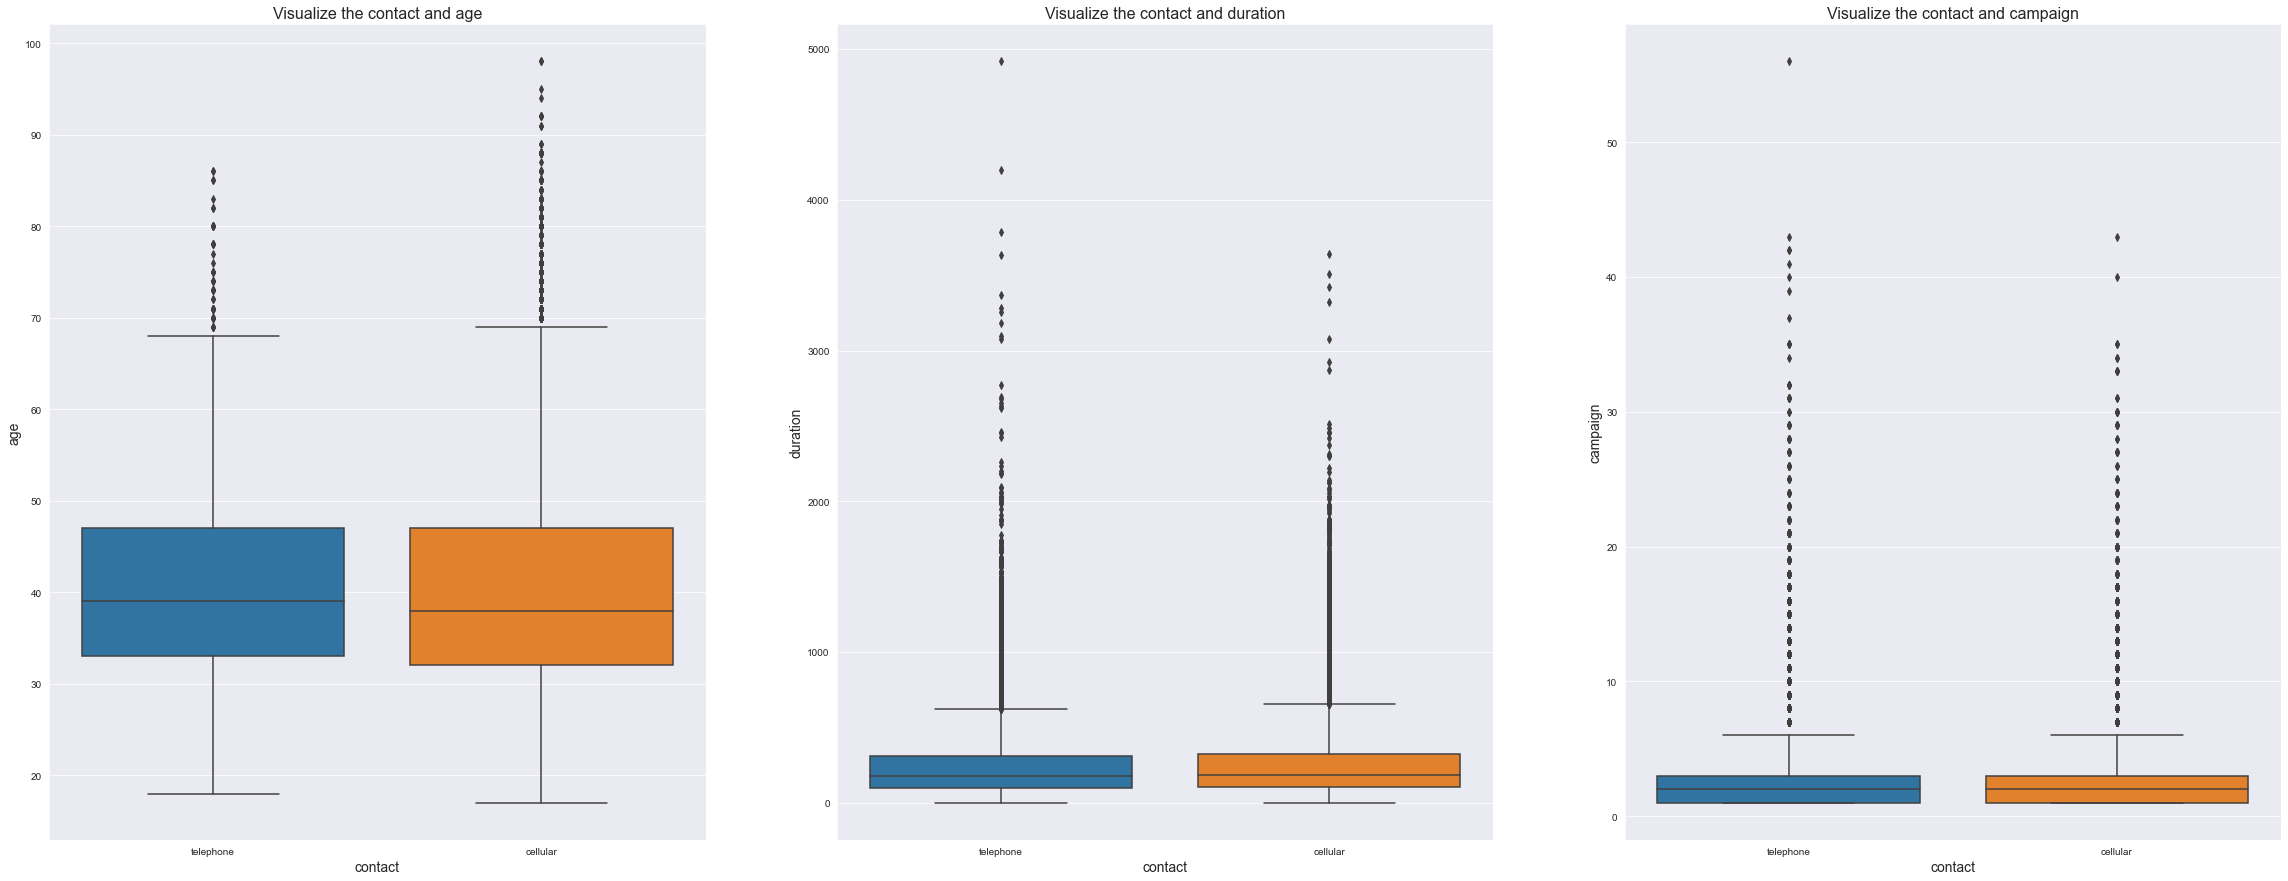

In [87]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.boxplot(x='contact',y='age',data=bank_df)
plt.title('Visualize the contact and age',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('age',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='contact',y='duration',data=bank_df)
plt.title('Visualize the contact and duration',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(x='contact',y='campaign',data=bank_df)
plt.title('Visualize the contact and campaign',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.show()

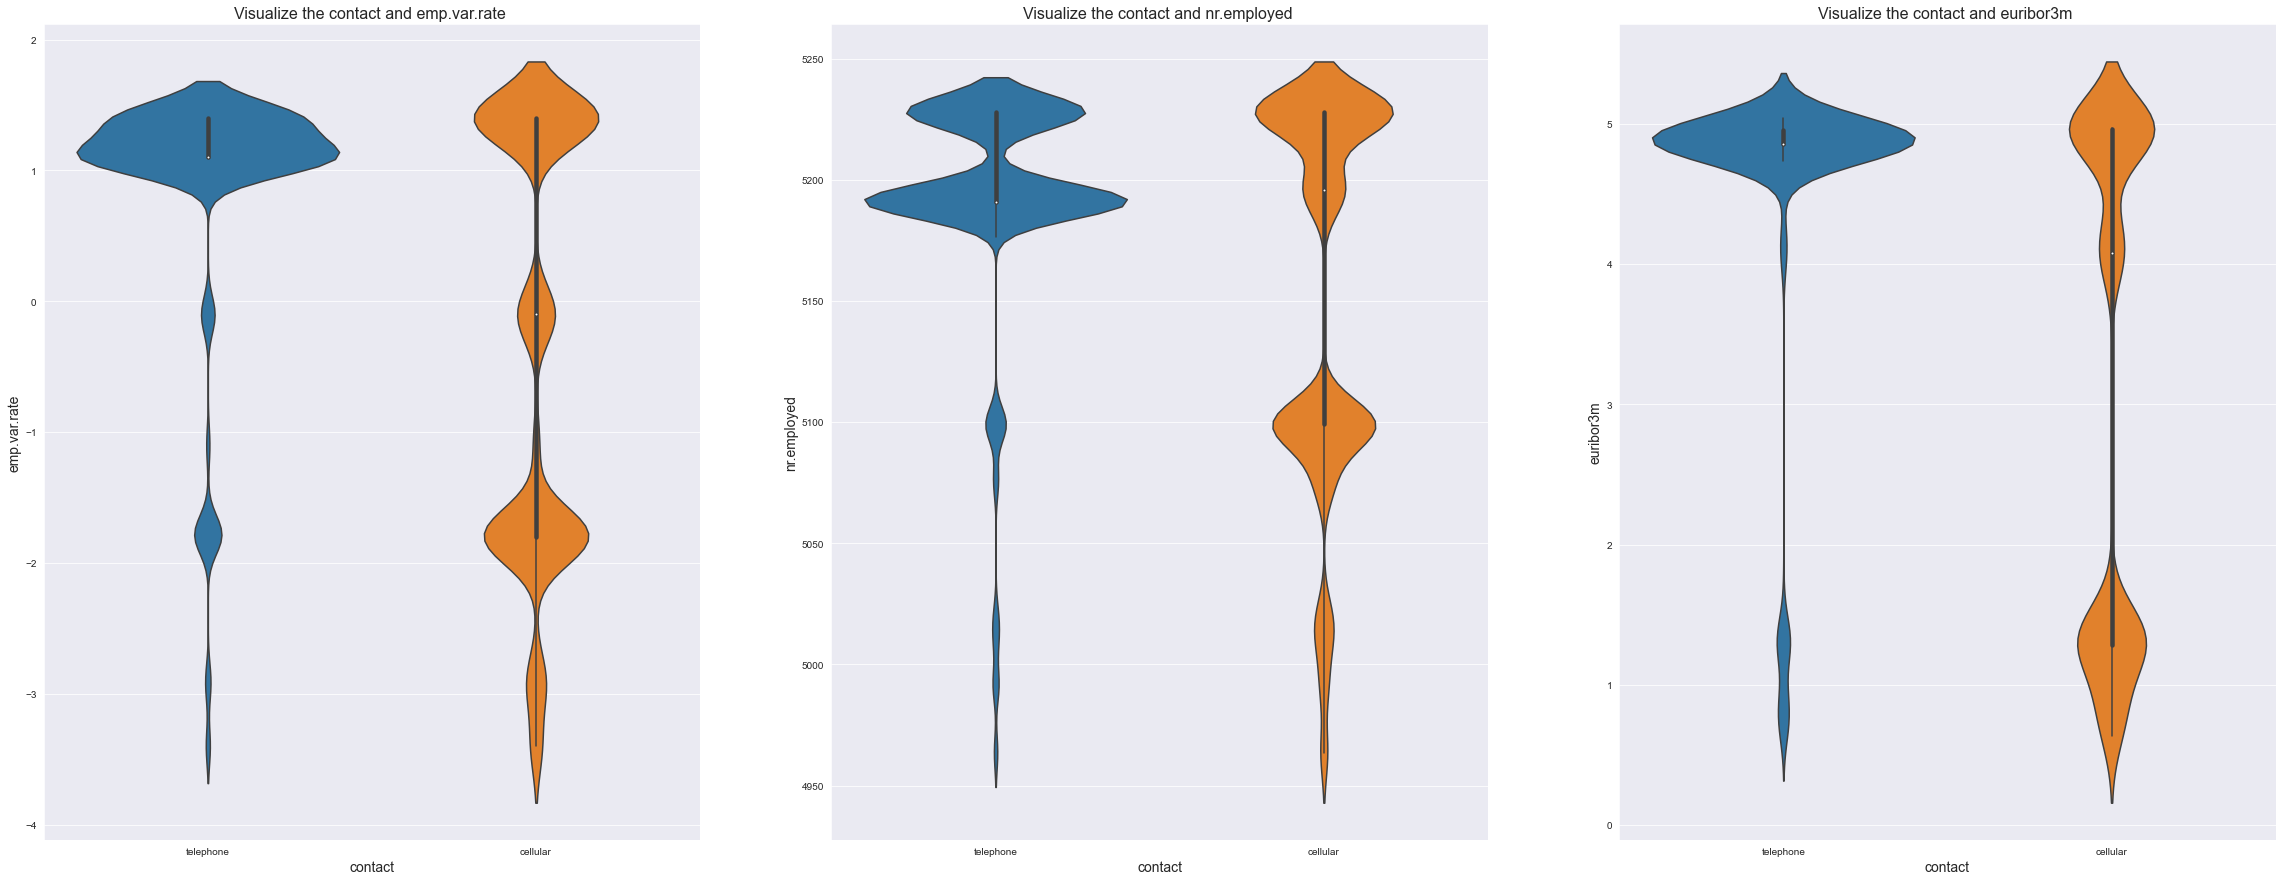

In [88]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.violinplot(x='contact',y='emp.var.rate',data=bank_df)
plt.title('Visualize the contact and emp.var.rate ',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('emp.var.rate',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='contact',y='nr.employed',data=bank_df)
plt.title('Visualize the contact and nr.employed ',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('nr.employed',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='contact',y='euribor3m',data=bank_df)
plt.title('Visualize the contact and euribor3m ',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)
plt.show()

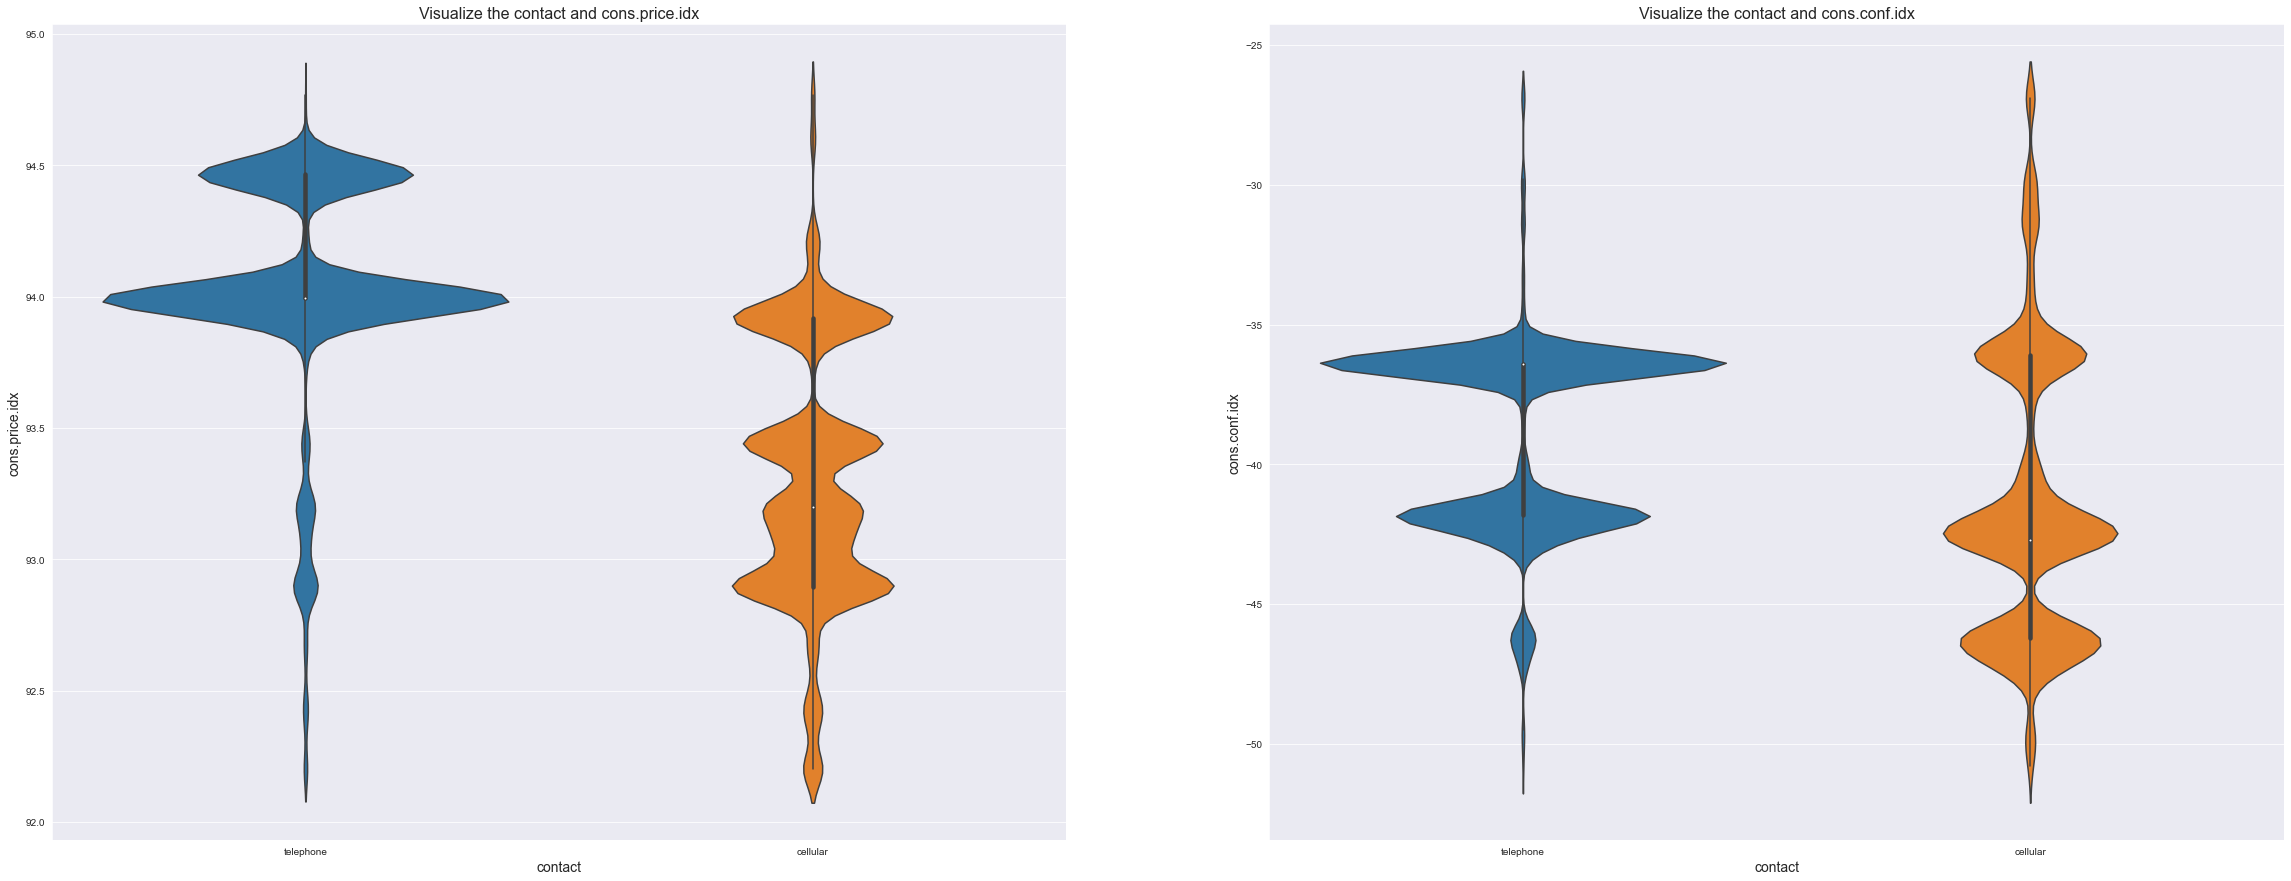

In [89]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.violinplot(x='contact',y='cons.price.idx',data=bank_df)
plt.title('Visualize the contact and cons.price.idx',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('cons.price.idx',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='contact',y='cons.conf.idx',data=bank_df)
plt.title('Visualize the contact and cons.conf.idx',fontsize=16)
plt.xlabel('contact',fontsize=14)
plt.ylabel('cons.conf.idx',fontsize=14)

plt.show()

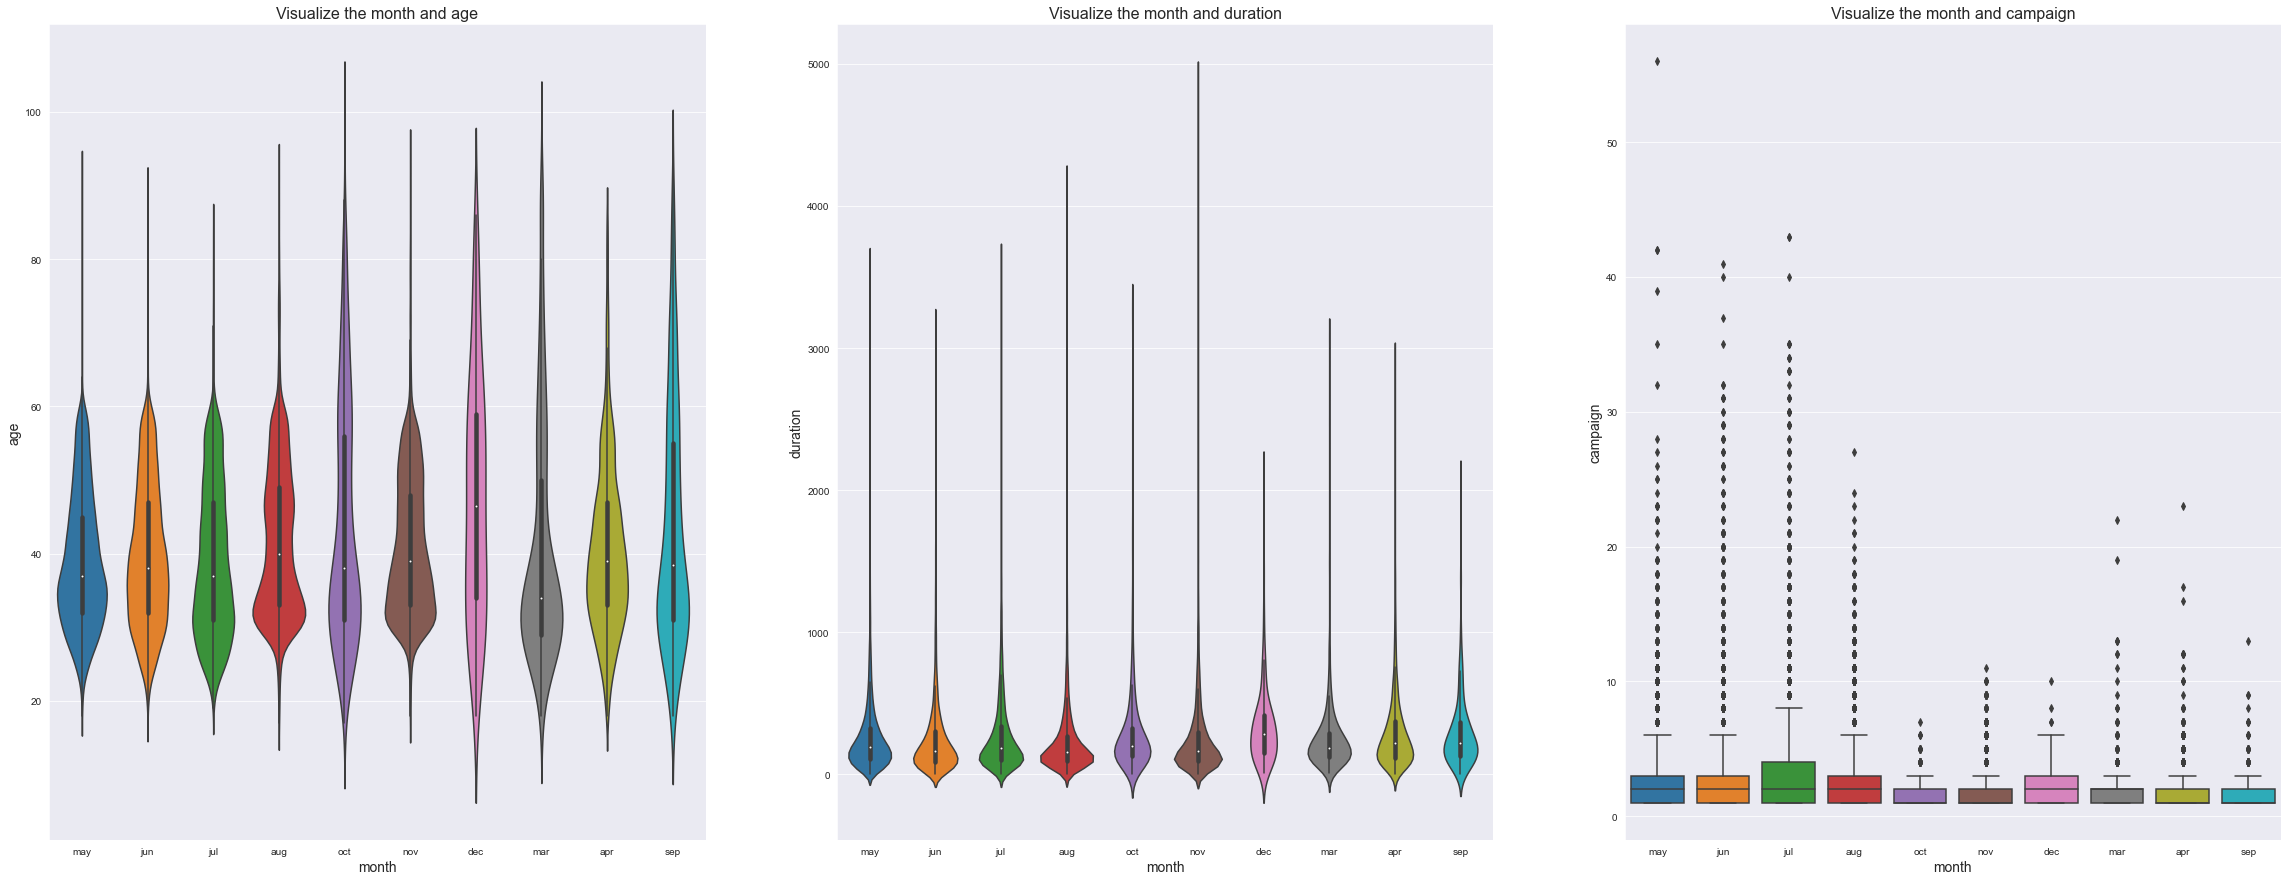

In [90]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.violinplot(x='month',y='age',data=bank_df)
plt.title('Visualize the month and age',fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('age',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='month',y='duration',data=bank_df)
plt.title('Visualize the month and duration',fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(x='month',y='campaign',data=bank_df)
plt.title('Visualize the month and campaign',fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.show()

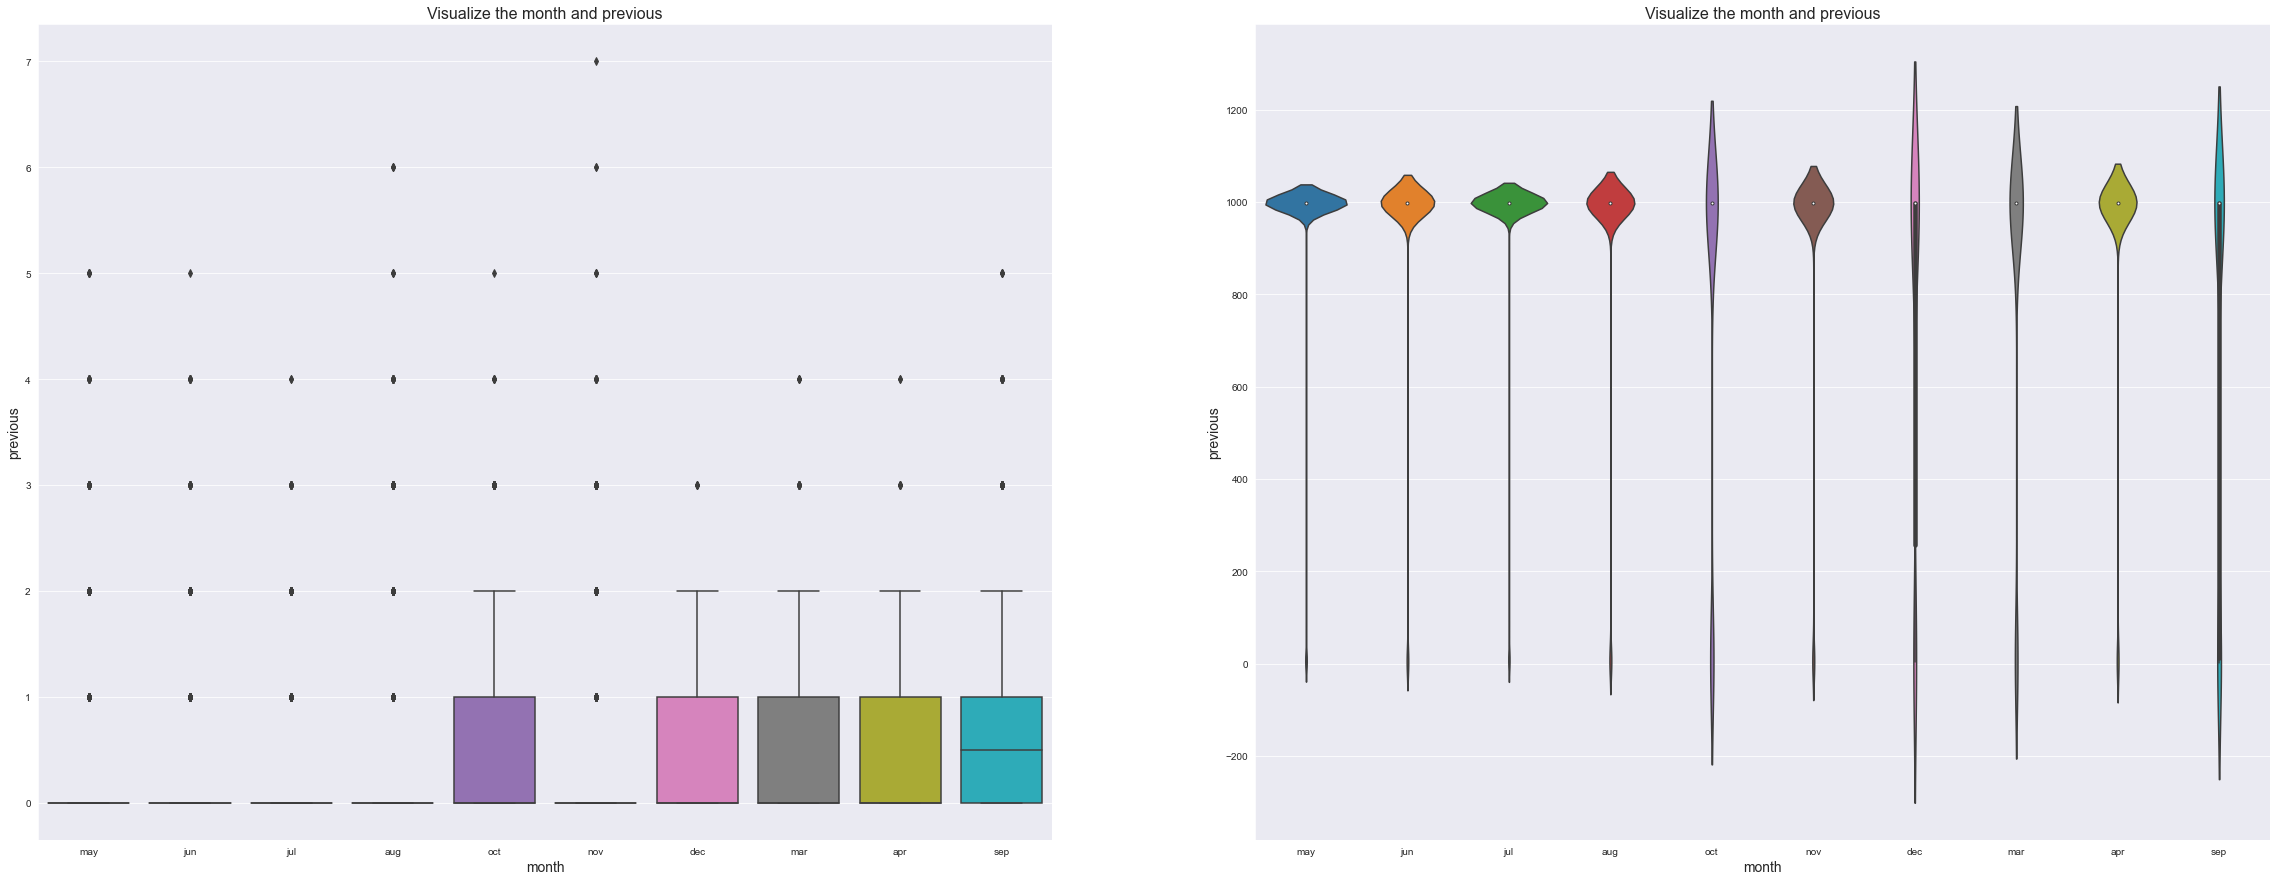

In [91]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
sns.boxplot(x='month',y='previous',data=bank_df)
plt.title('Visualize the month and previous',fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='month',y='pdays',data=bank_df)
plt.title('Visualize the month and previous',fontsize=16)
plt.xlabel('month',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.show()

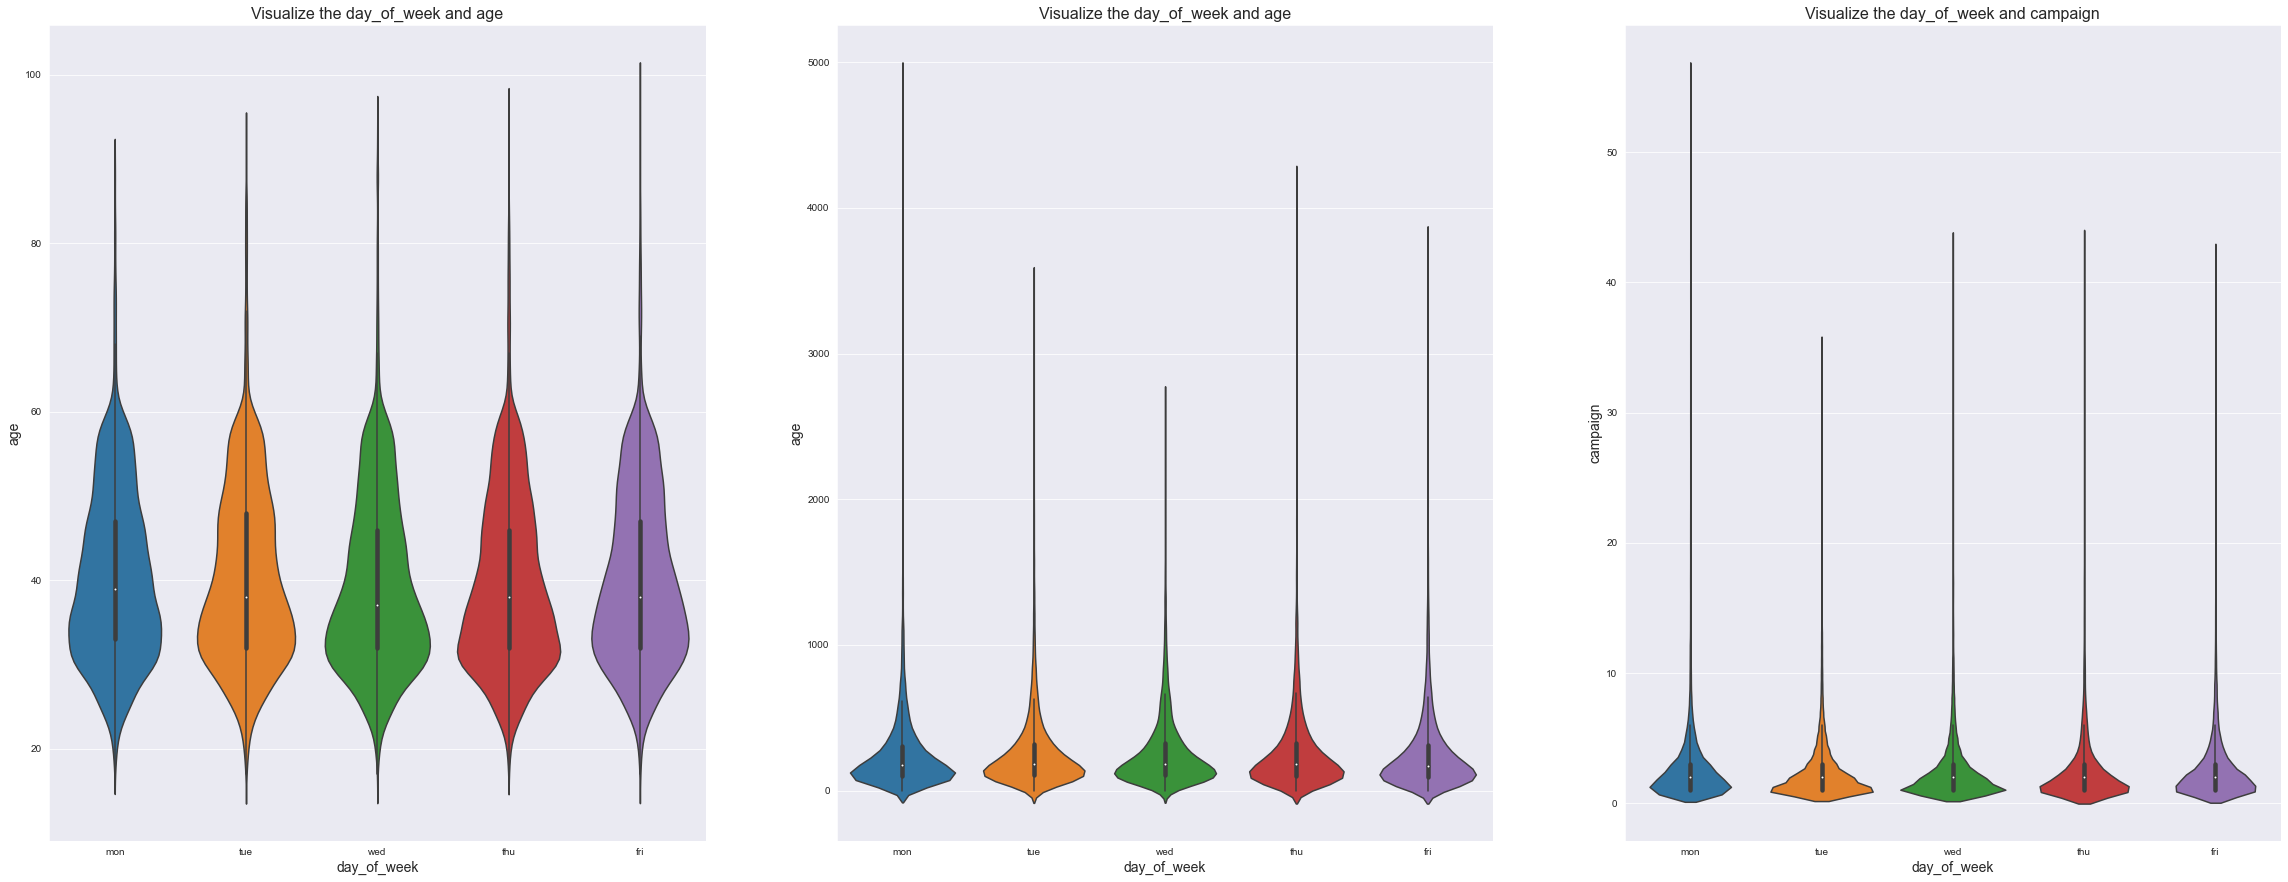

In [92]:
plt.figure(figsize=(40,15))

plt.subplot(1,3,1)
sns.violinplot(x='day_of_week',y='age',data=bank_df)
plt.title('Visualize the day_of_week and age',fontsize=16)
plt.xlabel('day_of_week',fontsize=14)
plt.ylabel('age',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='day_of_week',y='duration',data=bank_df)
plt.title('Visualize the day_of_week and age',fontsize=16)
plt.xlabel('day_of_week',fontsize=14)
plt.ylabel('age',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='day_of_week',y='campaign',data=bank_df)
plt.title('Visualize the day_of_week and campaign',fontsize=16)
plt.xlabel('day_of_week',fontsize=14)
plt.ylabel('campaign',fontsize=14)

plt.show()

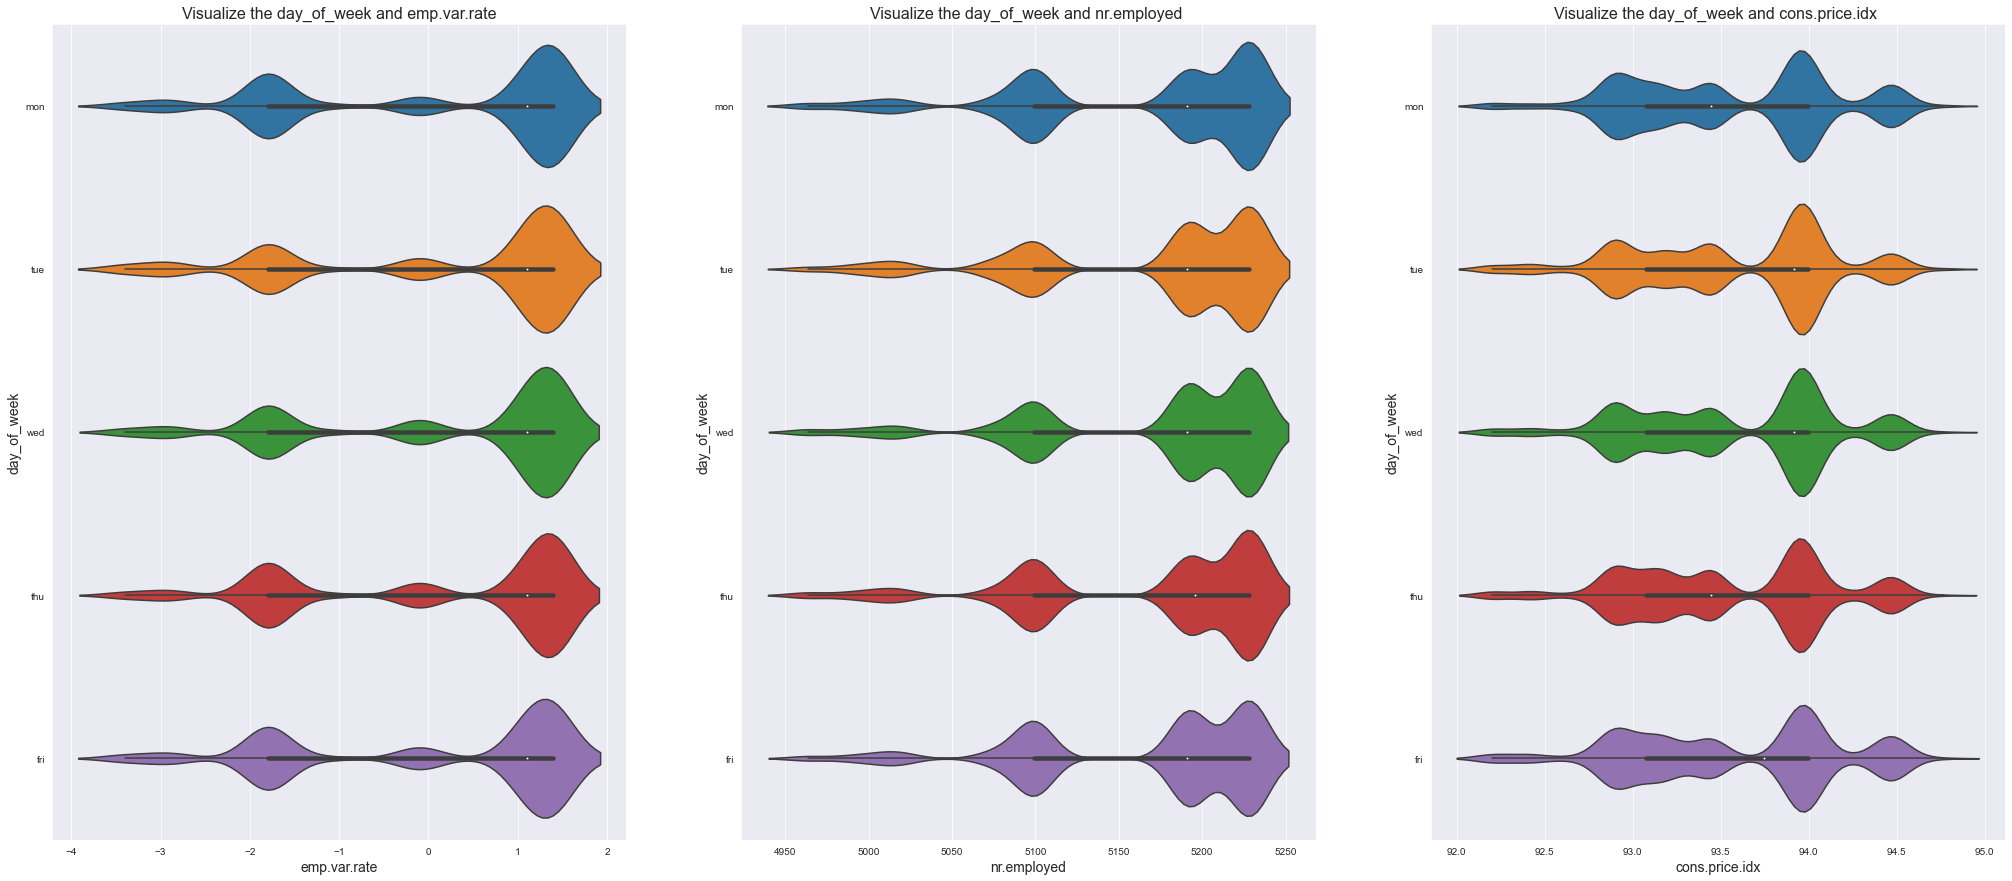

In [93]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(y='day_of_week',x='emp.var.rate',data=bank_df)
plt.title('Visualize the day_of_week and emp.var.rate',fontsize=16)
plt.ylabel('day_of_week',fontsize=14)
plt.xlabel('emp.var.rate',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(y='day_of_week',x='nr.employed',data=bank_df)
plt.title('Visualize the day_of_week and nr.employed ',fontsize=16)
plt.ylabel('day_of_week',fontsize=14)
plt.xlabel('nr.employed',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(y='day_of_week',x='cons.price.idx',data=bank_df)
plt.title('Visualize the day_of_week and cons.price.idx ',fontsize=16)
plt.ylabel('day_of_week',fontsize=14)
plt.xlabel('cons.price.idx',fontsize=14)
plt.show()

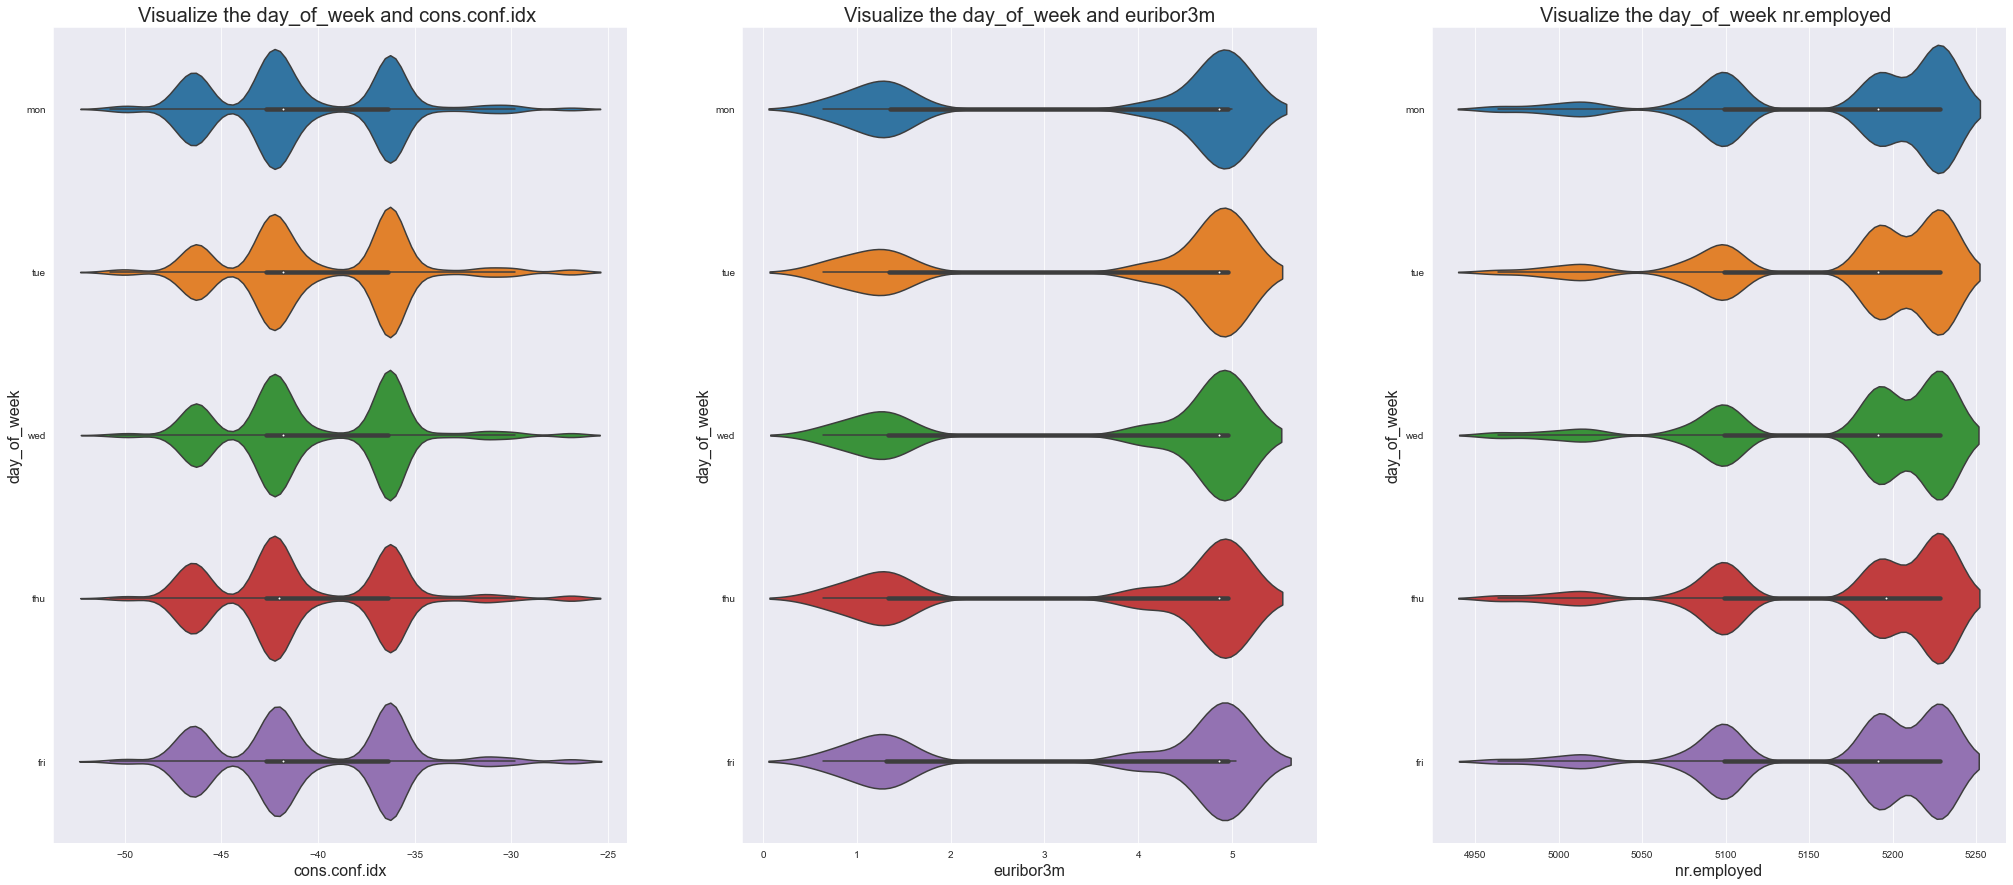

In [94]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(y='day_of_week',x='cons.conf.idx',data=bank_df)
plt.title('Visualize the day_of_week and cons.conf.idx ',fontsize=20)
plt.ylabel('day_of_week',fontsize=16)
plt.xlabel('cons.conf.idx',fontsize=16)

plt.subplot(1,3,2)
sns.violinplot(y='day_of_week',x='euribor3m',data=bank_df)
plt.title('Visualize the day_of_week and euribor3m',fontsize=20)
plt.ylabel('day_of_week',fontsize=16)
plt.xlabel('euribor3m',fontsize=16)

plt.subplot(1,3,3)
sns.violinplot(y='day_of_week',x='nr.employed',data=bank_df)
plt.title('Visualize the day_of_week nr.employed ',fontsize=20)
plt.ylabel('day_of_week',fontsize=16)
plt.xlabel('nr.employed',fontsize=16)
plt.show()

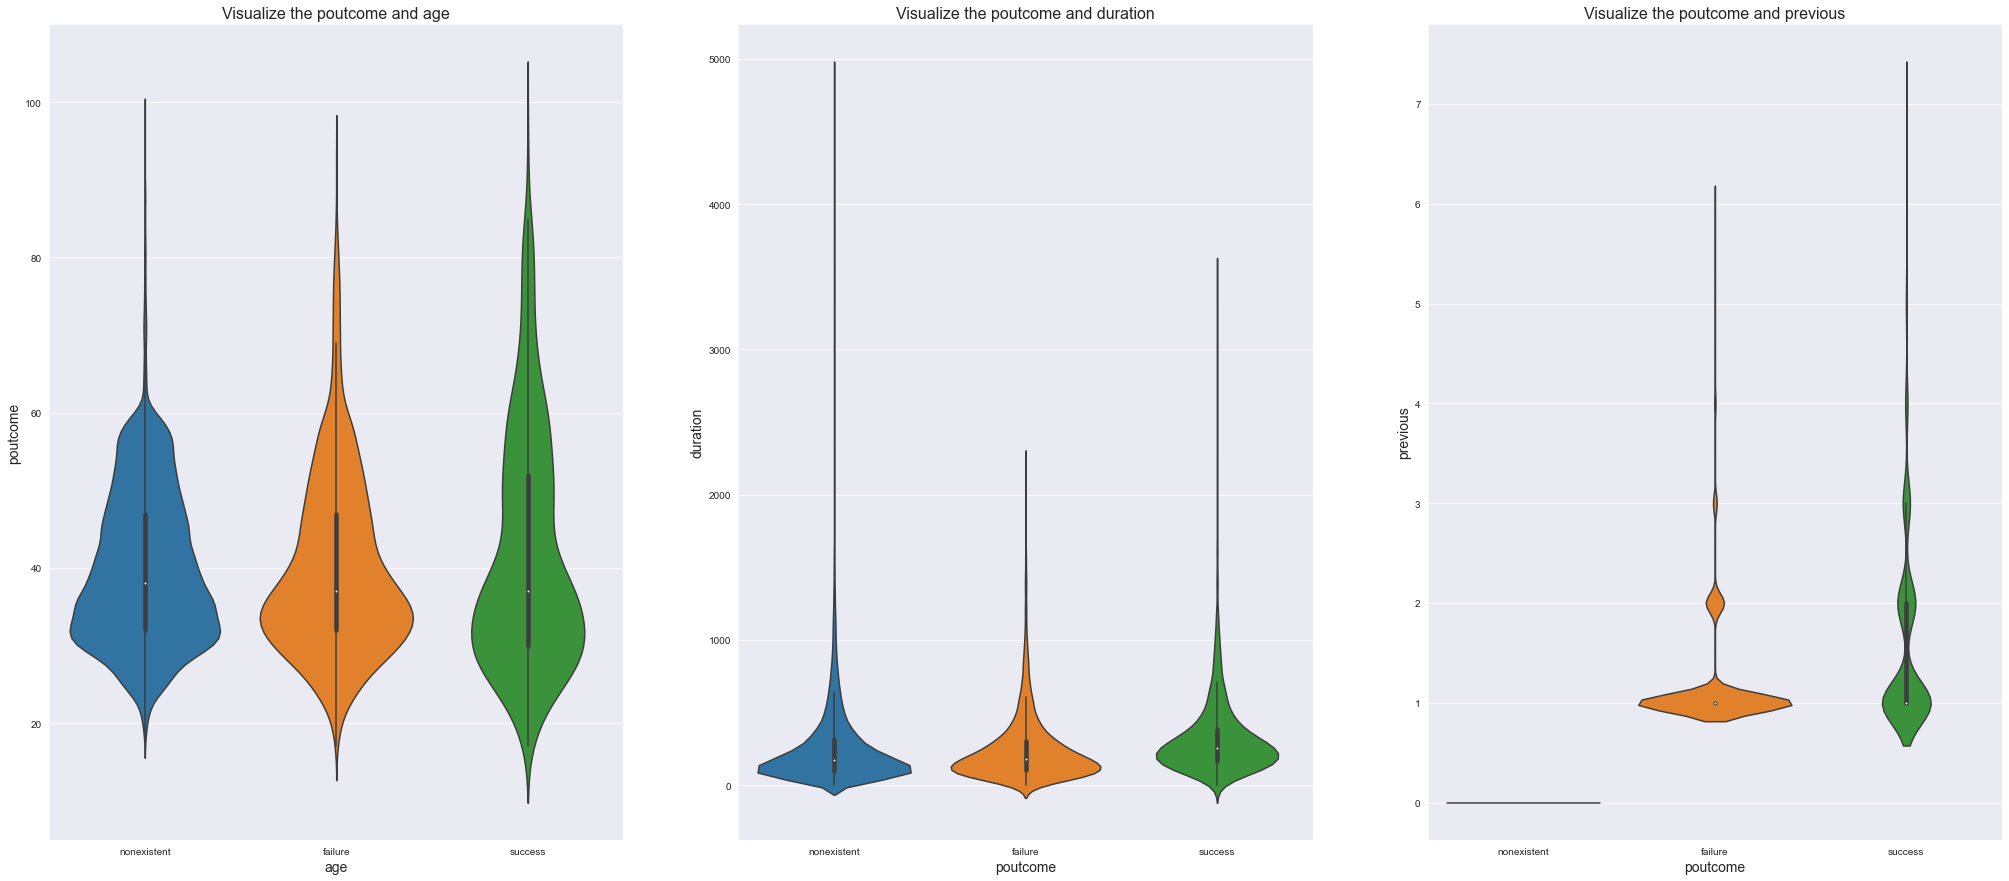

In [95]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='poutcome',y='age',data=bank_df)
plt.title('Visualize the poutcome and age',fontsize=16)
plt.ylabel('poutcome',fontsize=14)
plt.xlabel('age',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='poutcome',y='duration',data=bank_df)
plt.title('Visualize the poutcome and duration',fontsize=16)
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('duration',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='poutcome',y='previous',data=bank_df)
plt.title('Visualize the poutcome and previous',fontsize=16)
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('previous',fontsize=14)

plt.show()

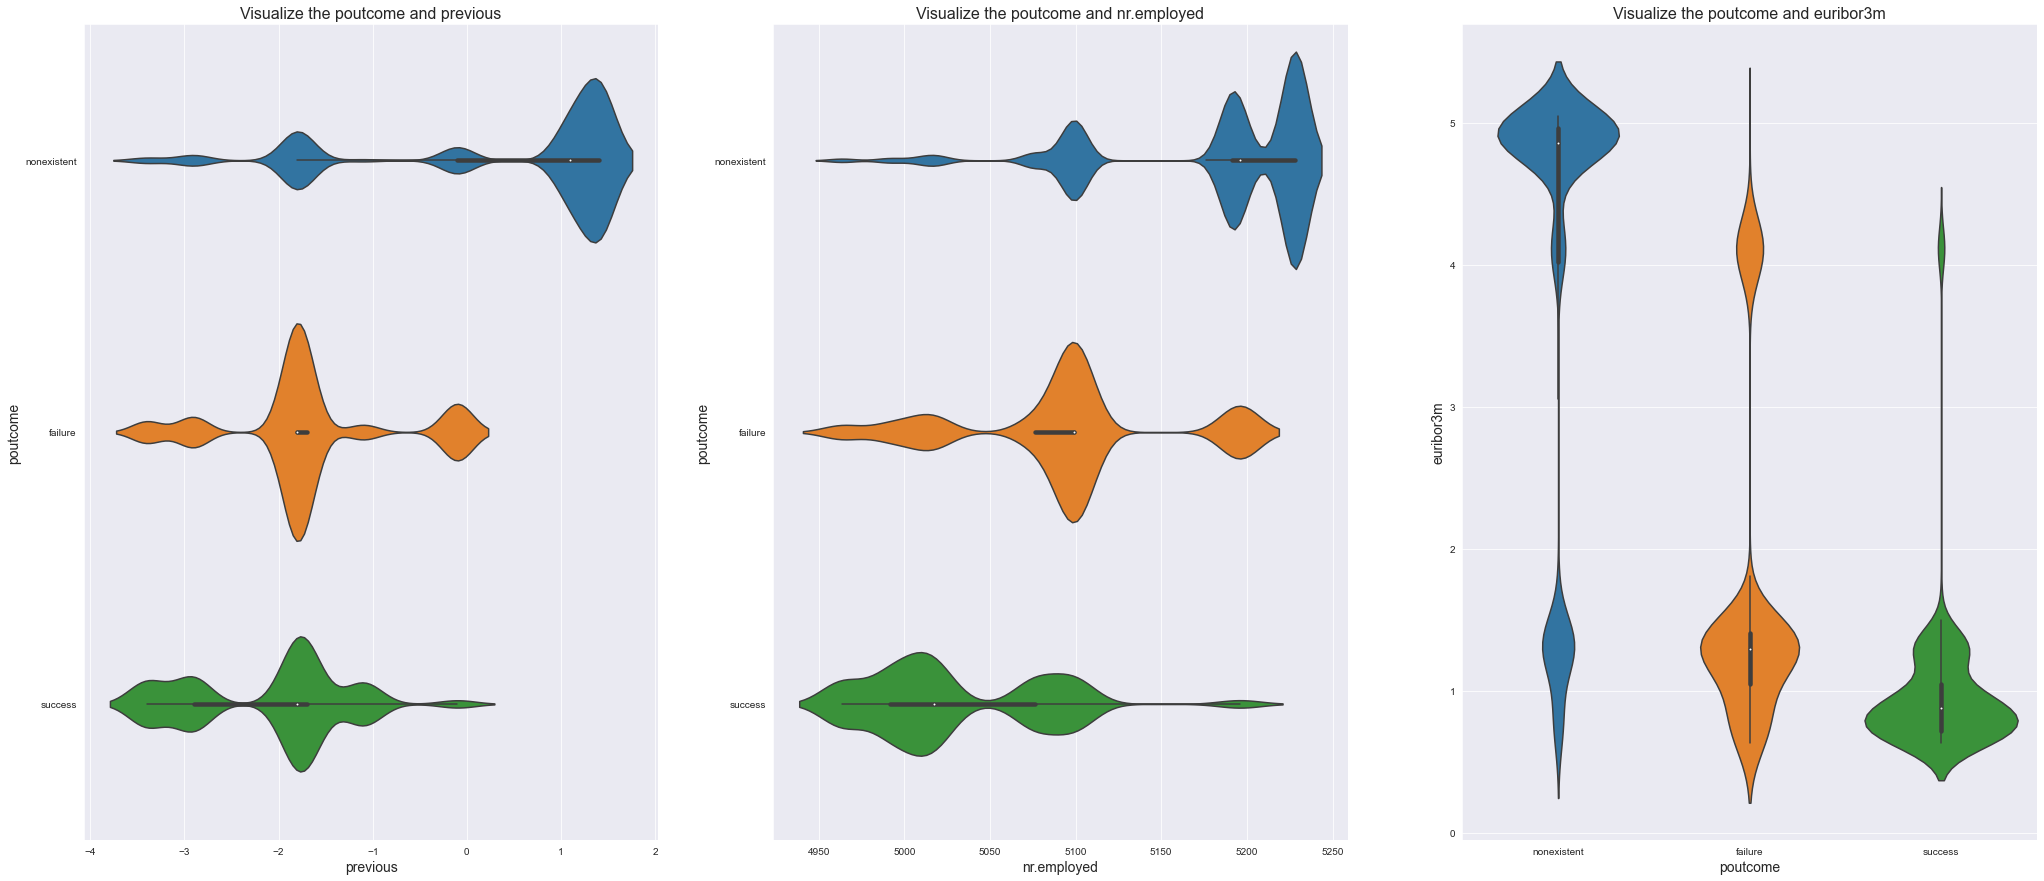

In [96]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(y='poutcome',x='emp.var.rate',data=bank_df)
plt.title('Visualize the poutcome and previous',fontsize=16)
plt.ylabel('poutcome',fontsize=14)
plt.xlabel('previous',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(y='poutcome',x='nr.employed',data=bank_df)
plt.title('Visualize the poutcome and nr.employed',fontsize=16)
plt.ylabel('poutcome',fontsize=14)
plt.xlabel('nr.employed',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='poutcome',y='euribor3m',data=bank_df)
plt.title('Visualize the poutcome and euribor3m',fontsize=16)
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('euribor3m',fontsize=14)

plt.show()

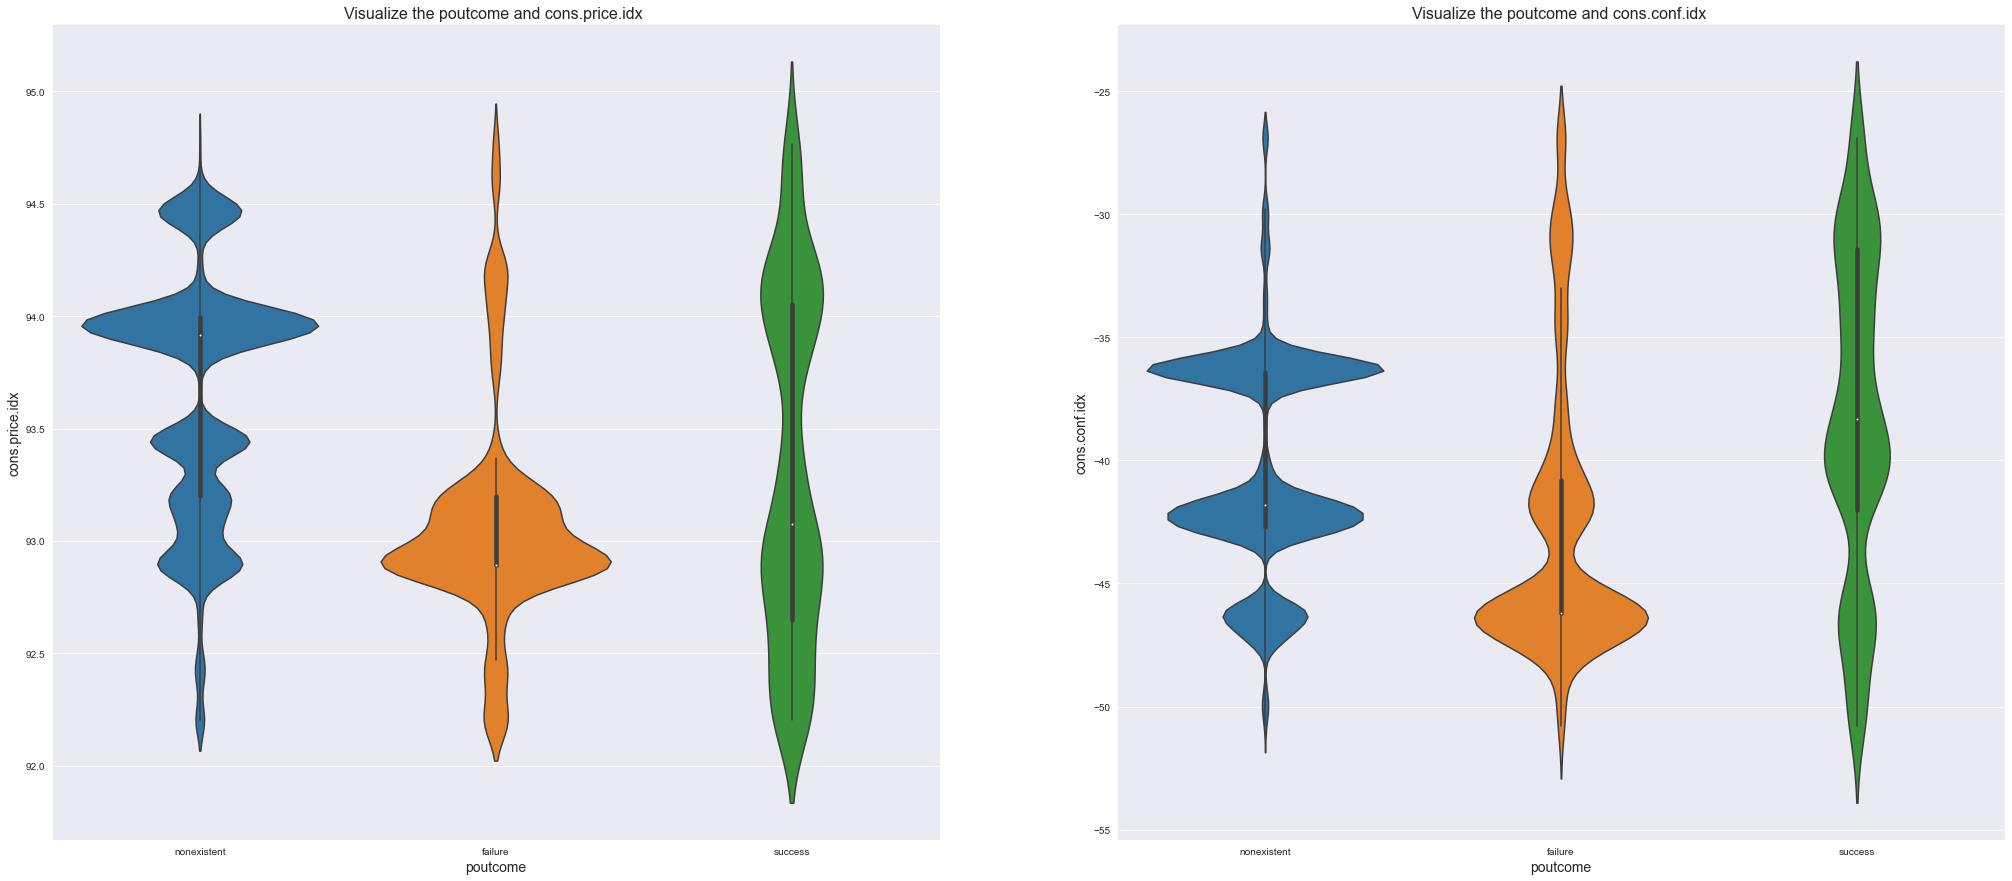

In [97]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.violinplot(x='poutcome',y='cons.price.idx',data=bank_df)
plt.title('Visualize the poutcome and cons.price.idx ',fontsize=16)
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('cons.price.idx',fontsize=14)

plt.subplot(1,2,2)
sns.violinplot(x='poutcome',y='cons.conf.idx',data=bank_df)
plt.title('Visualize the poutcome and cons.conf.idx ',fontsize=16)
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('cons.conf.idx',fontsize=14)
plt.show()

<AxesSubplot:xlabel='education'>

<Figure size 2520x1080 with 0 Axes>

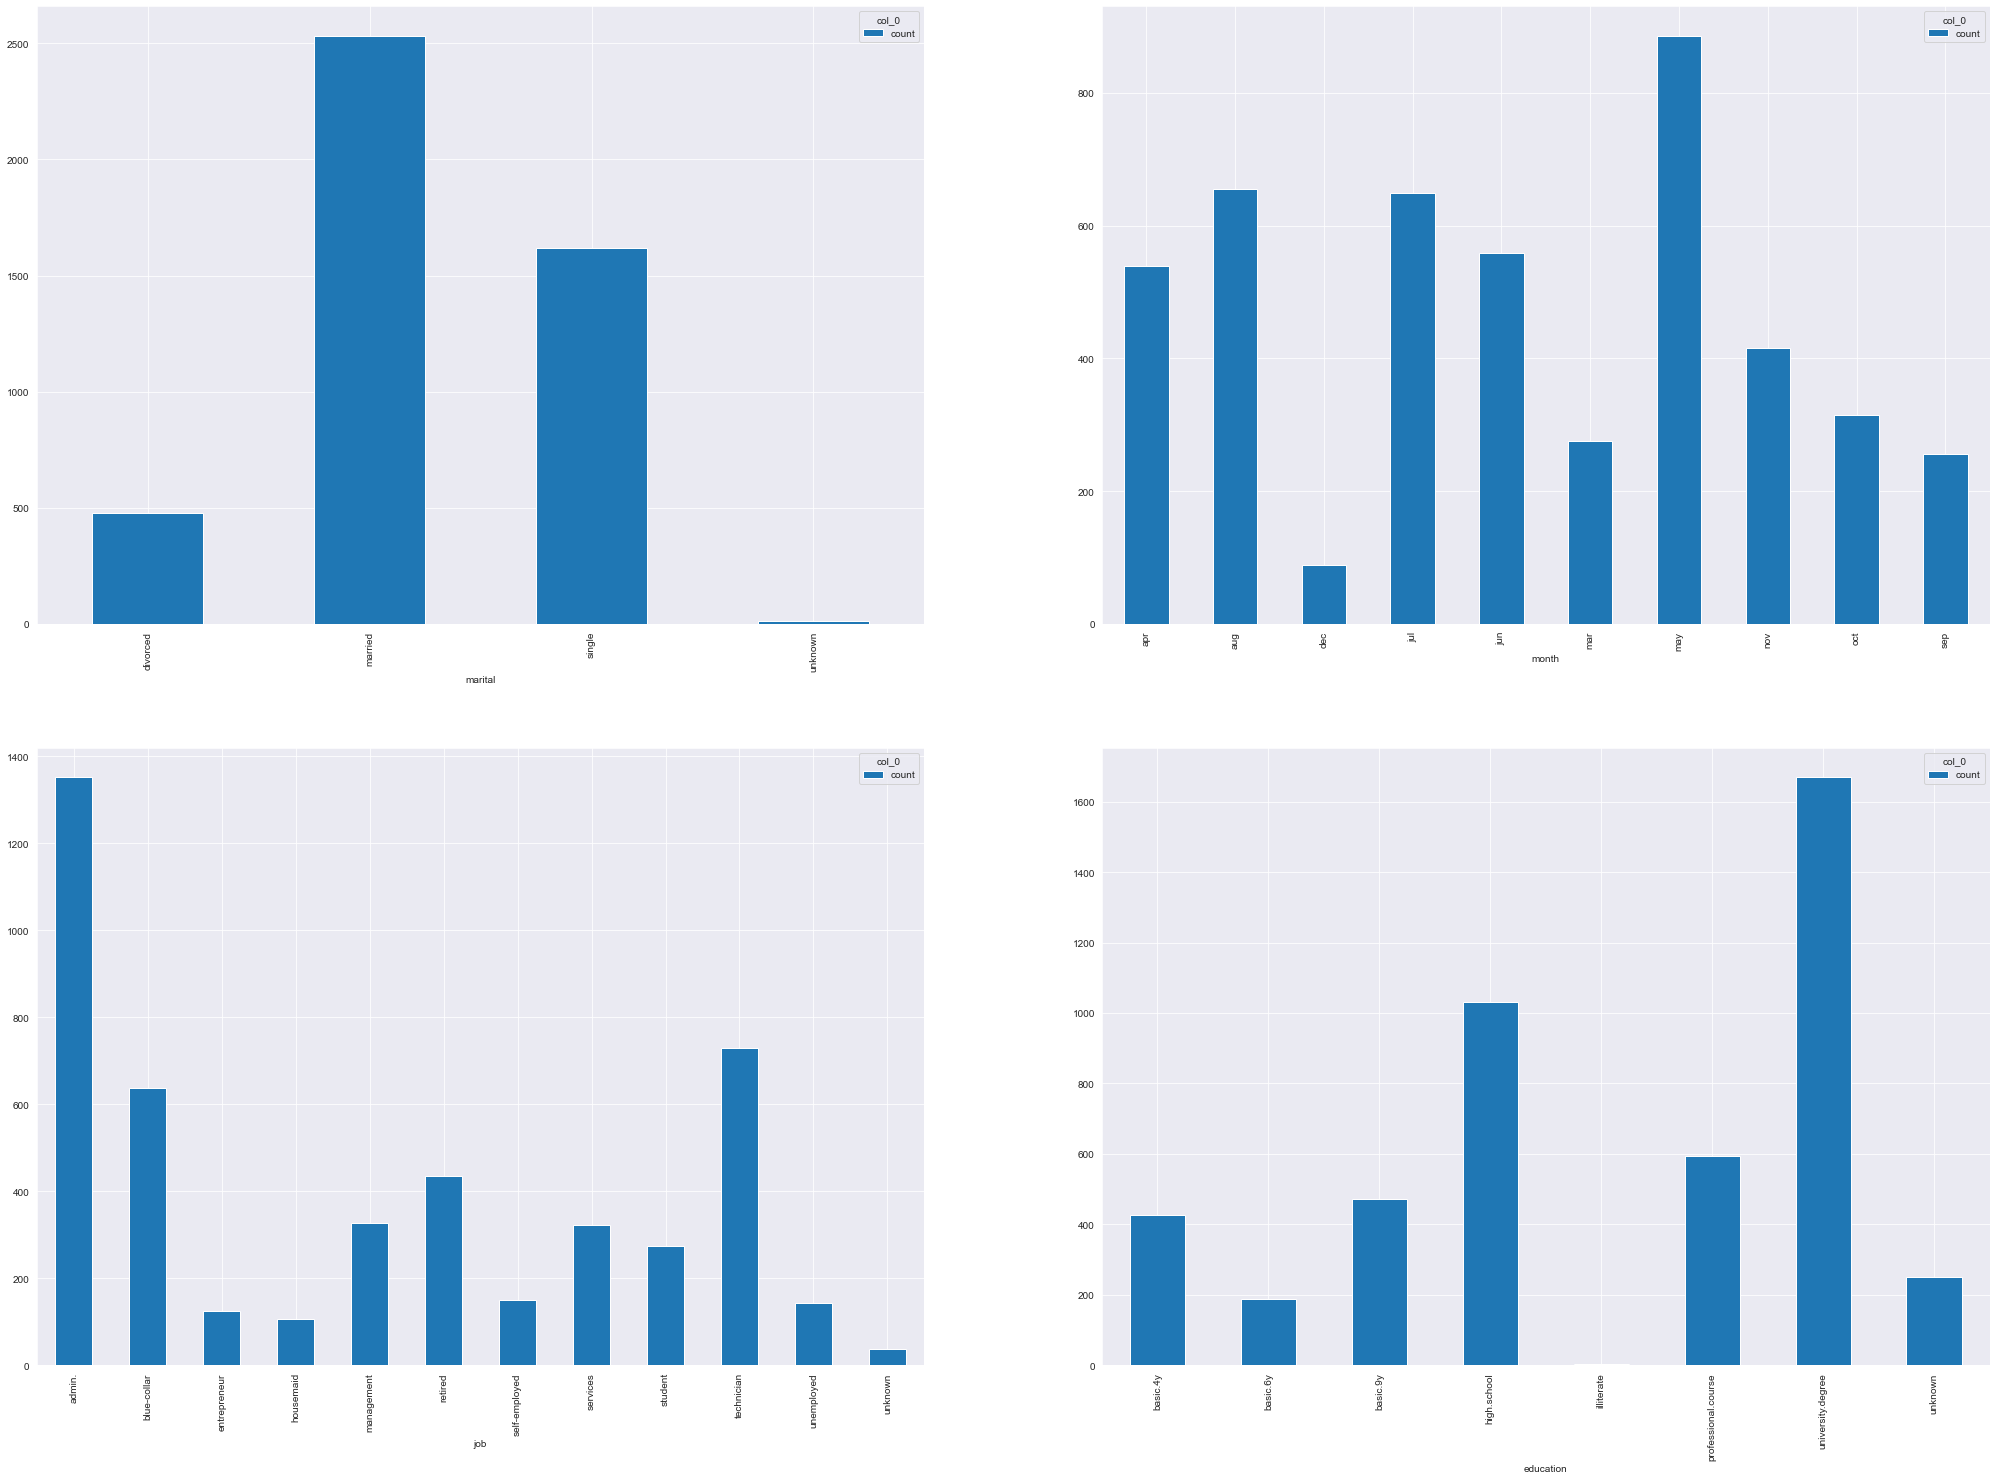

In [98]:
bank_yes = bank_df[bank_df['y']==1]
df1 = pd.crosstab(index = bank_yes["marital"],columns="count")    
df2 = pd.crosstab(index = bank_yes["month"],columns="count")  
df3= pd.crosstab(index = bank_yes["job"],columns="count") 
df4=pd.crosstab(index = bank_yes["education"],columns="count")
plt.figure(figsize=(35,15))
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(35,25))
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])

## Positive and Negative Target Analysis with attributes:

In [99]:
def barPerc(df,xVar,ax):
    
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

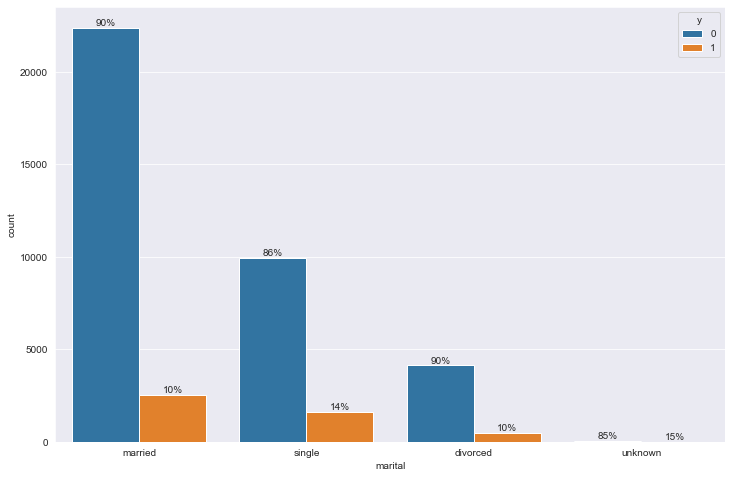

In [100]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="marital",hue='y',data=bank_df)
barPerc(bank_df,'marital',ax)

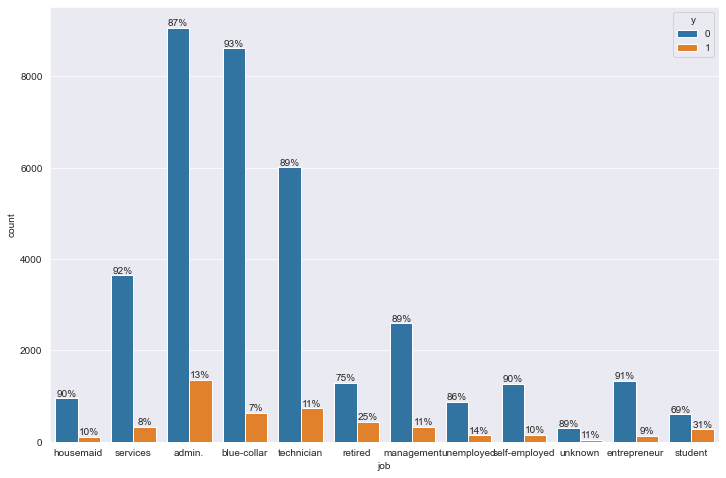

In [101]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="job",hue='y',data=bank_df)
barPerc(bank_df,'job',ax)

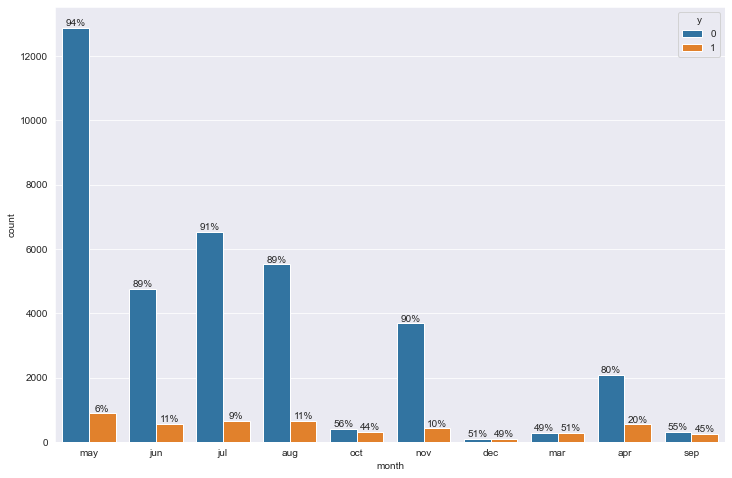

In [102]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="month",hue='y',data=bank_df)
barPerc(bank_df,'month',ax)

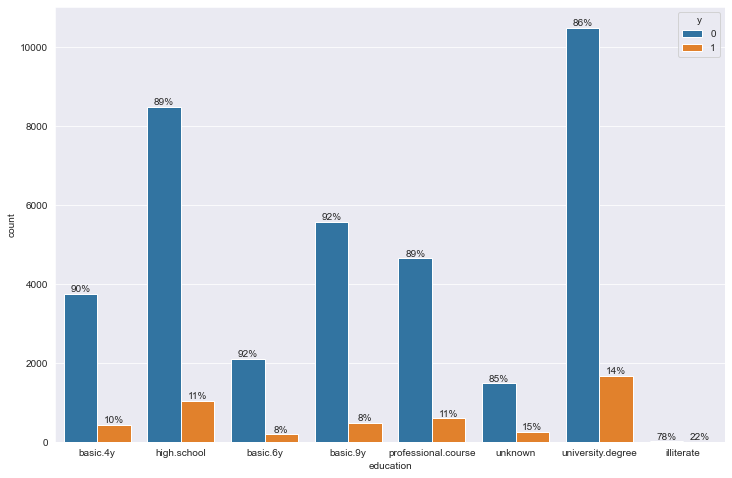

In [103]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="education",hue='y',data=bank_df)
barPerc(bank_df,'education',ax)

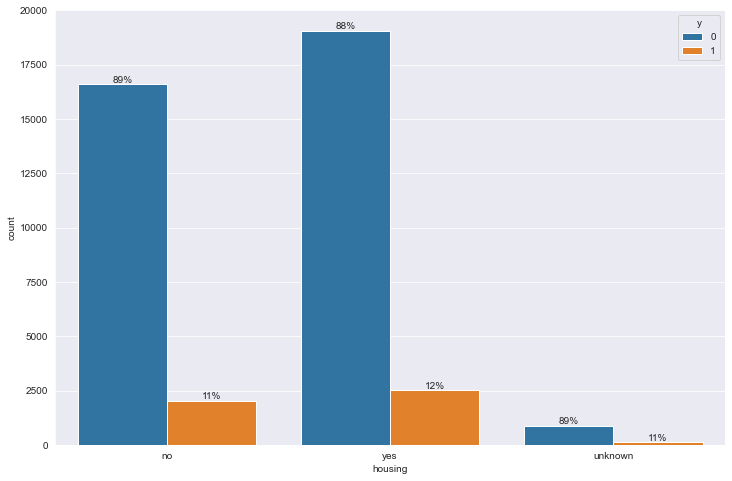

In [104]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="housing",hue='y',data=bank_df)
barPerc(bank_df,'housing',ax)

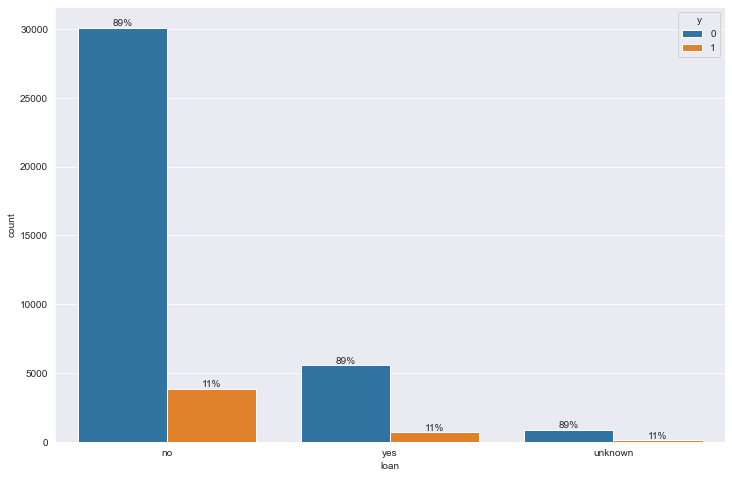

In [105]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="loan",hue='y',data=bank_df)
barPerc(bank_df,'loan',ax)

## Categorical-Categorical Analysis :

bibariate analysis of marriatal staus and job
-----------------------------------------------
marital        divorced  married  single  unknown
job                                              
admin.             1280     5253    3875       14
blue-collar         728     6687    1825       14
entrepreneur        179     1071     203        3
housemaid           161      777     119        3
management          331     2089     501        3
retired             348     1274      93        5
self-employed       133      904     379        5
services            532     2294    1137        6
student               9       41     824        1
technician          774     3670    2287       12
unemployed          124      634     251        5
unknown              13      234      74        9


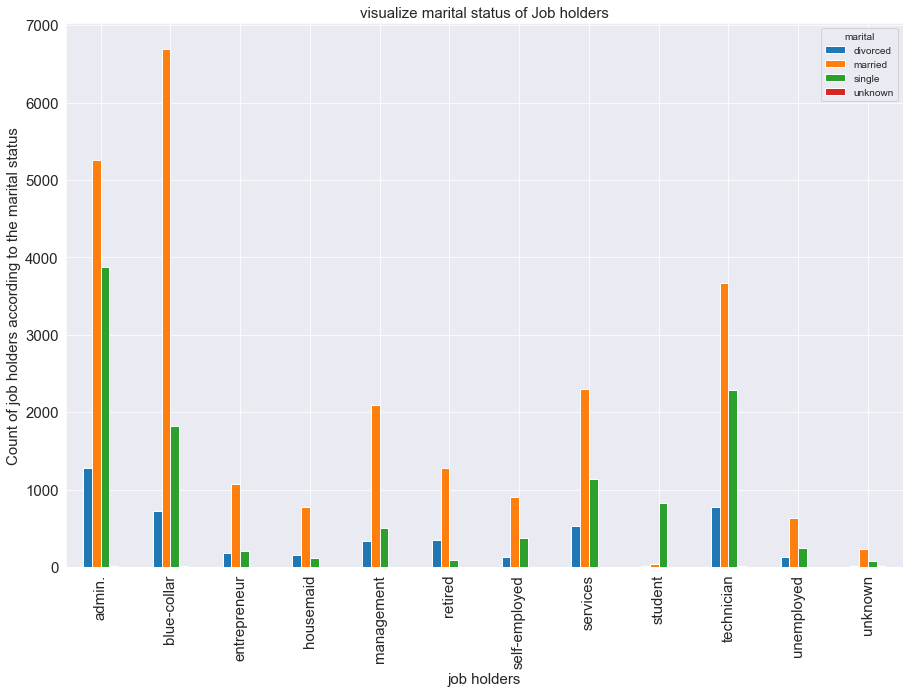

In [112]:
print('bibariate analysis of marriatal staus and job')
print('-----------------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['marital']))
pd.crosstab(bank_df['job'],bank_df['marital']).plot(kind='bar',fontsize=15)
plt.title('visualize marital status of Job holders',fontsize=15)
plt.xlabel('job holders',fontsize=15)
plt.ylabel('Count of job holders according to the marital status',fontsize=15)
plt.show()

bibariate analysis of default staus and job
-----------------------------------------------
default          no  unknown  yes
job                              
admin.         9129     1293    0
blue-collar    6088     3166    0
entrepreneur   1155      301    0
housemaid       741      319    0
management     2466      458    0
retired        1327      393    0
self-employed  1139      282    0
services       3053      916    0
student         771      104    0
technician     5765      976    2
unemployed      776      237    1
unknown         178      152    0


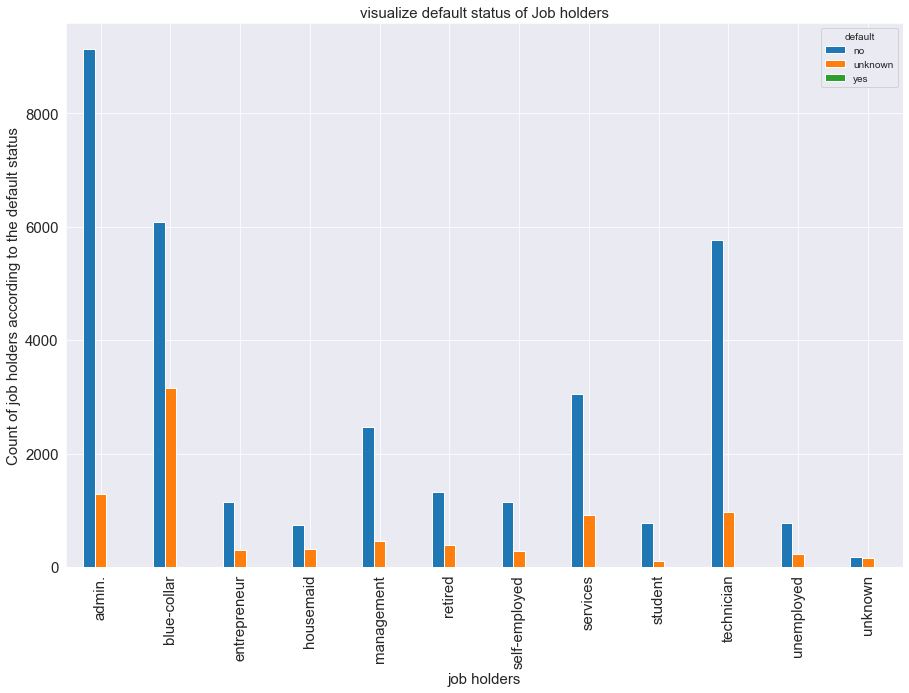

In [111]:
print('bibariate analysis of default staus and job')
print('-----------------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['default']))
pd.crosstab(bank_df['job'],bank_df['default']).plot(kind='bar',fontsize=15)
plt.title('visualize default status of Job holders',fontsize=15)
plt.xlabel('job holders',fontsize=15)
plt.ylabel('Count of job holders according to the default status',fontsize=15)
plt.show()

bibariate analysis of education and job
-----------------------------------------
education      basic.4y  basic.6y  basic.9y  high.school  illiterate  \
job                                                                    
admin.               77       151       499         3329           1   
blue-collar        2318      1426      3623          878           8   
entrepreneur        137        71       210          234           2   
housemaid           474        77        94          174           1   
management          100        85       166          298           0   
retired             597        75       145          276           3   
self-employed        93        25       220          118           3   
services            132       226       388         2682           0   
student              26        13        99          357           0   
technician           58        87       384          873           0   
unemployed          112        34       186          2

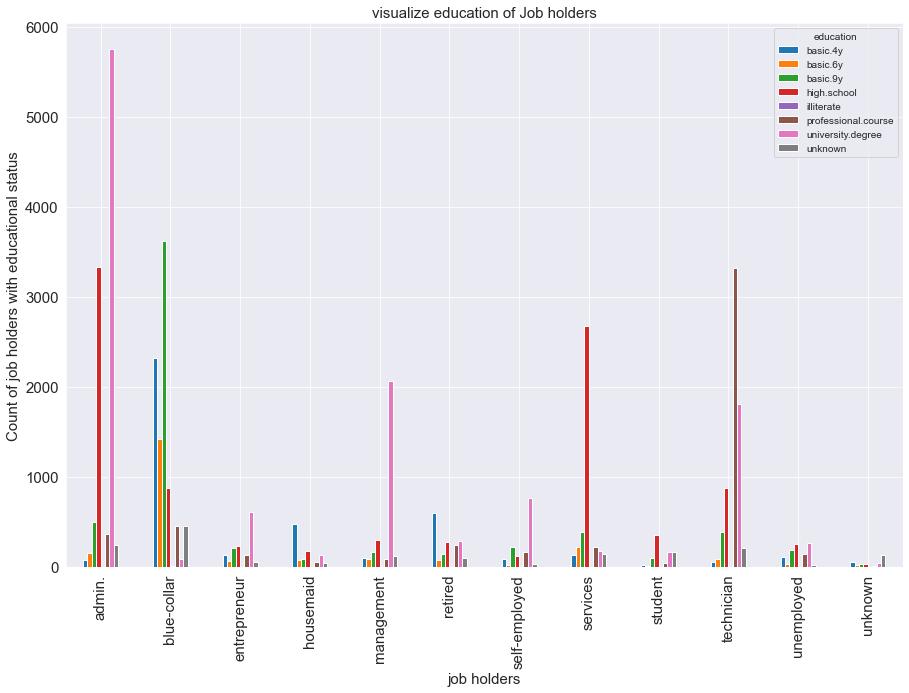

In [113]:
print('bibariate analysis of education and job')
print('-----------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['education']))
pd.crosstab(bank_df['job'],bank_df['education']).plot(kind='bar',fontsize=15)
plt.title('visualize education of Job holders',fontsize=15)
plt.xlabel('job holders',fontsize=15)
plt.ylabel('Count of job holders with educational status',fontsize=15)
plt.show()

bibariate analysis of housing and job
---------------------------------------
housing          no  unknown   yes
job                               
admin.         4636      227  5559
blue-collar    4304      240  4710
entrepreneur    641       36   779
housemaid       491       29   540
management     1363       71  1490
retired         784       44   892
self-employed   641       40   740
services       1818      101  2050
student         381       23   471
technician     2980      147  3616
unemployed      430       27   557
unknown         153        5   172


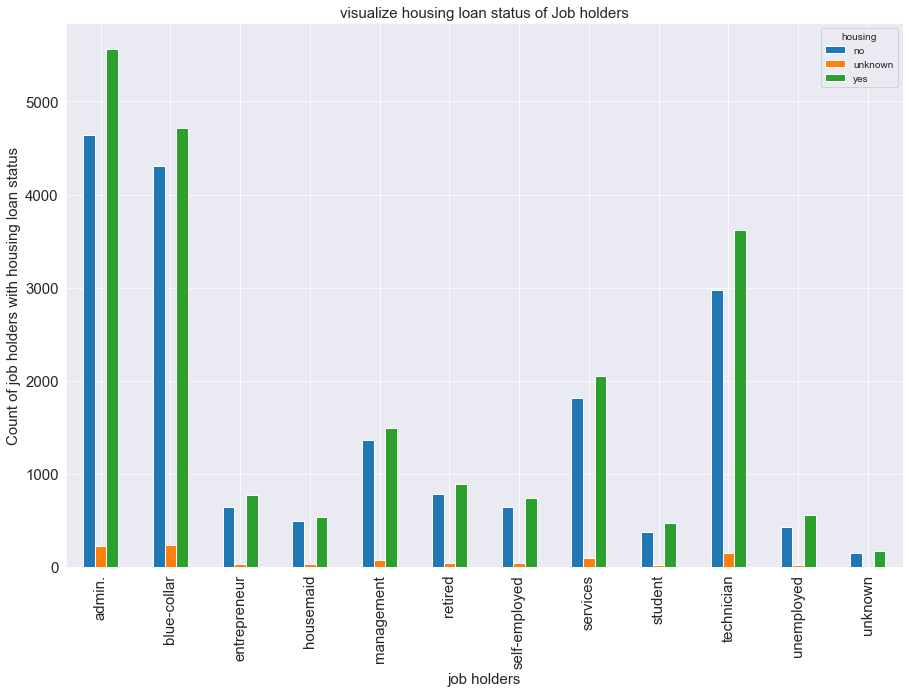

In [114]:
print('bibariate analysis of housing and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['housing']))
pd.crosstab(bank_df['job'],bank_df['housing']).plot(kind='bar',fontsize=15)
plt.title('visualize housing loan status of Job holders',fontsize=15)
plt.xlabel('job holders',fontsize=15)
plt.ylabel('Count of job holders with housing loan status',fontsize=15)
plt.show()

bibariate analysis of loan and job
---------------------------------------
loan             no  unknown   yes
job                               
admin.         8485      227  1710
blue-collar    7648      240  1366
entrepreneur   1214       36   206
housemaid       877       29   154
management     2414       71   439
retired        1436       44   240
self-employed  1186       40   195
services       3267      101   601
student         710       23   142
technician     5607      147   989
unemployed      838       27   149
unknown         268        5    57


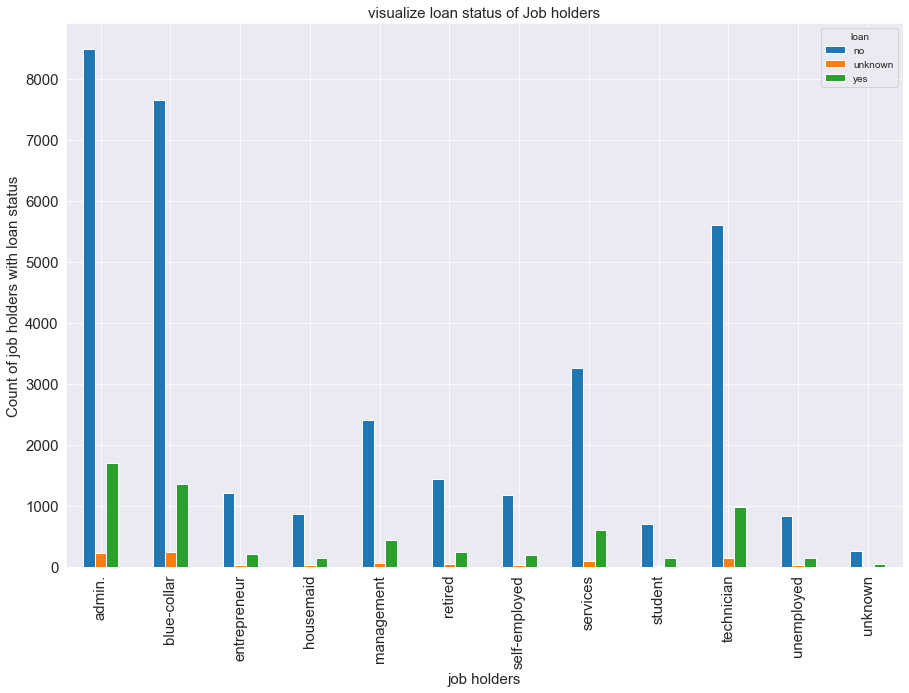

In [115]:
print('bibariate analysis of loan and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['loan']))
pd.crosstab(bank_df['job'],bank_df['loan']).plot(kind='bar',fontsize=15)
plt.title('visualize loan status of Job holders',fontsize=15)
plt.xlabel('job holders',fontsize=15)
plt.ylabel('Count of job holders with loan status',fontsize=15)
plt.show()

bibariate analysis of contact and job
---------------------------------------
contact        cellular  telephone
job                               
admin.             7126       3296
blue-collar        5090       4164
entrepreneur        855        601
housemaid           640        420
management         1902       1022
retired            1231        489
self-employed       893        528
services           2311       1658
student             671        204
technician         4637       2106
unemployed          620        394
unknown             168        162


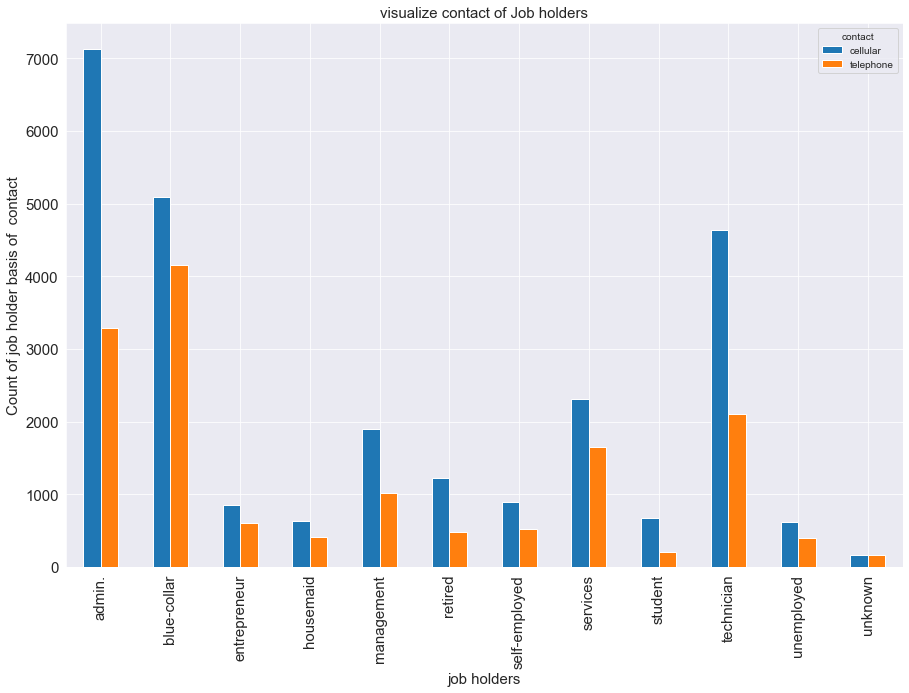

In [116]:
print('bibariate analysis of contact and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['contact']))
pd.crosstab(bank_df['job'],bank_df['contact']).plot(kind='bar',fontsize=15)
plt.title('visualize contact of Job holders',fontsize=15)
plt.xlabel('job holders',fontsize=15)
plt.ylabel('Count of job holder basis of  contact',fontsize=15)
plt.show()

bibariate analysis of month and job
---------------------------------------
month          apr   aug  dec   jul   jun  mar   may   nov  oct  sep
job                                                                 
admin.         644  2039   50  1815  1238  169  3019  1085  197  166
blue-collar    565   582   12  1789  1385   50  4199   602   51   19
entrepreneur   109    74    1   273   217    2   484   269   15   12
housemaid       47   208   10   239   136    6   296    87   19   12
management     195   357   12   399   352   42   909   561   51   46
retired        160   342   33   271   173   64   329   136  126   86
self-employed   97   212    6   220   204   25   418   198   21   20
services       281   280    2   790   542   25  1666   321   33   29
student        104   116   20   105   101   41   232    54   53   49
technician     368  1787   24  1056   738  102  1833   627  116   92
unemployed      53   121   10   165   170   18   264   154   28   31
unknown          9    60   

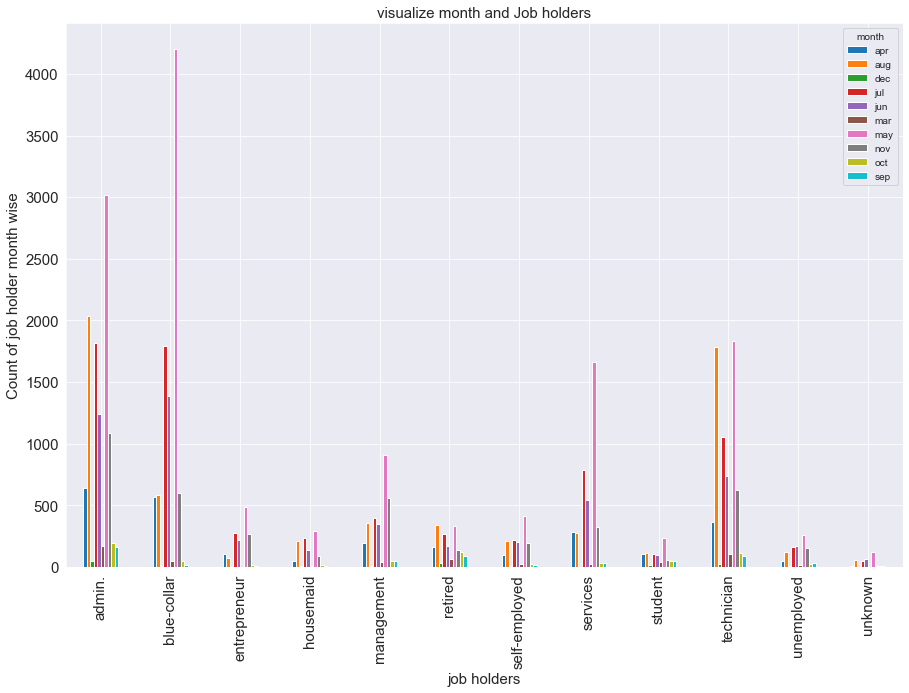

In [117]:
print('bibariate analysis of month and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['month']))
pd.crosstab(bank_df['job'],bank_df['month']).plot(kind='bar',fontsize=15)
plt.title('visualize month and Job holders',fontsize=15)
plt.xlabel('job holders',fontsize=15)
plt.ylabel('Count of job holder month wise',fontsize=15)
plt.show()

bibariate analysis of day_of_week and job
---------------------------------------
day_of_week     fri   mon   thu   tue   wed
job                                        
admin.         2050  2149  2153  2034  2036
blue-collar    1781  1845  1888  1771  1969
entrepreneur    271   322   322   264   277
housemaid       182   228   198   238   214
management      531   640   587   581   585
retired         333   348   317   377   345
self-employed   279   310   336   255   241
services        750   835   830   793   761
student         162   177   197   172   167
technician     1251  1386  1494  1330  1282
unemployed      200   196   230   201   187
unknown          37    78    71    74    70


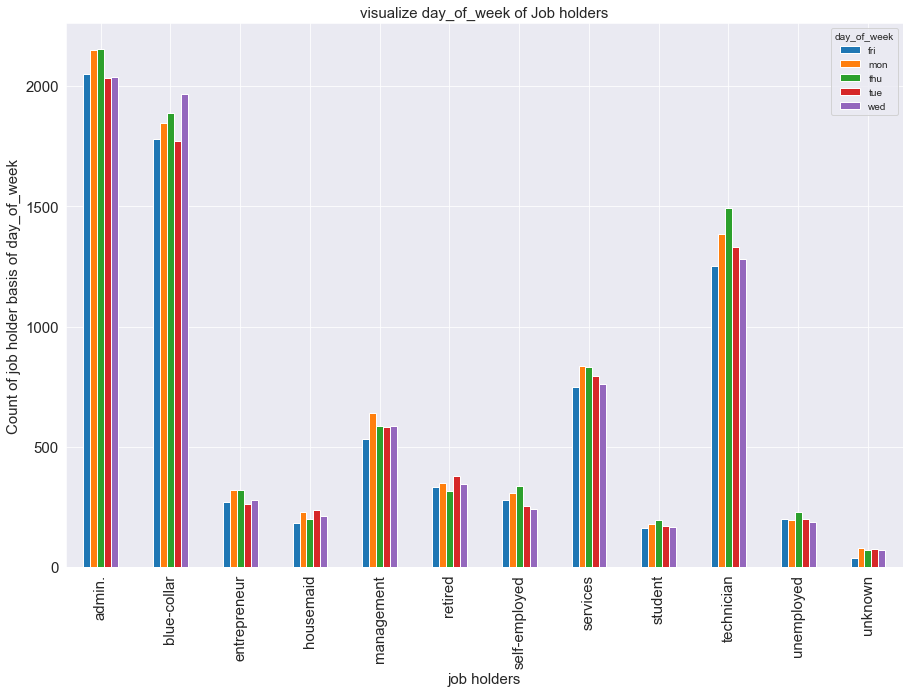

In [118]:
print('bibariate analysis of day_of_week and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['day_of_week']))
pd.crosstab(bank_df['job'],bank_df['day_of_week']).plot(kind='bar',fontsize=15)
plt.title('visualize day_of_week of Job holders',fontsize=15)
plt.xlabel('job holders',fontsize=15)
plt.ylabel('Count of job holder basis of day_of_week',fontsize=15)
plt.show()

bibariate analysis of poutcome and job
---------------------------------------
poutcome       failure  nonexistent  success
job                                         
admin.            1091         8903      428
blue-collar        886         8249      119
entrepreneur       154         1277       25
housemaid           74          948       38
management         331         2498       95
retired            230         1332      158
self-employed      145         1246       30
services           448         3451       70
student            163          594      118
technician         618         5914      211
unemployed          94          858       62
unknown             18          293       19


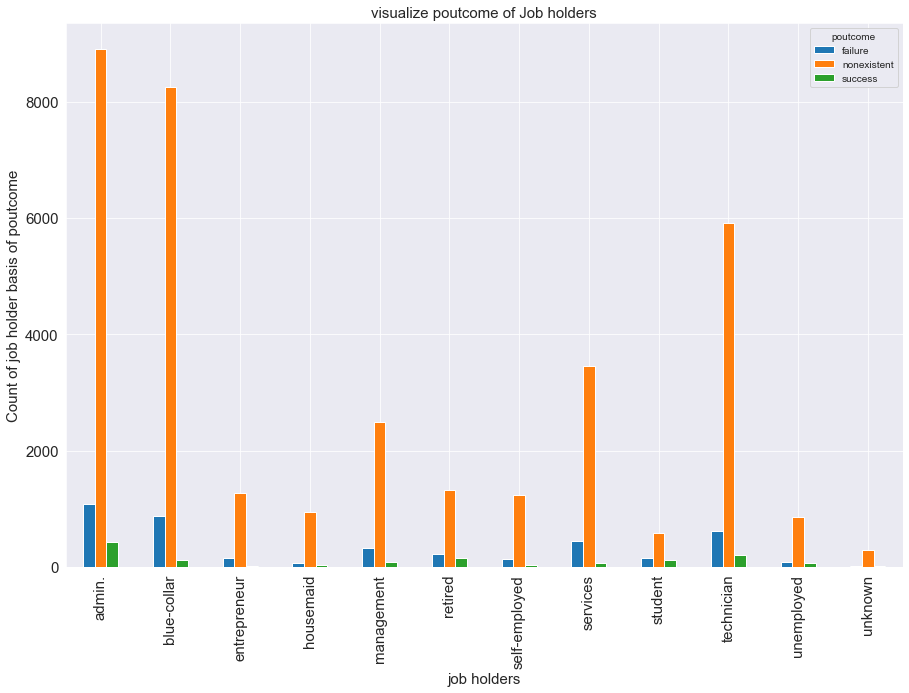

In [119]:
print('bibariate analysis of poutcome and job')
print('---------------------------------------')
print(pd.crosstab(bank_df['job'],bank_df['poutcome']))
pd.crosstab(bank_df['job'],bank_df['poutcome']).plot(kind='bar',fontsize=15)
plt.title('visualize poutcome of Job holders',fontsize=15)
plt.xlabel('job holders',fontsize=15)
plt.ylabel('Count of job holder basis of poutcome',fontsize=15)
plt.show()

bibariate analysis of mariatl and education
---------------------------------------
marital              divorced  married  single  unknown
education                                              
basic.4y                  489     3228     453        6
basic.6y                  182     1767     337        6
basic.9y                  565     4156    1316        8
high.school              1193     5158    3150       14
illiterate                  2       15       1        0
professional.course       657     3156    1424        6
university.degree        1337     6394    4406       31
unknown                   187     1054     481        9


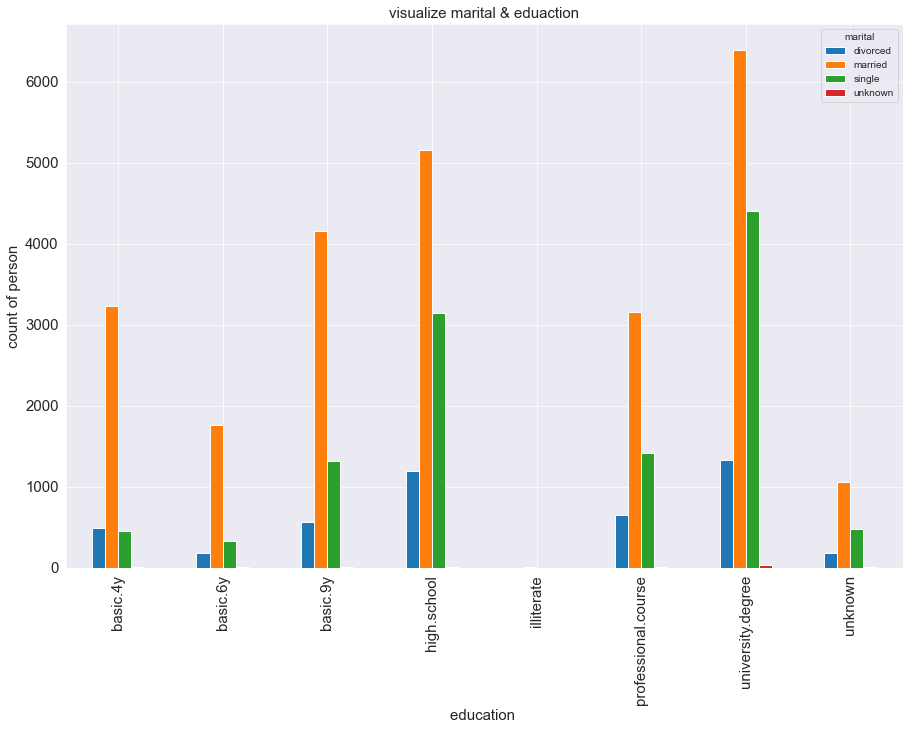

In [120]:
print('bibariate analysis of mariatl and education')
print('---------------------------------------')
print(pd.crosstab(bank_df['education'],bank_df['marital']))
pd.crosstab(bank_df['education'],bank_df['marital']).plot(kind='bar',fontsize=15)
plt.title('visualize marital & eduaction',fontsize=15)
plt.xlabel('education ',fontsize=15)
plt.ylabel('count of person',fontsize=15)
plt.show()

bibariate analysis of mariatl and default
---------------------------------------
marital  divorced  married  single  unknown
default                                    
no           3781    18655   10083       69
unknown       831     6270    1485       11
yes             0        3       0        0


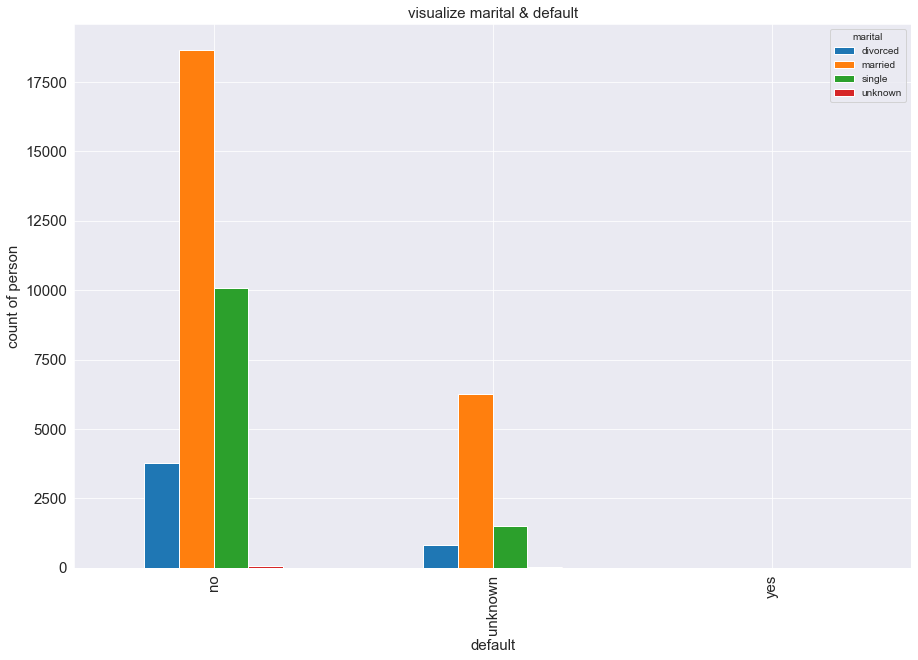

In [121]:
print('bibariate analysis of mariatl and default')
print('---------------------------------------')
print(pd.crosstab(bank_df['default'],bank_df['marital']))
pd.crosstab(bank_df['default'],bank_df['marital']).plot(kind='bar',fontsize=15)
plt.title('visualize marital & default',fontsize=15)
plt.xlabel('default',fontsize=15)
plt.ylabel('count of person',fontsize=15)
plt.show()

bibariate analysis of marital and housing
---------------------------------------
marital  divorced  married  single  unknown
housing                                    
no           2092    11389    5097       44
unknown       121      588     280        1
yes          2399    12951    6191       35


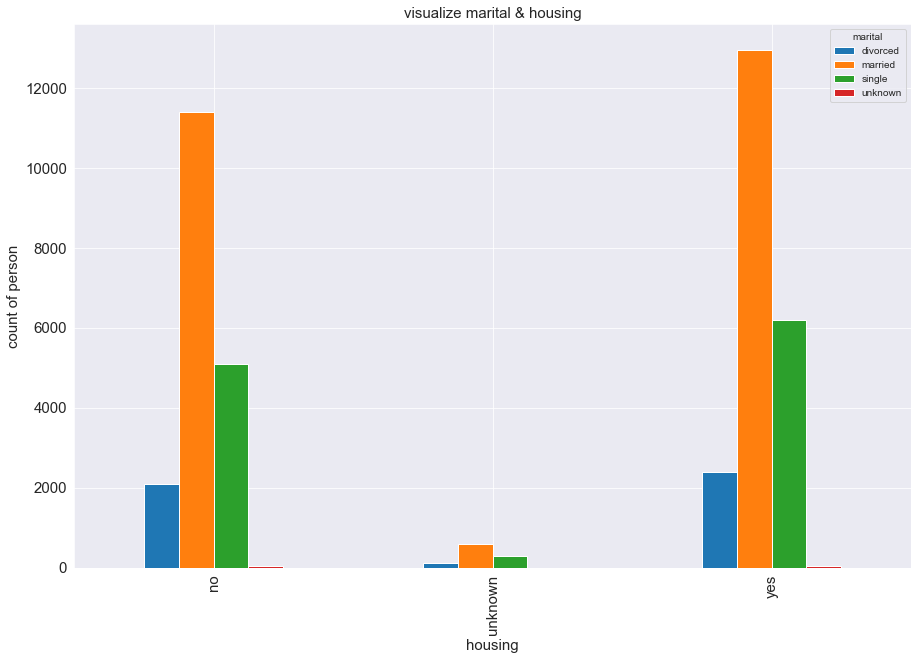

In [122]:
print('bibariate analysis of marital and housing')
print('---------------------------------------')
print(pd.crosstab(bank_df['housing'],bank_df['marital']))
pd.crosstab(bank_df['housing'],bank_df['marital']).plot(kind='bar',fontsize=15)
plt.title('visualize marital & housing',fontsize=15)
plt.xlabel('housing',fontsize=15)
plt.ylabel('count of person',fontsize=15)
plt.show()

bibariate analysis of marital and loan
---------------------------------------
marital  divorced  married  single  unknown
loan                                       
no           3816    20567    9500       67
unknown       121      588     280        1
yes           675     3773    1788       12


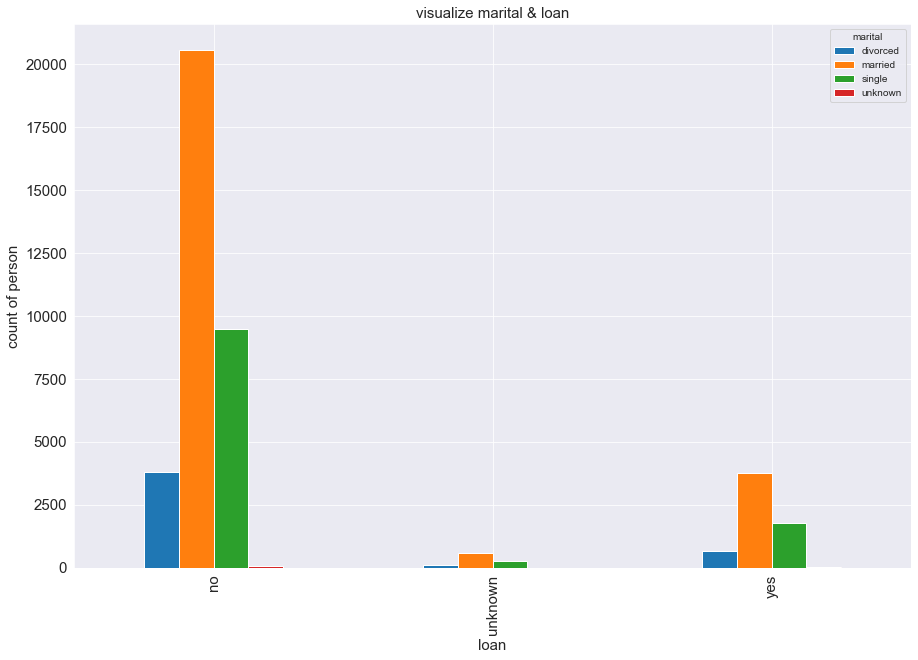

In [123]:
print('bibariate analysis of marital and loan')
print('---------------------------------------')
print(pd.crosstab(bank_df['loan'],bank_df['marital']))
pd.crosstab(bank_df['loan'],bank_df['marital']).plot(kind='bar',fontsize=15)
plt.title('visualize marital & loan',fontsize=15)
plt.xlabel('loan',fontsize=15)
plt.ylabel('count of person',fontsize=15)
plt.show()

bibariate analysis of marital and contact
---------------------------------------
marital    divorced  married  single  unknown
contact                                      
cellular       2908    15206    7977       53
telephone      1704     9722    3591       27


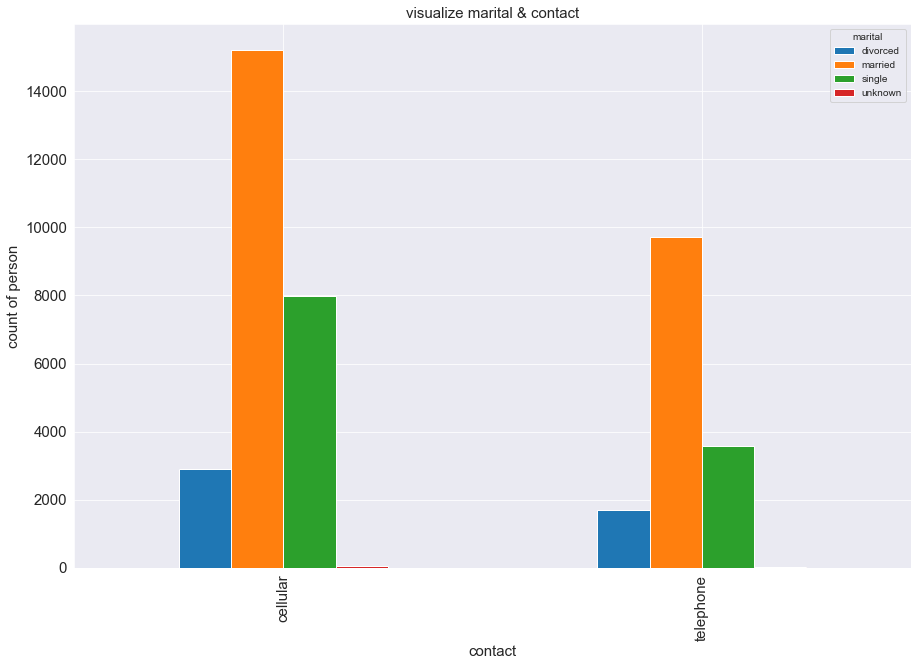

In [124]:
print('bibariate analysis of marital and contact')
print('---------------------------------------')
print(pd.crosstab(bank_df['contact'],bank_df['marital']))
pd.crosstab(bank_df['contact'],bank_df['marital']).plot(kind='bar',fontsize=15)
plt.title('visualize marital & contact',fontsize=15)
plt.xlabel('contact',fontsize=15)
plt.ylabel('count of person',fontsize=15)
plt.show()

bibariate analysis of marital and month
---------------------------------------
marital  divorced  married  single  unknown
month                                      
apr           311     1512     806        3
aug           571     4012    1585       10
dec            19      114      49        0
jul           926     3948    2291        9
jun           570     3350    1386       12
mar            60      234     249        3
may          1488     8514    3734       33
nov           550     2514    1030        7
oct            67      399     249        3
sep            50      331     189        0


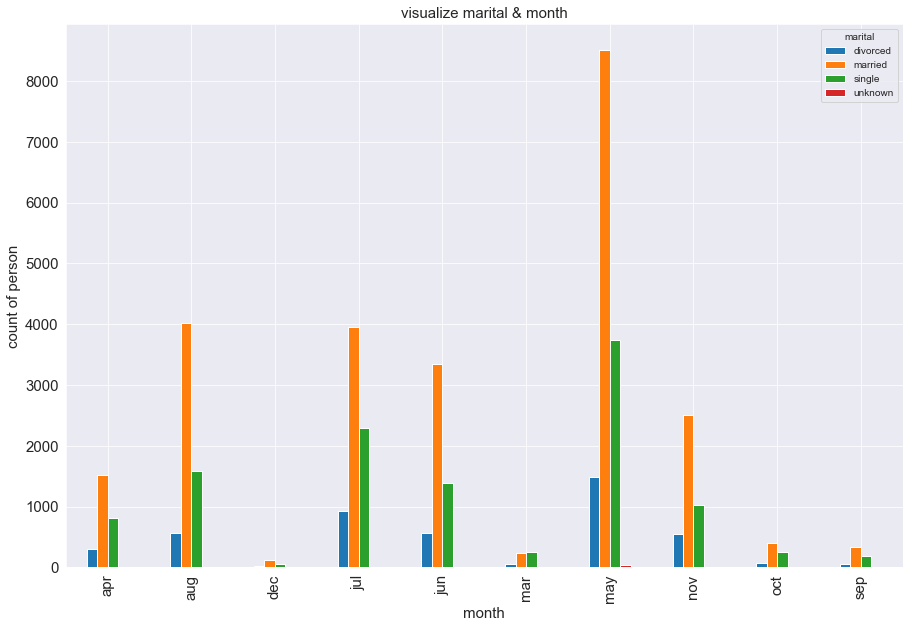

In [125]:
print('bibariate analysis of marital and month')
print('---------------------------------------')
print(pd.crosstab(bank_df['month'],bank_df['marital']))
pd.crosstab(bank_df['month'],bank_df['marital']).plot(kind='bar',fontsize=15)
plt.title('visualize marital & month',fontsize=15)
plt.xlabel('month',fontsize=15)
plt.ylabel('count of person',fontsize=15)
plt.show()

bibariate analysis of education and default
-------------------------------------------
default                 no  unknown  yes
education                               
basic.4y              2477     1699    0
basic.6y              1441      851    0
basic.9y              4418     1627    0
high.school           7904     1610    1
illiterate              11        7    0
professional.course   4436      805    2
university.degree    10718     1450    0
unknown               1183      548    0


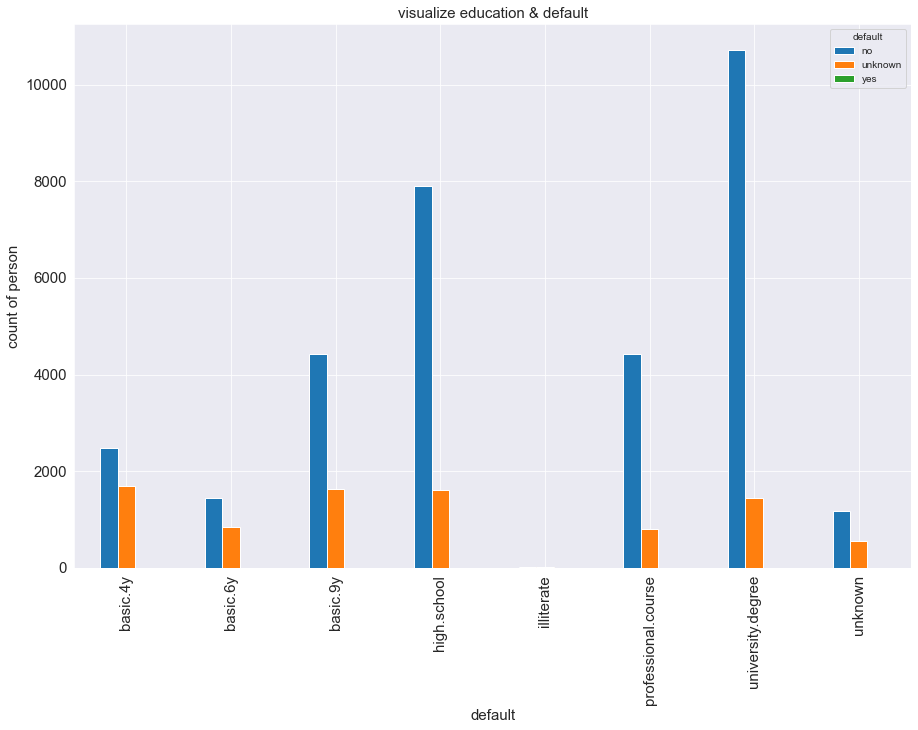

In [126]:
print('bibariate analysis of education and default')
print('-------------------------------------------')
print(pd.crosstab(bank_df['education'],bank_df['default']))
pd.crosstab(bank_df['education'],bank_df['default']).plot(kind='bar',fontsize=15)
plt.title('visualize education & default',fontsize=15)
plt.xlabel('default',fontsize=15)
plt.ylabel('count of person',fontsize=15)
plt.show()

bibariate analysis of education and housing
-------------------------------------------
housing                no  unknown   yes
education                               
basic.4y             1955      117  2104
basic.6y             1070       60  1162
basic.9y             2743      151  3151
high.school          4363      220  4932
illiterate              8        0    10
professional.course  2280      125  2838
university.degree    5387      277  6504
unknown               816       40   875


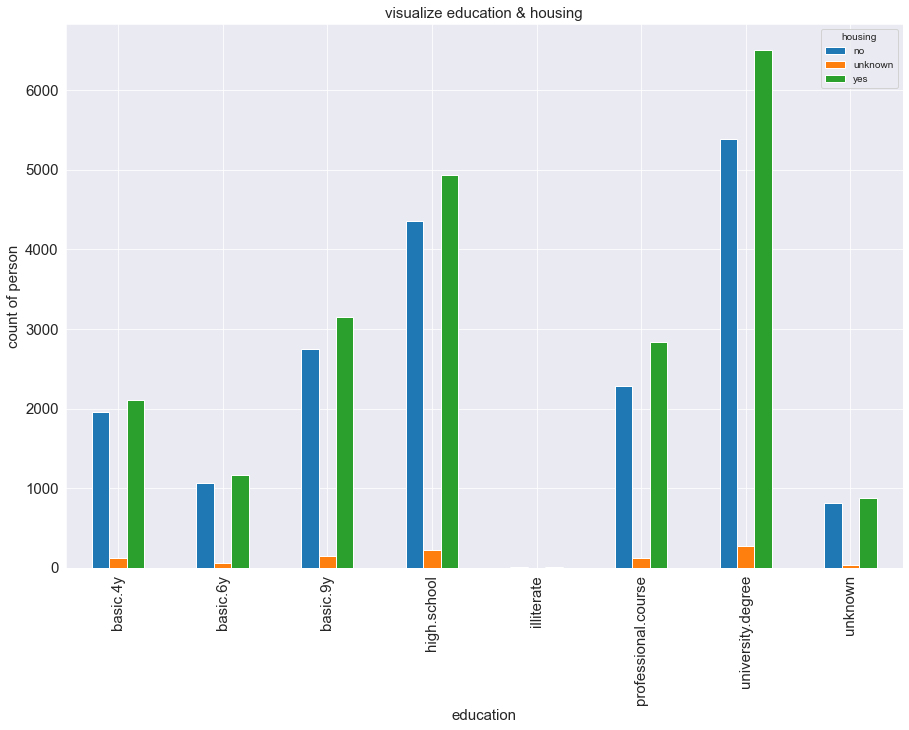

In [127]:
print('bibariate analysis of education and housing')
print('-------------------------------------------')
print(pd.crosstab(bank_df['education'],bank_df['housing']))
pd.crosstab(bank_df['education'],bank_df['housing']).plot(kind='bar',fontsize=15)
plt.title('visualize education & housing',fontsize=15)
plt.xlabel('education',fontsize=15)
plt.ylabel('count of person',fontsize=15)
plt.show()

bibariate analysis of education and loan
-------------------------------------------
loan                   no  unknown   yes
education                               
basic.4y             3435      117   624
basic.6y             1902       60   330
basic.9y             5011      151   883
high.school          7852      220  1443
illiterate             15        0     3
professional.course  4325      125   793
university.degree    9961      277  1930
unknown              1449       40   242


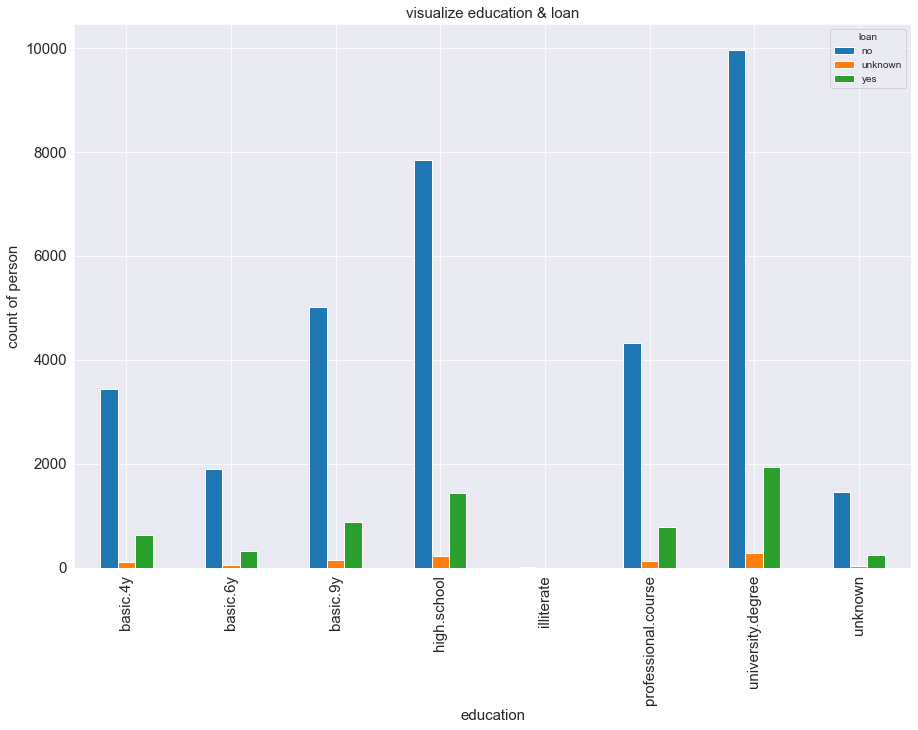

In [128]:
print('bibariate analysis of education and loan')
print('-------------------------------------------')
print(pd.crosstab(bank_df['education'],bank_df['loan']))
pd.crosstab(bank_df['education'],bank_df['loan']).plot(kind='bar',fontsize=15)
plt.title('visualize education & loan',fontsize=15)
plt.xlabel('education',fontsize=15)
plt.ylabel('count of person',fontsize=15)
plt.show()

bibariate analysis of education and contact
-------------------------------------------
contact              cellular  telephone
education                               
basic.4y                 2350       1826
basic.6y                 1247       1045
basic.9y                 3452       2593
high.school              5928       3587
illiterate                 15          3
professional.course      3478       1765
university.degree        8657       3511
unknown                  1017        714


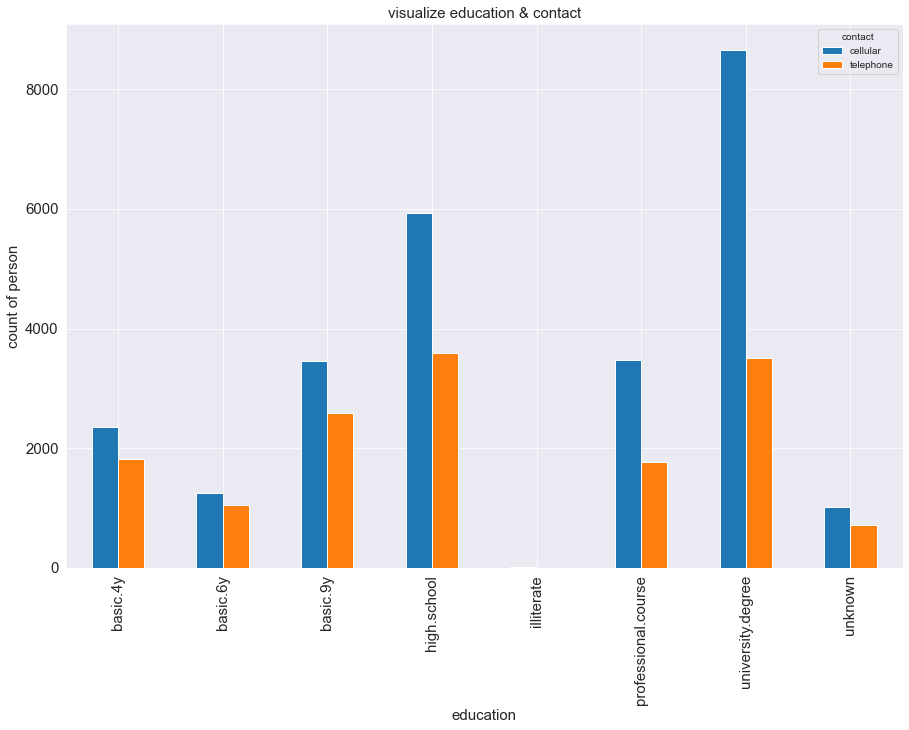

In [129]:
print('bibariate analysis of education and contact')
print('-------------------------------------------')
print(pd.crosstab(bank_df['education'],bank_df['contact']))
pd.crosstab(bank_df['education'],bank_df['contact']).plot(kind='bar',fontsize=15)
plt.title('visualize education & contact',fontsize=15)
plt.xlabel('education',fontsize=15)
plt.ylabel('count of person',fontsize=15)
plt.show()

<AxesSubplot:xlabel='default'>

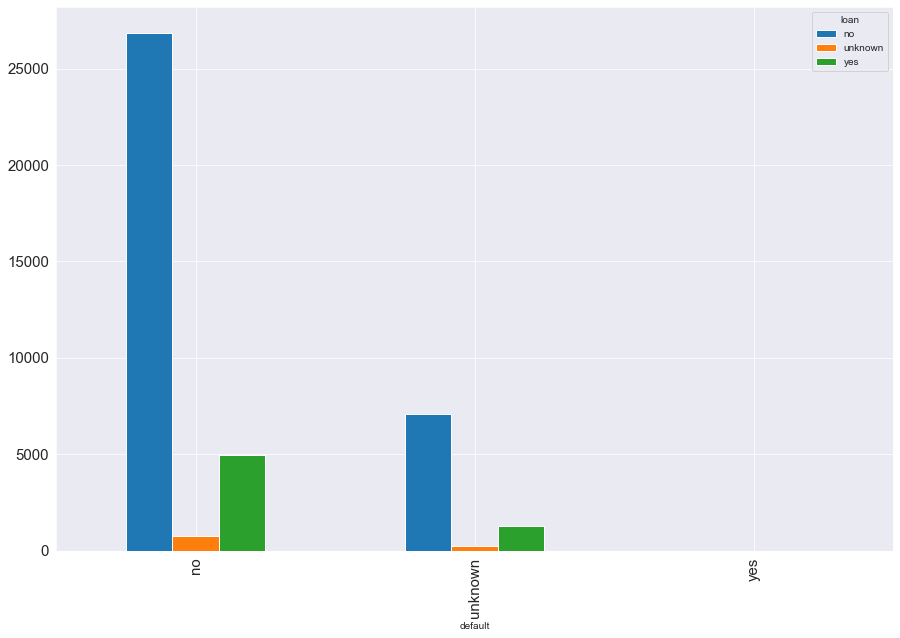

In [130]:
pd.crosstab(bank_df['default'],bank_df['loan']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='default'>

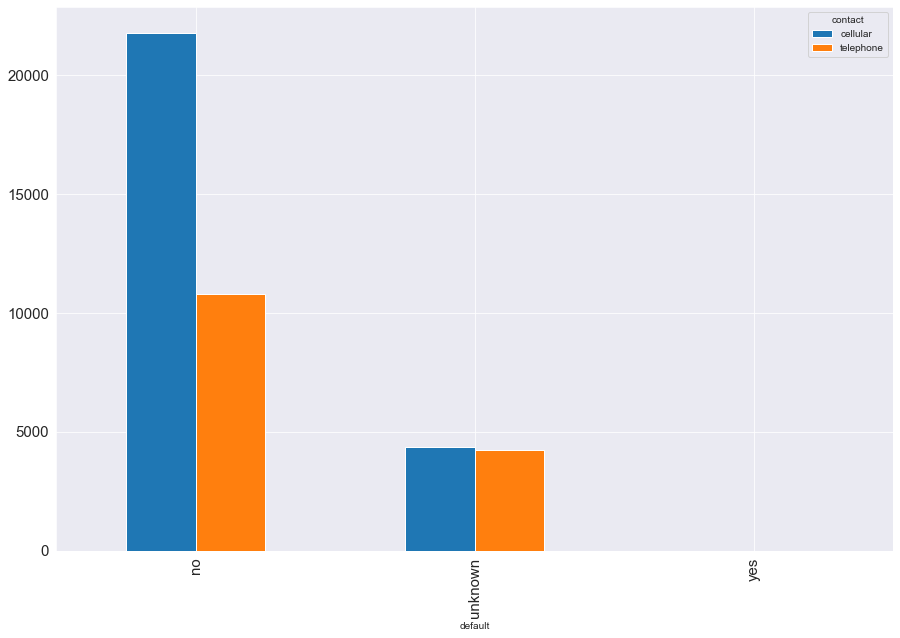

In [131]:
pd.crosstab(bank_df['default'],bank_df['contact']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='default'>

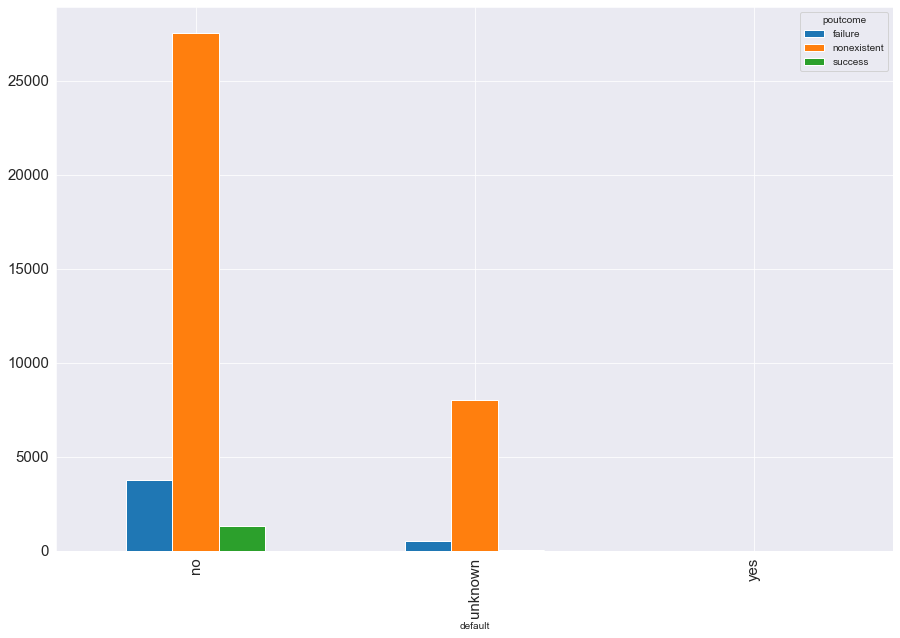

In [132]:
pd.crosstab(bank_df['default'],bank_df['poutcome']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='housing'>

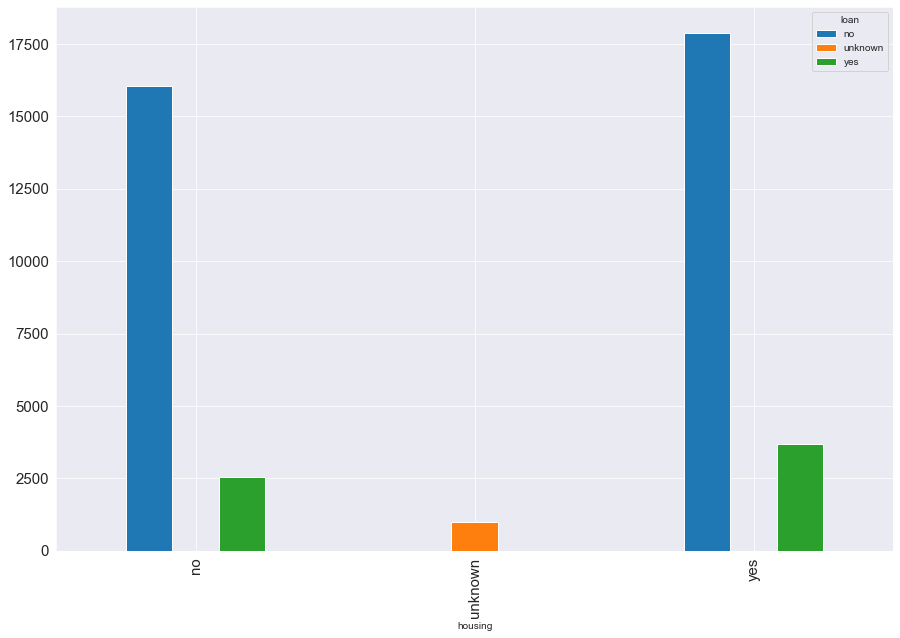

In [133]:
pd.crosstab(bank_df['housing'],bank_df['loan']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='housing'>

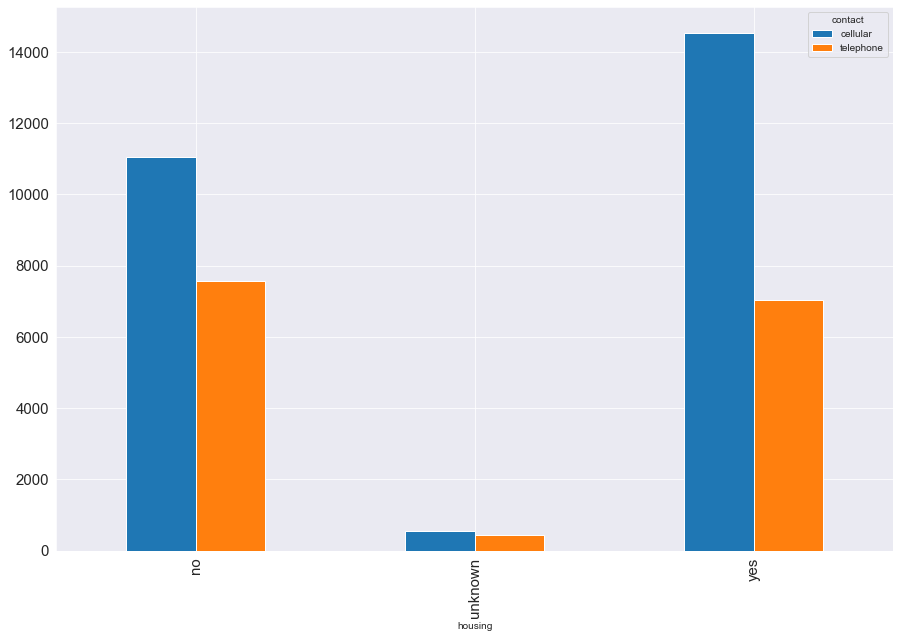

In [134]:
pd.crosstab(bank_df['housing'],bank_df['contact']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='month'>

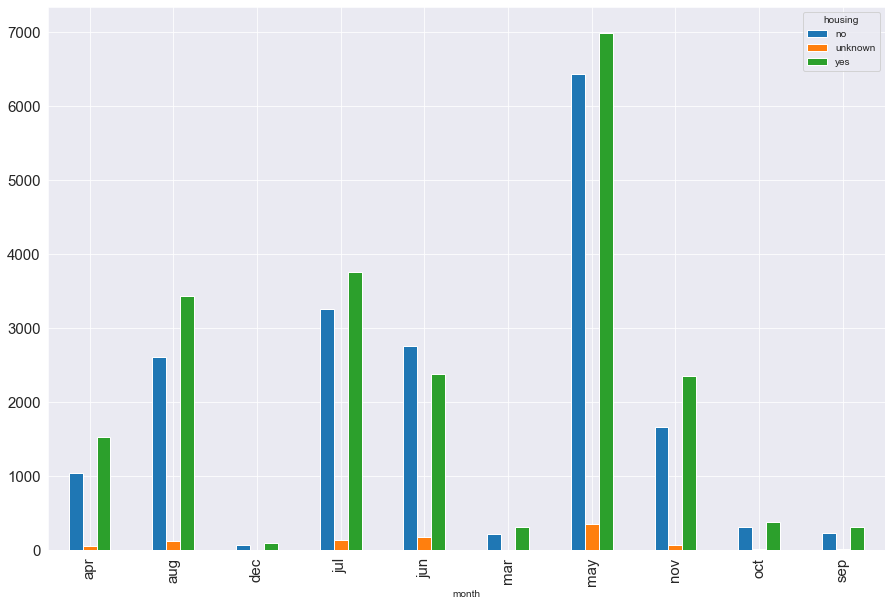

In [135]:
pd.crosstab(bank_df['month'],bank_df['housing']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='day_of_week'>

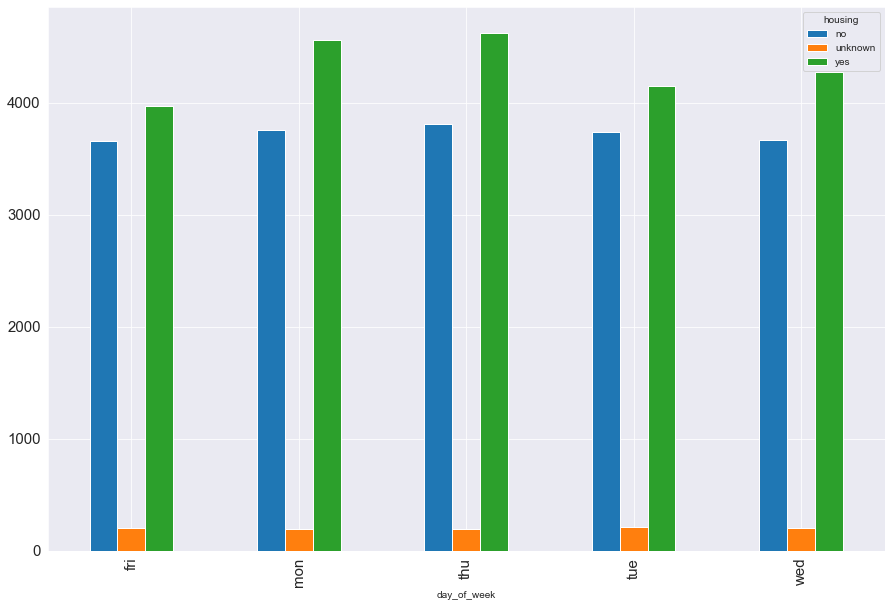

In [136]:
pd.crosstab(bank_df['day_of_week'],bank_df['housing']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='housing'>

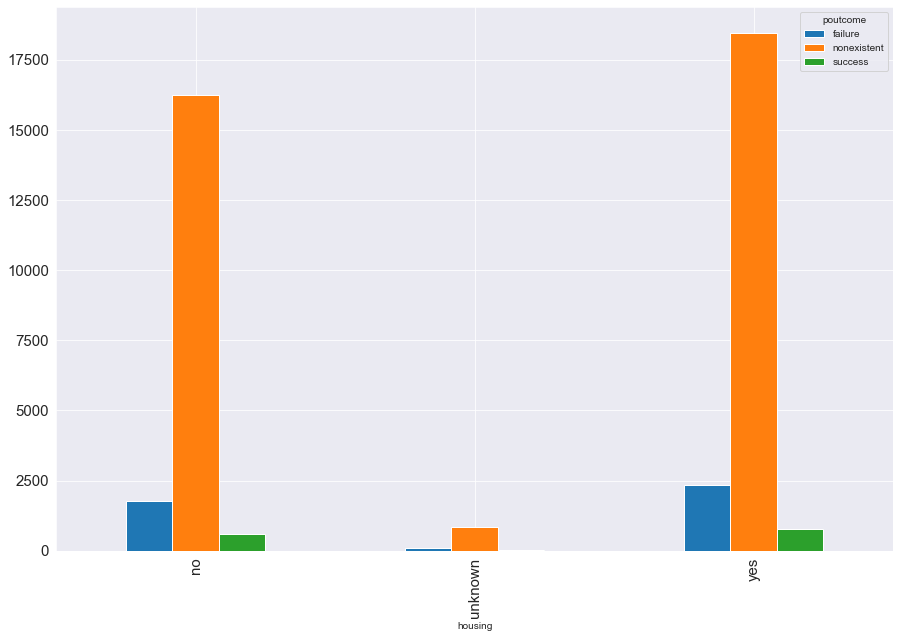

In [137]:
pd.crosstab(bank_df['housing'],bank_df['poutcome']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='loan'>

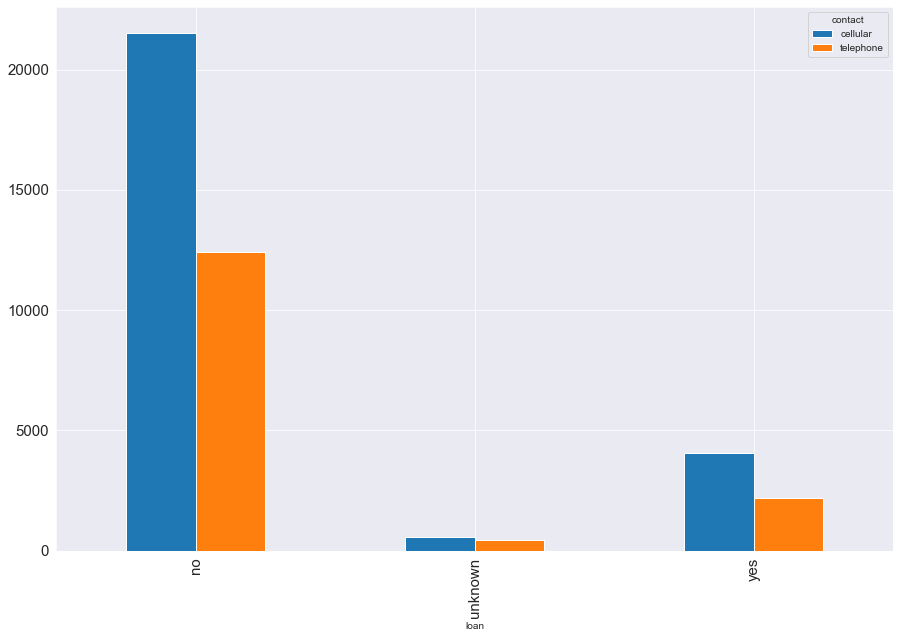

In [138]:
pd.crosstab(bank_df['loan'],bank_df['contact']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='month'>

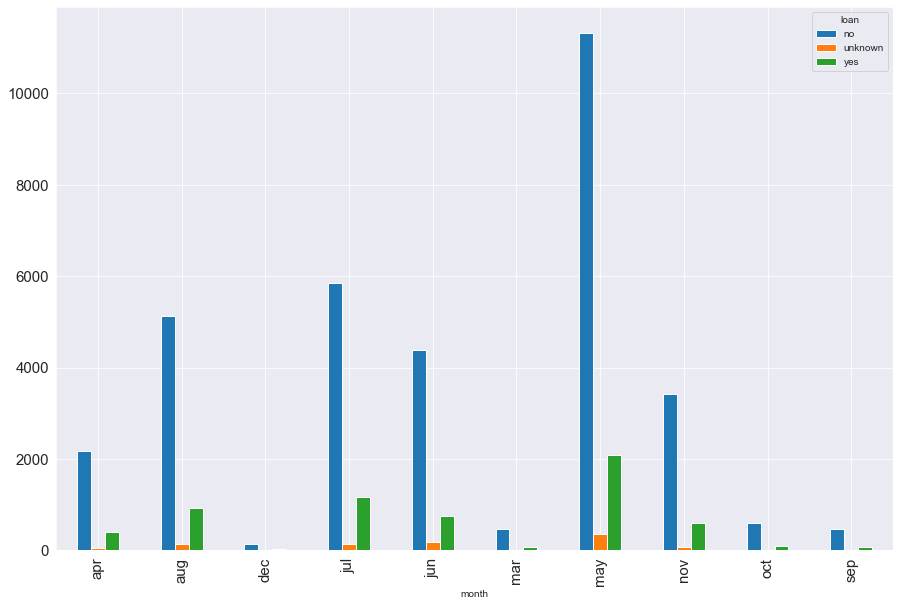

In [139]:
pd.crosstab(bank_df['month'],bank_df['loan']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='day_of_week'>

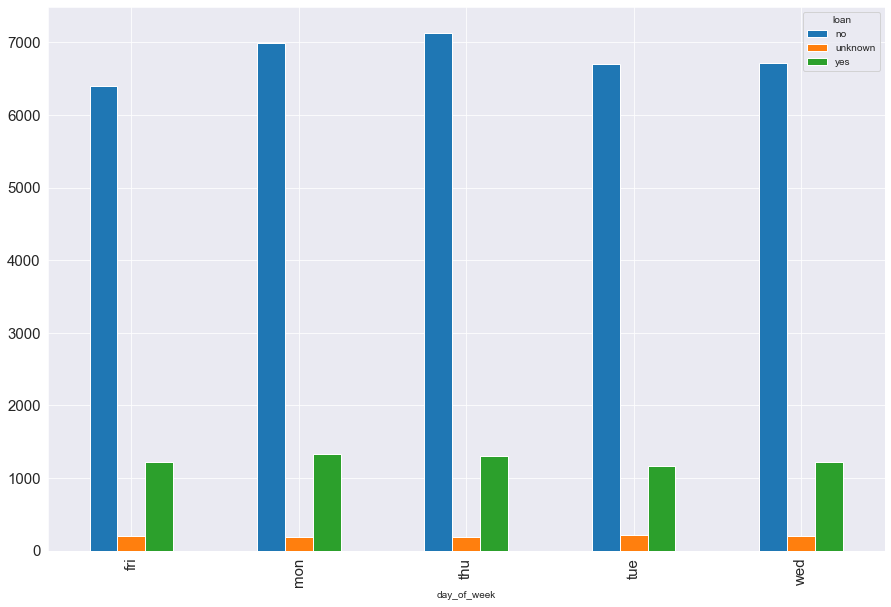

In [140]:
pd.crosstab(bank_df['day_of_week'],bank_df['loan']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='loan'>

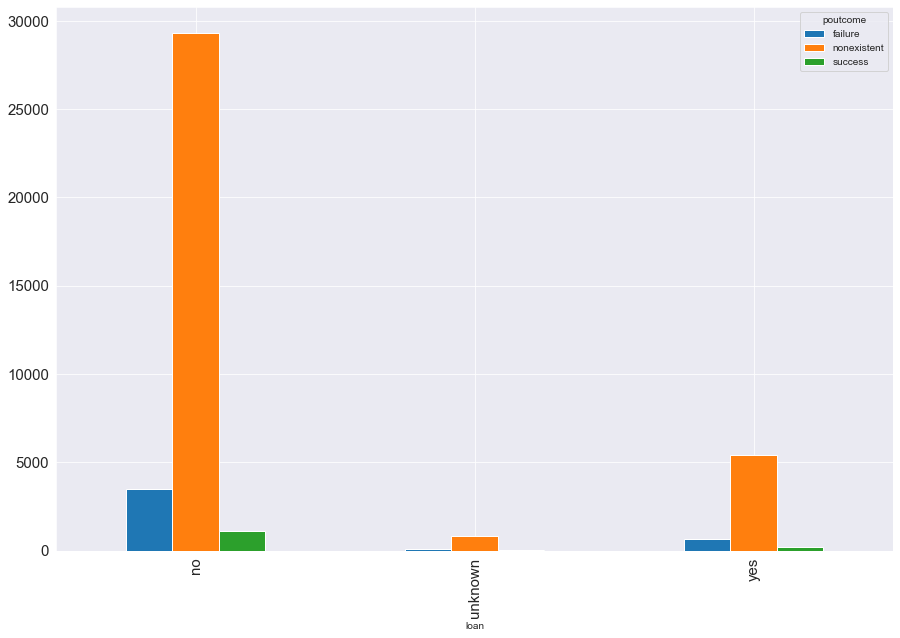

In [141]:
pd.crosstab(bank_df['loan'],bank_df['poutcome']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='month'>

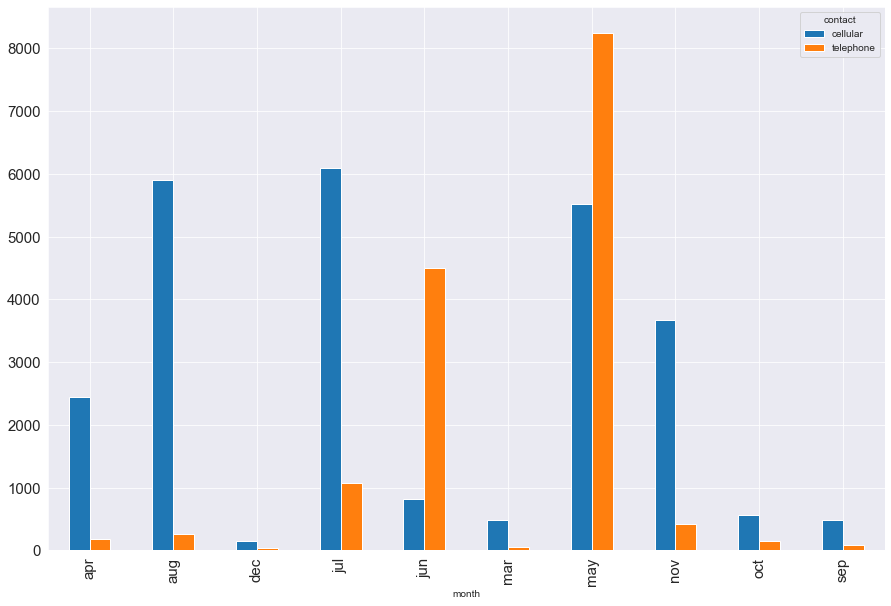

In [142]:
pd.crosstab(bank_df['month'],bank_df['contact']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='day_of_week'>

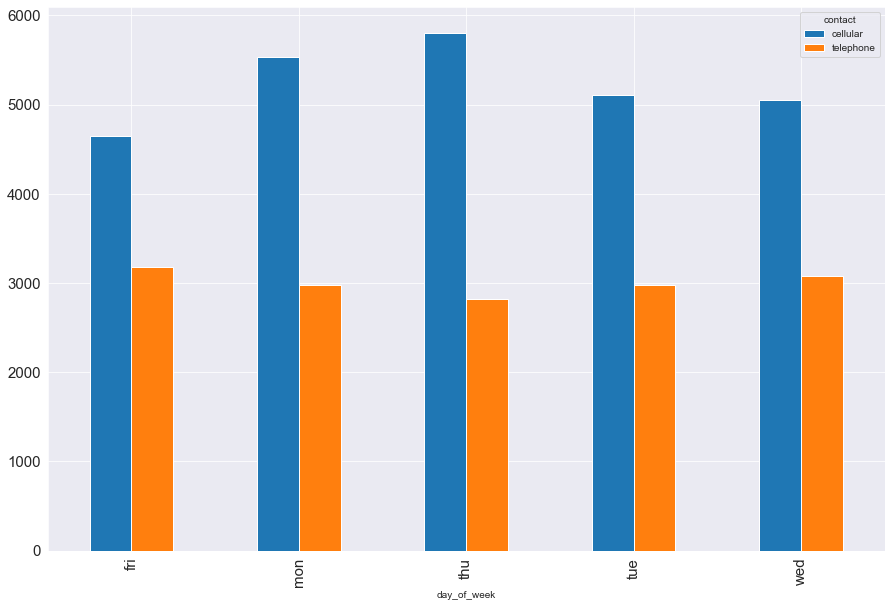

In [143]:
pd.crosstab(bank_df['day_of_week'],bank_df['contact']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='poutcome'>

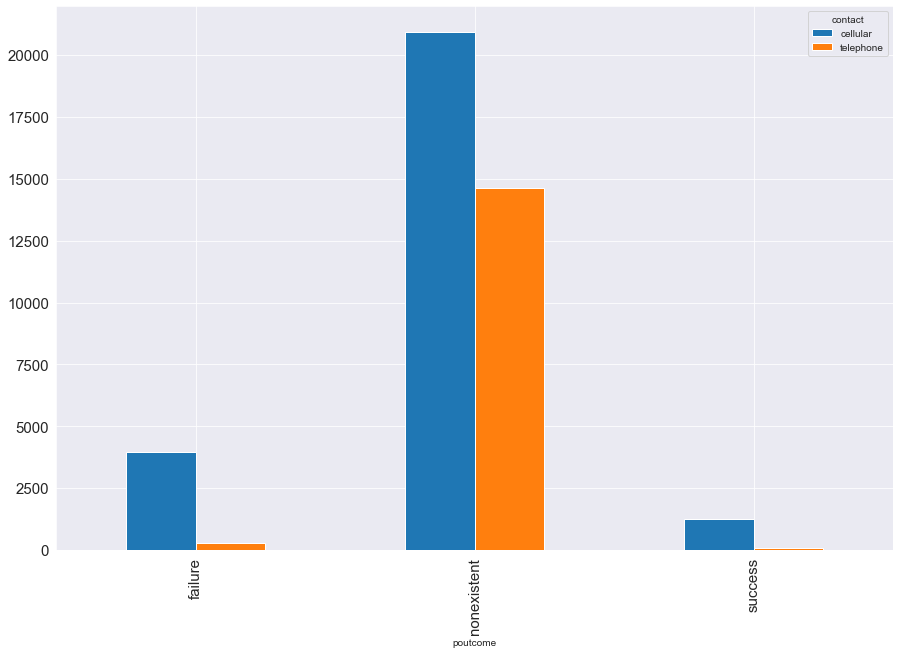

In [144]:
pd.crosstab(bank_df['poutcome'],bank_df['contact']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='month'>

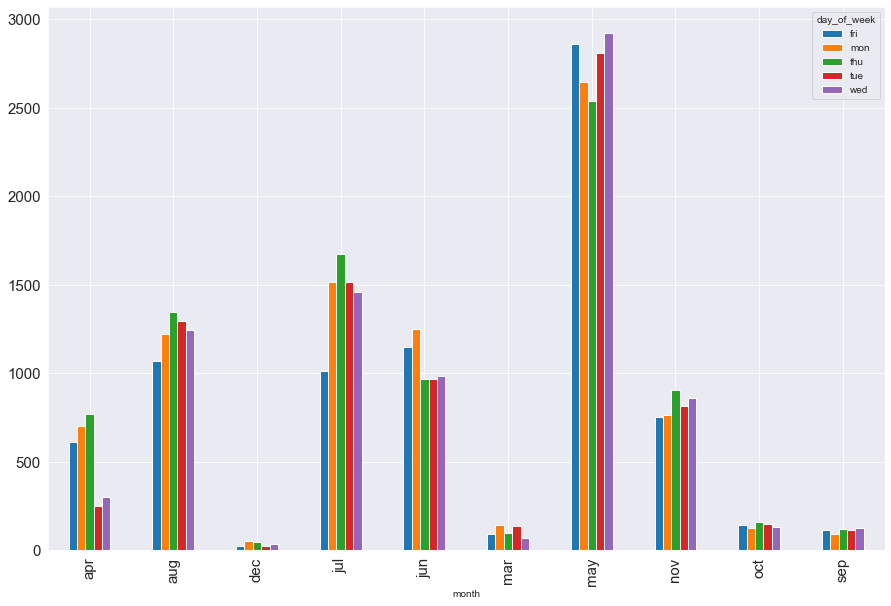

In [145]:
pd.crosstab(bank_df['month'],bank_df['day_of_week']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='month'>

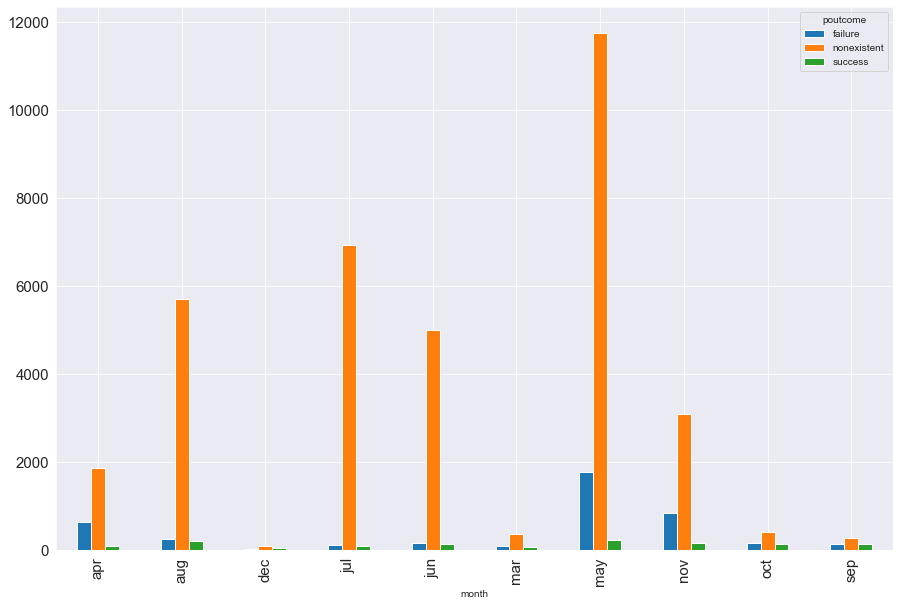

In [146]:
pd.crosstab(bank_df['month'],bank_df['poutcome']).plot(kind='bar',fontsize=15)

<AxesSubplot:xlabel='day_of_week'>

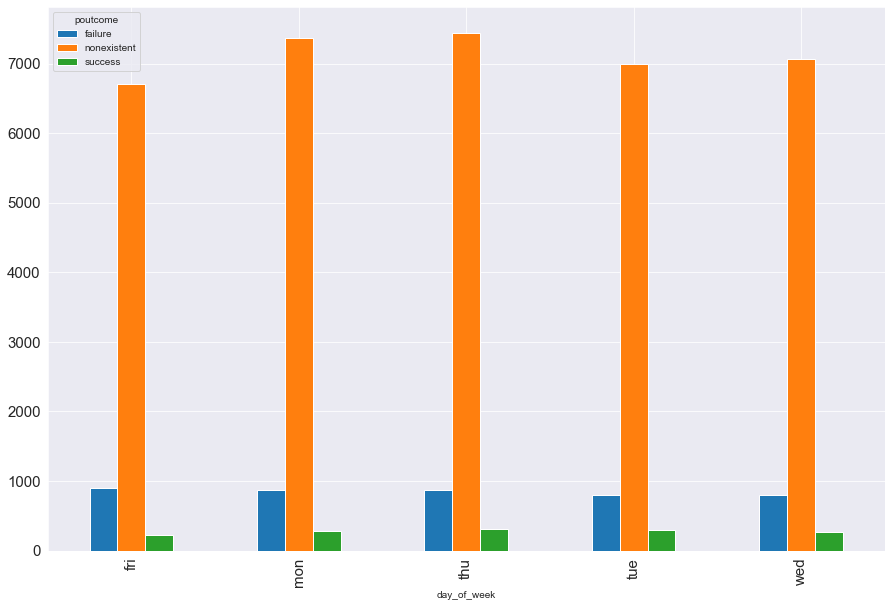

In [147]:
pd.crosstab(bank_df['day_of_week'],bank_df['poutcome']).plot(kind='bar',fontsize=15)

## Numerical- Target Analysis :

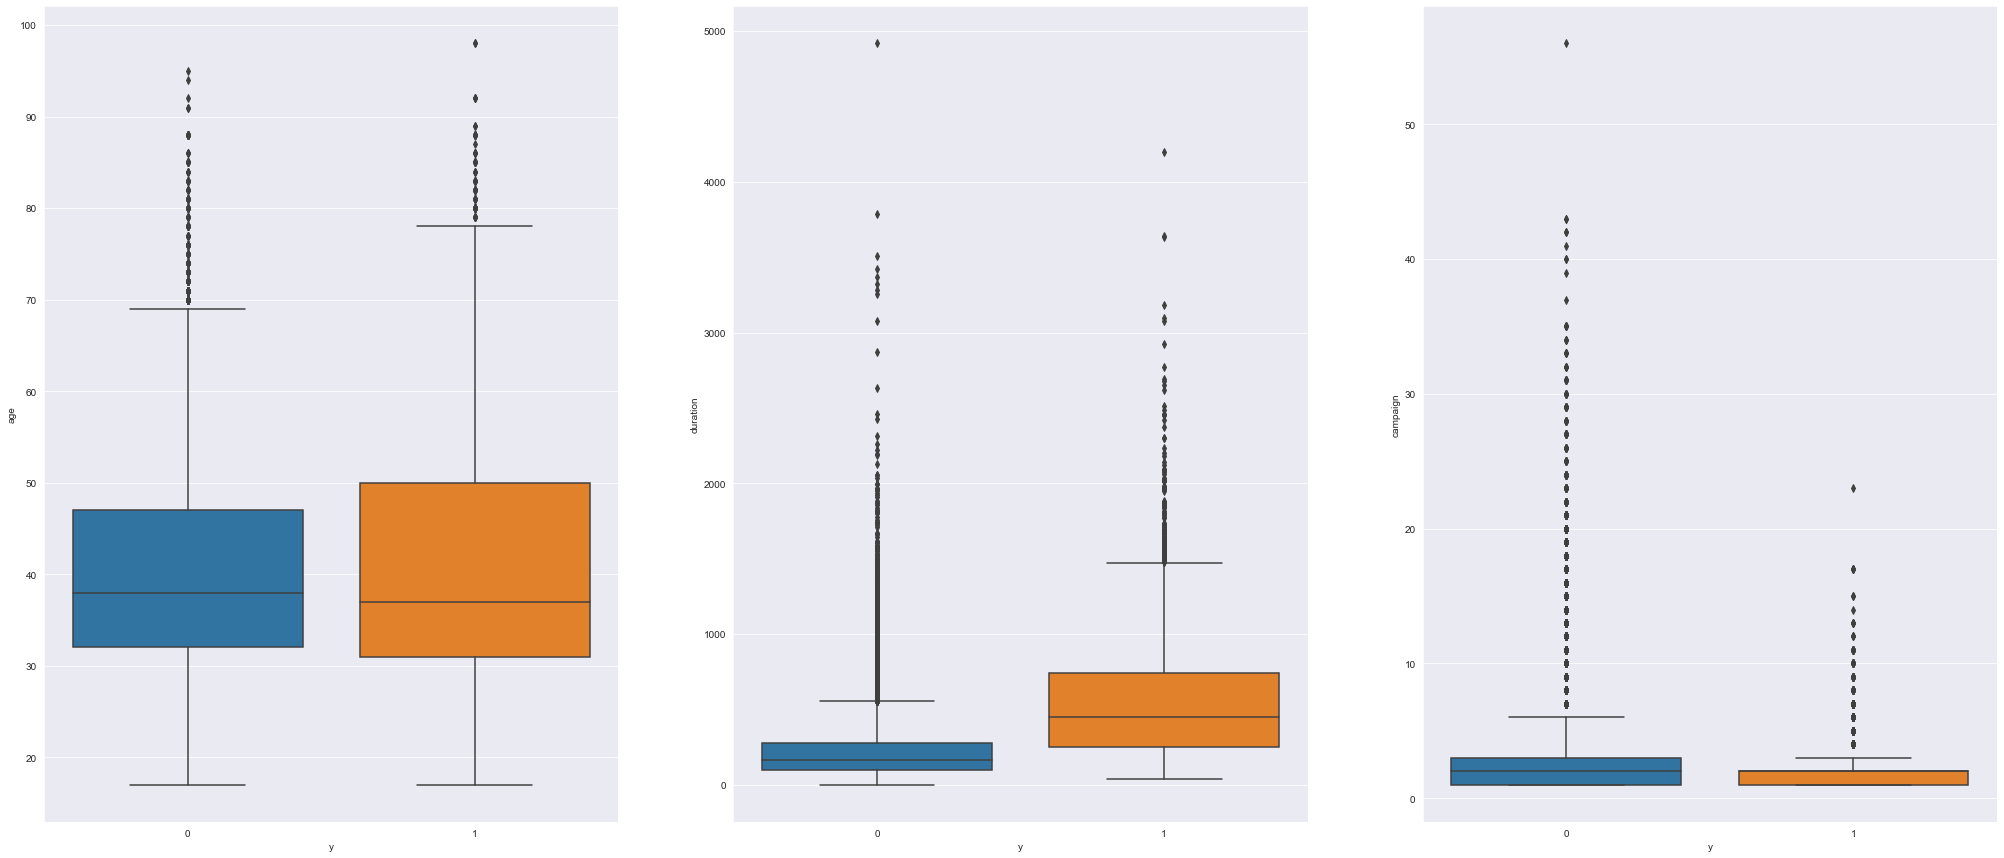

In [148]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.boxplot(x='y',y='age',data=bank_df)

plt.subplot(1,3,2)
sns.boxplot(x='y',y='duration',data=bank_df)

plt.subplot(1,3,3)
sns.boxplot(x='y',y='campaign',data=bank_df)

plt.show()

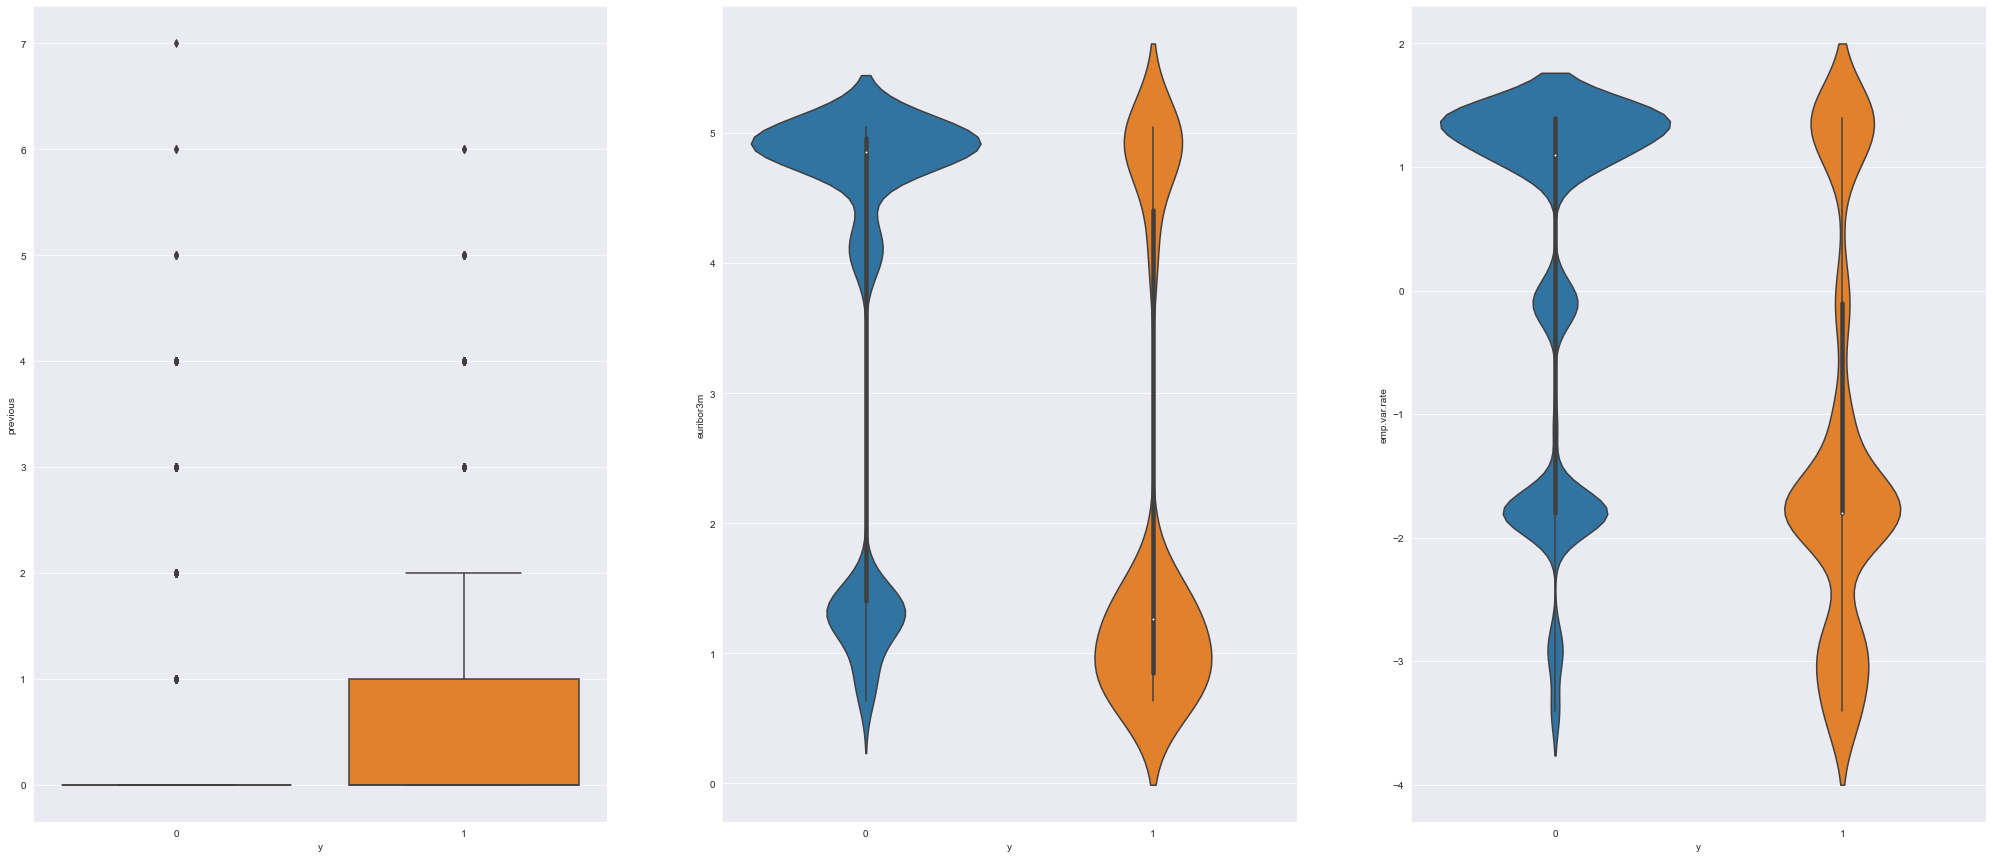

In [149]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.boxplot(x='y',y='previous',data=bank_df)
plt.subplot(1,3,2)
sns.violinplot(x='y',y='euribor3m',data=bank_df)
plt.subplot(1,3,3)
sns.violinplot(x='y',y='emp.var.rate',data=bank_df)
plt.show()

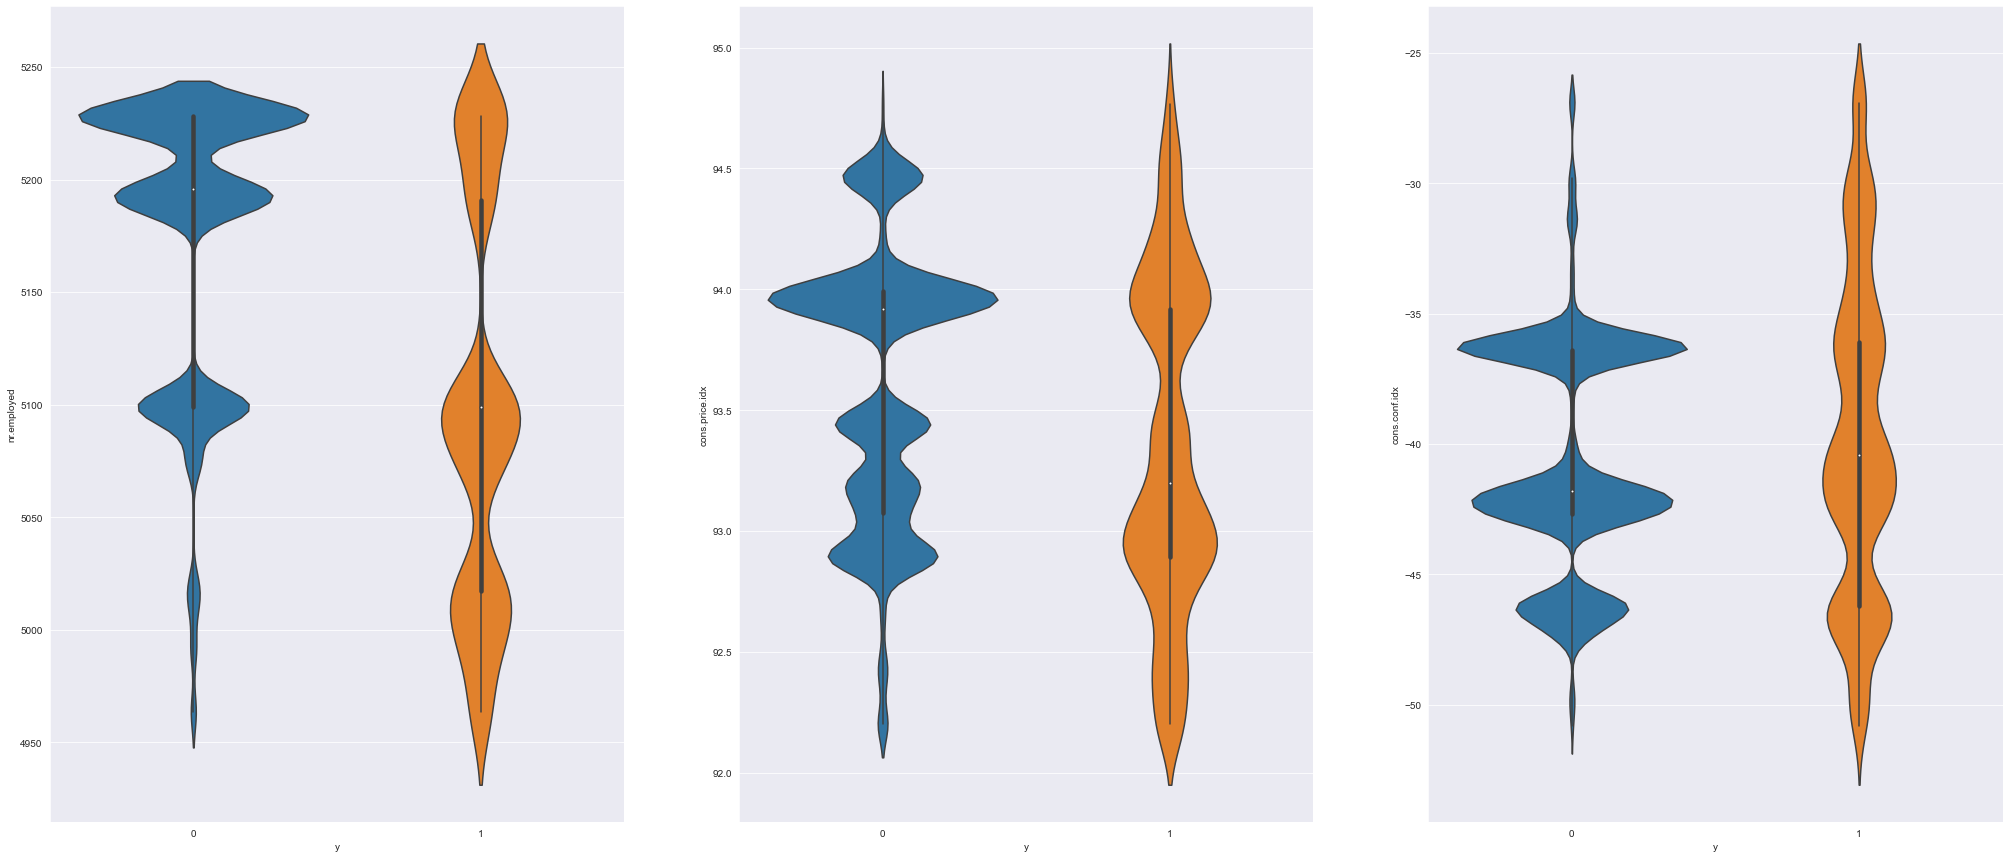

In [150]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='y',y='nr.employed',data=bank_df)
plt.subplot(1,3,2)
sns.violinplot(x='y',y='cons.price.idx',data=bank_df)

plt.subplot(1,3,3)
sns.violinplot(x='y',y='cons.conf.idx',data=bank_df)
plt.show()

## Multivariate Analysis :

<AxesSubplot:xlabel='job', ylabel='duration'>

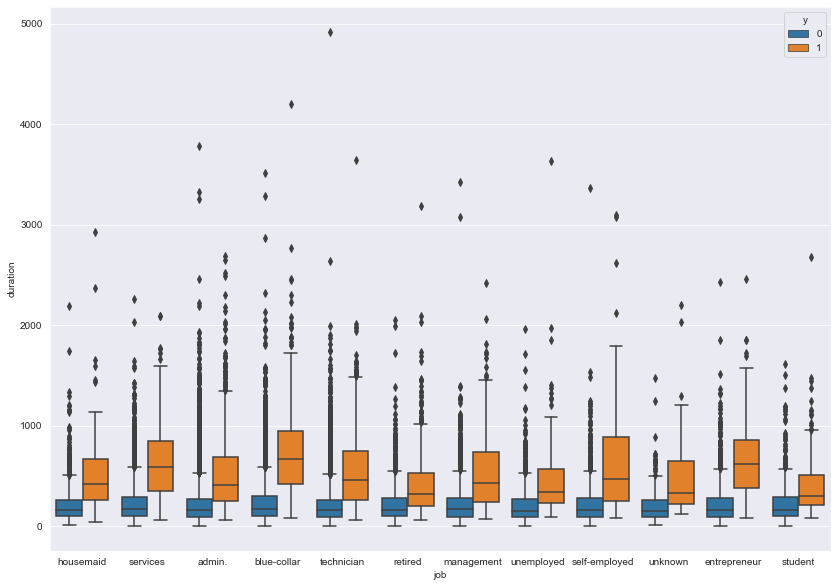

In [151]:
plt.figure(figsize=(14,10))
sns.boxplot(x='job',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='education', ylabel='duration'>

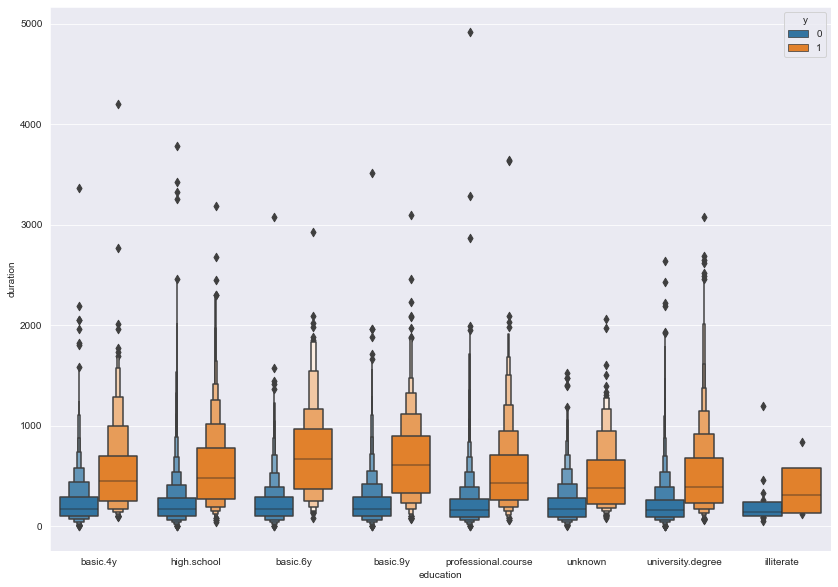

In [152]:
plt.figure(figsize=(14,10))
sns.boxenplot(x='education',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='emp.var.rate', ylabel='duration'>

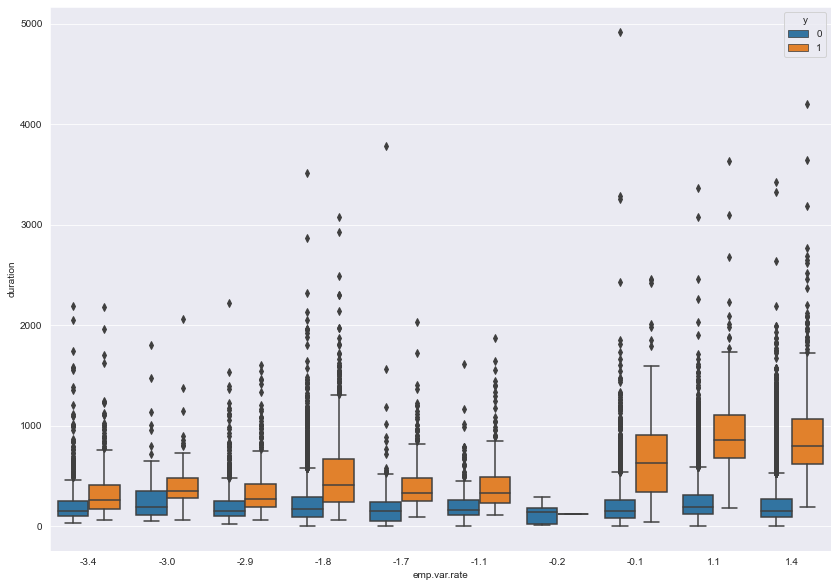

In [153]:
plt.figure(figsize=(14,10))
sns.boxplot(x='emp.var.rate',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='previous', ylabel='duration'>

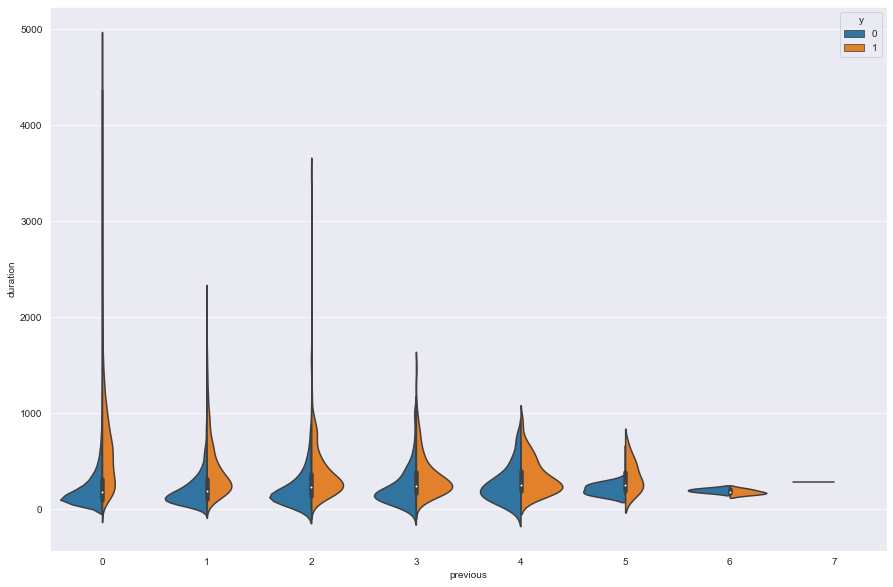

In [154]:
sns.violinplot(x='previous',y='duration',data=bank_df,hue='y',split=True)

<AxesSubplot:xlabel='job', ylabel='age'>

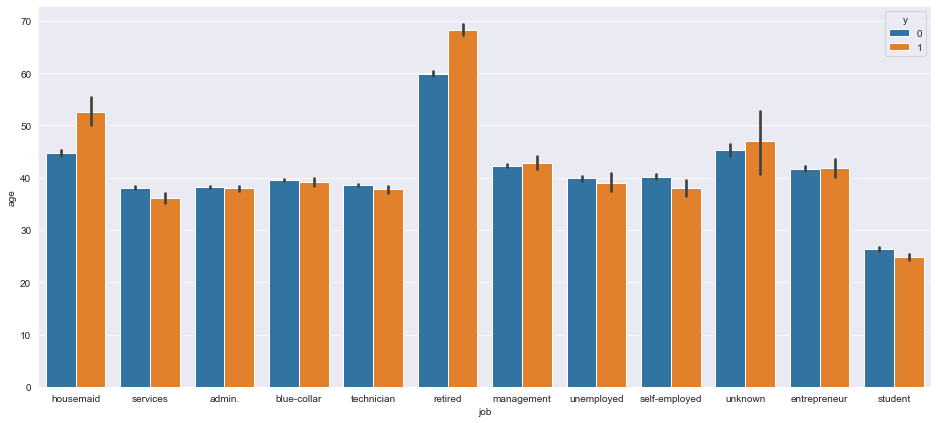

In [155]:
plt.figure(figsize=(16,7))
sns.barplot(x='job',y='age',data=bank_df,hue='y')

<AxesSubplot:xlabel='job', ylabel='campaign'>

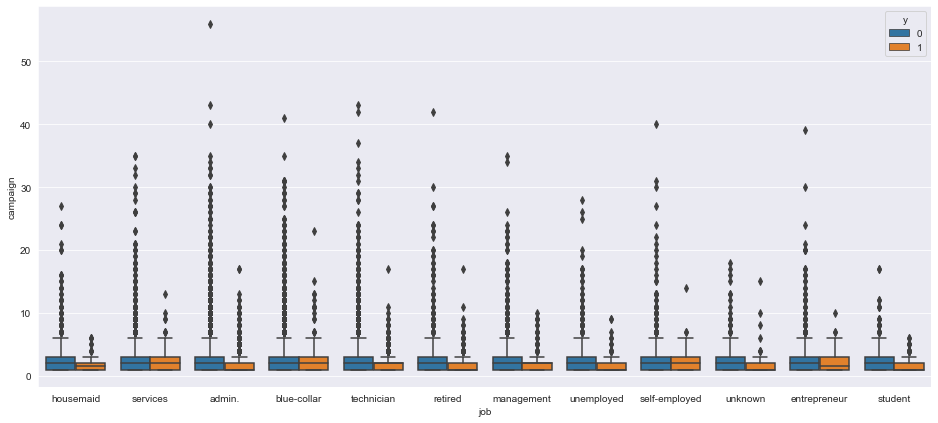

In [156]:
plt.figure(figsize=(16,7))
sns.boxplot(x='job',y='campaign',data=bank_df,hue='y')

<AxesSubplot:xlabel='marital', ylabel='duration'>

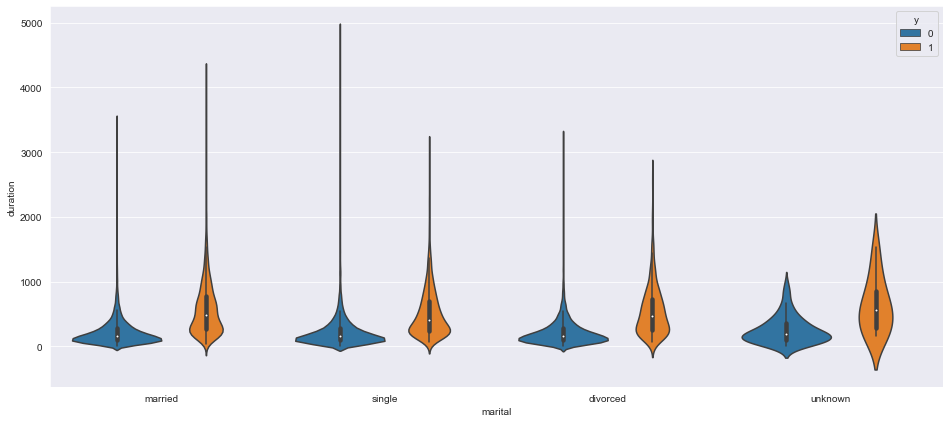

In [157]:
plt.figure(figsize=(16,7))
sns.violinplot(x='marital',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='campaign', ylabel='duration'>

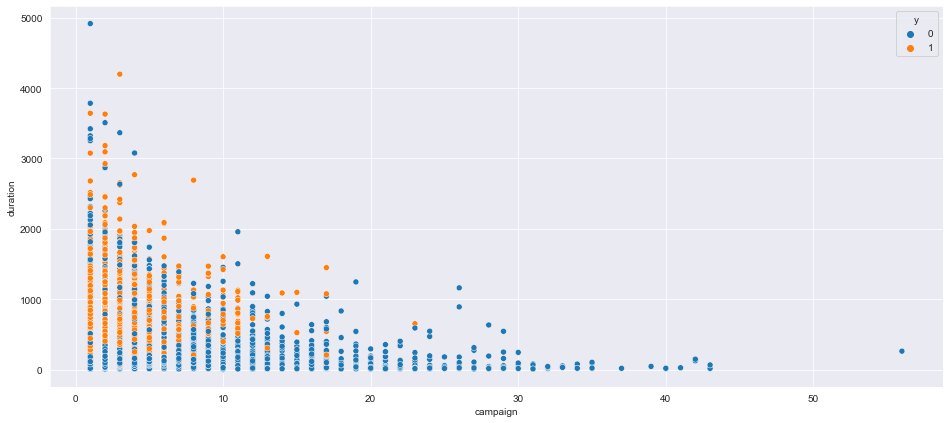

In [158]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='campaign',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='previous', ylabel='duration'>

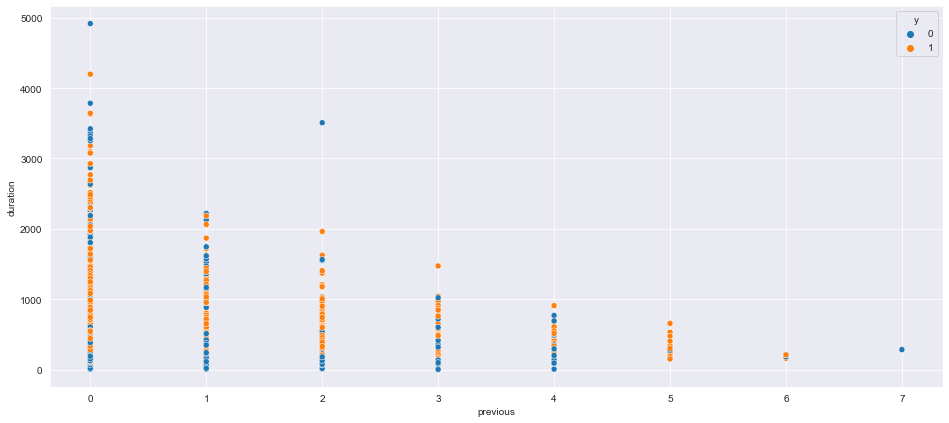

In [159]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='previous',y='duration',data=bank_df,hue='y')

<AxesSubplot:xlabel='marital', ylabel='campaign'>

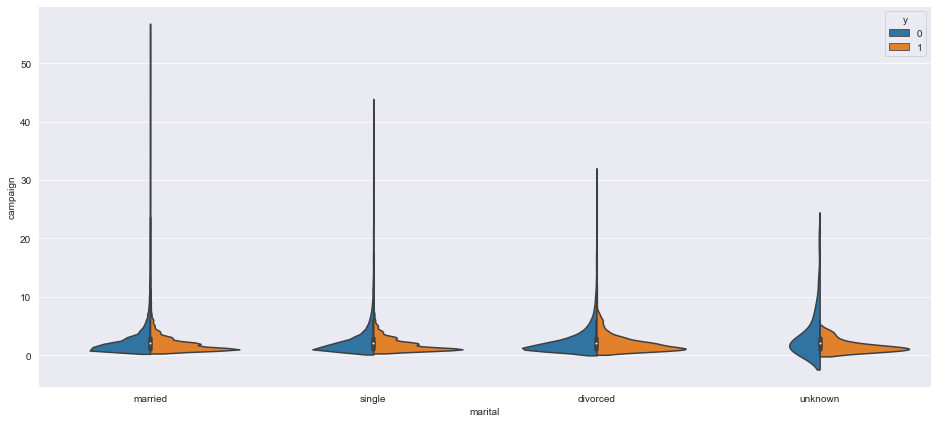

In [160]:
plt.figure(figsize=(16,7))
sns.violinplot(x='marital',y='campaign',data=bank_df,hue='y',split=True)

<AxesSubplot:xlabel='marital', ylabel='campaign'>

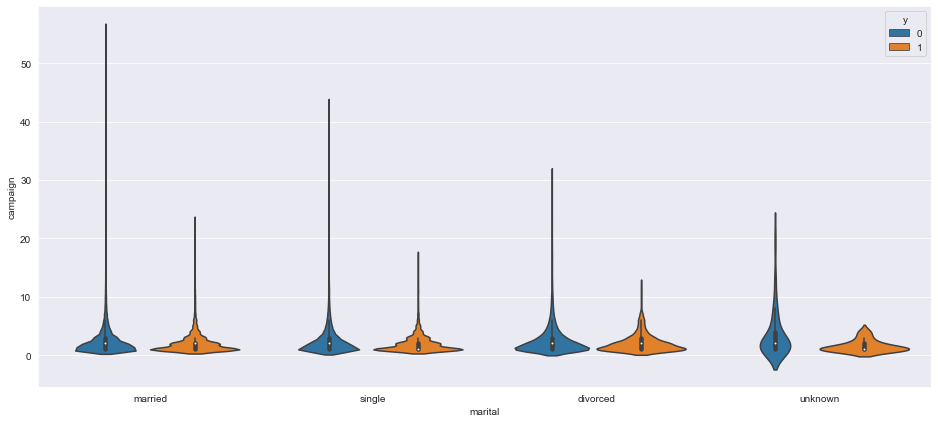

In [161]:
plt.figure(figsize=(16,7))
sns.violinplot(x='marital',y='campaign',data=bank_df,hue='y')

## Outliers Detection And Treatment :

Checking the outliers by its skweness

In [162]:
df_numerical.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

### Graphical Representation of Outliers

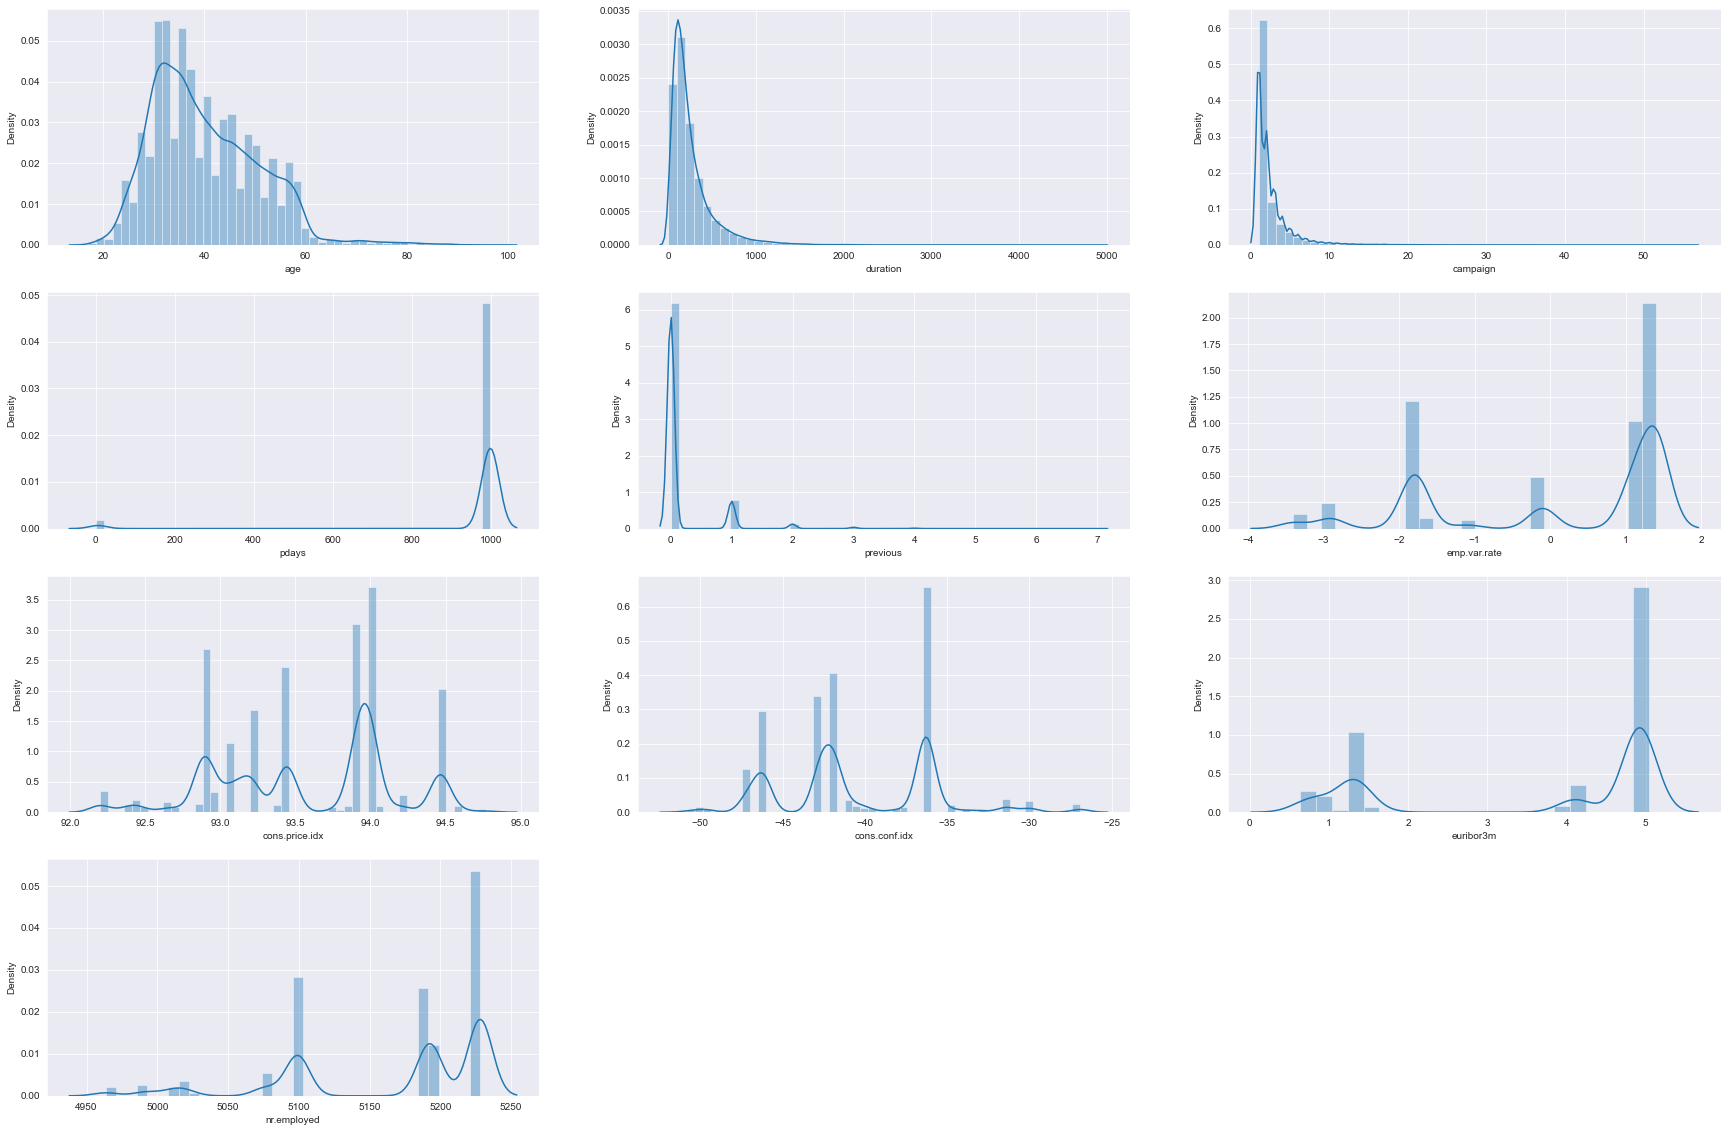

In [163]:
plt.figure(figsize=(30,20))
s=1
for p in numerical_columns:
    plt.subplot(4,3,s)
    sns.distplot(df_numerical[p])
    s+=1

* ``duration``,``campaign`` and ``previous`` has high postive skewness.
* ``nr.employed`` and ``pdays`` has high negative skewness.